In [227]:
import findspark
findspark.init()
import pyspark as spark
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
sc = spark.SparkContext()
sql = spark.SQLContext(sc)

In [184]:
level = 1
label='primary_site'
L = 4
labels = ['primary_site', 'disease_type', 'disease_tissue']
#labels = ['primary_site', 'secondary_site']
algorithm = 'topsbm'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/hsbm/oversigma_10tissue"
#directory = "/Users/filippo/Google Drive File Stream/My Drive/tesi_magistrale/tesi/results/hSBM/highlyvariable_7tissues"
os.chdir(directory)

In [193]:
df_Pwt = sql.read.option('header',True).csv("%s/%s_level_%d_word-dist.csv"%(algorithm,algorithm,L))

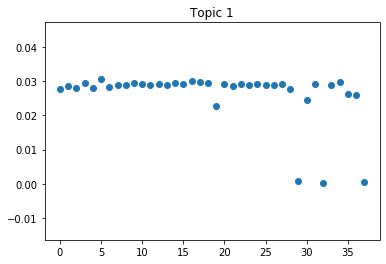

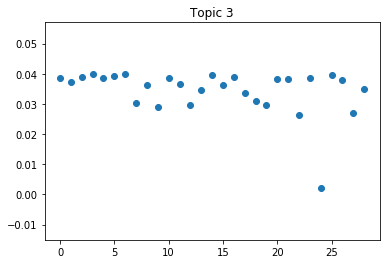

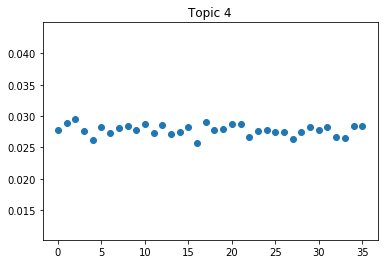

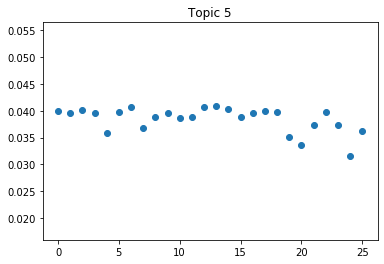

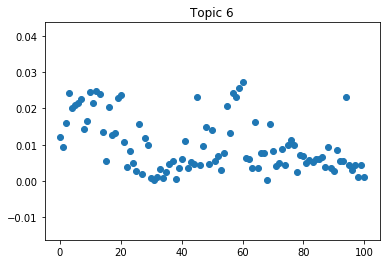

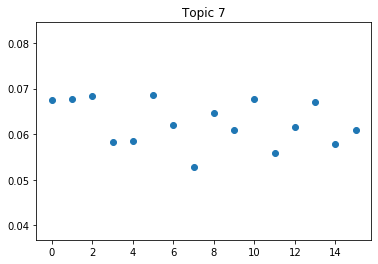

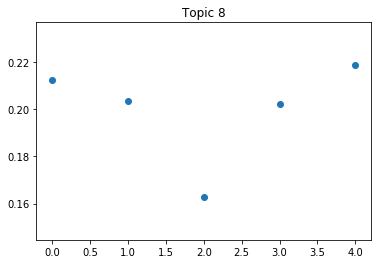

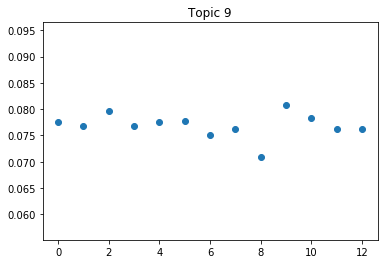

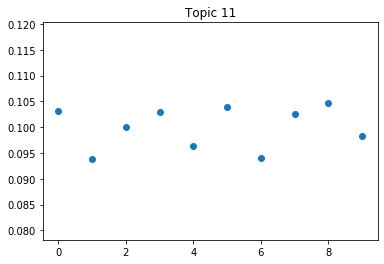

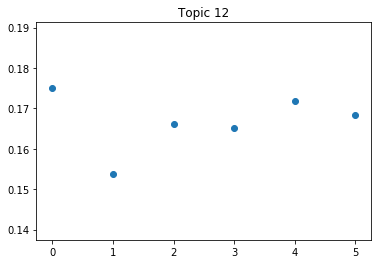

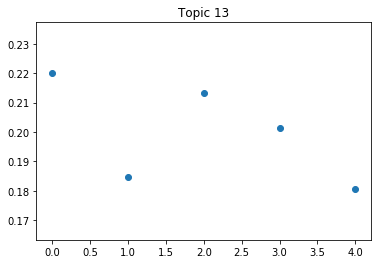

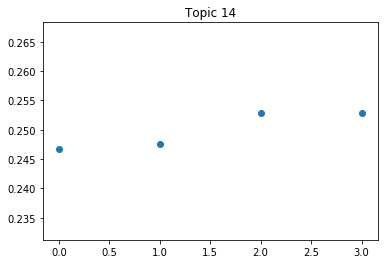

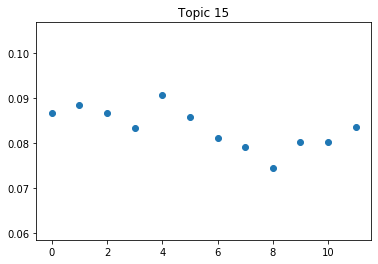

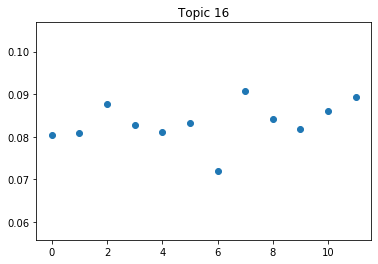

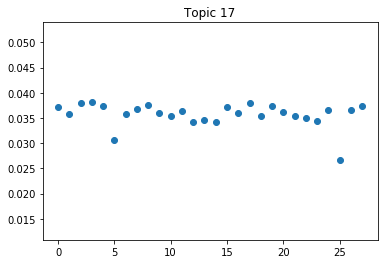

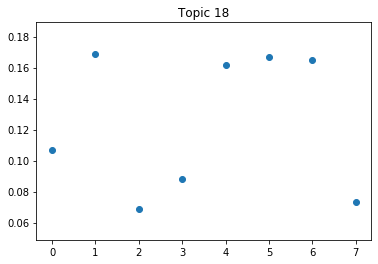

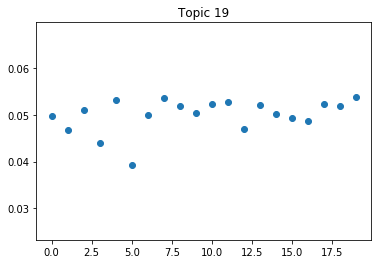

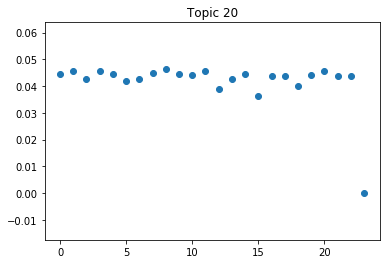

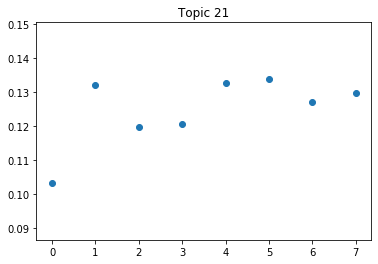

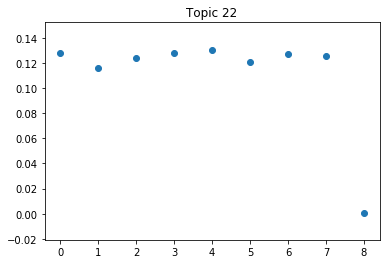

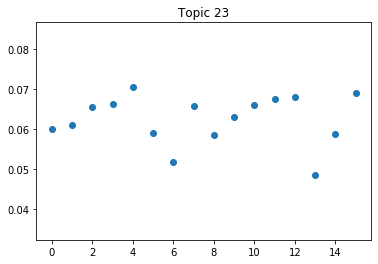

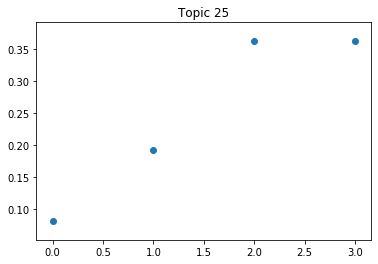

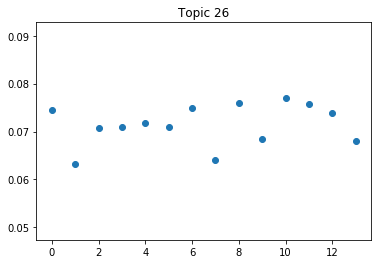

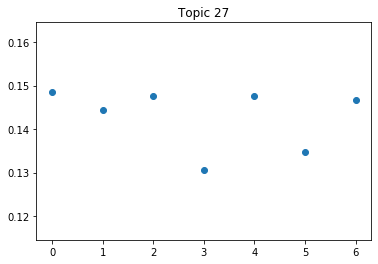

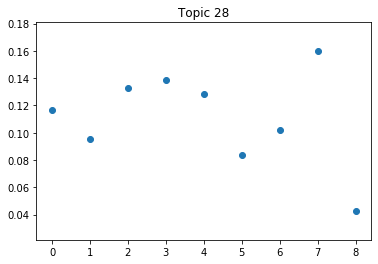

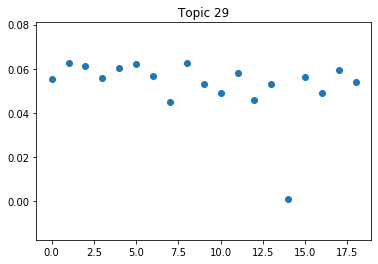

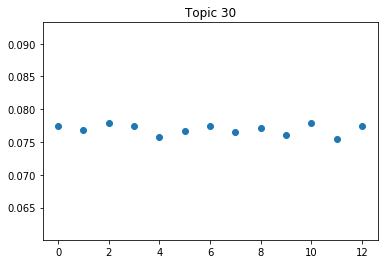

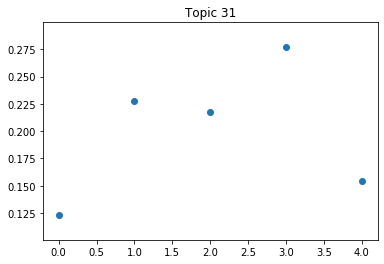

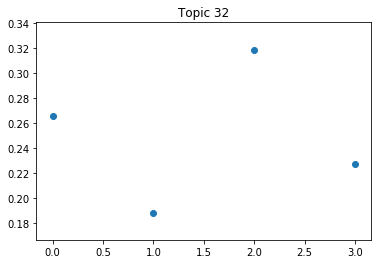

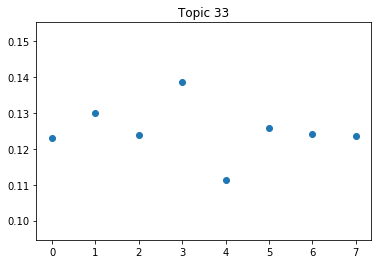

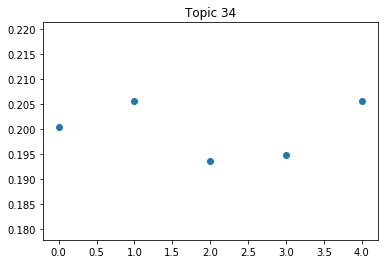

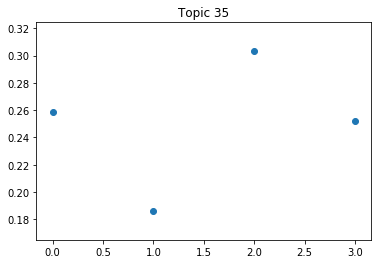

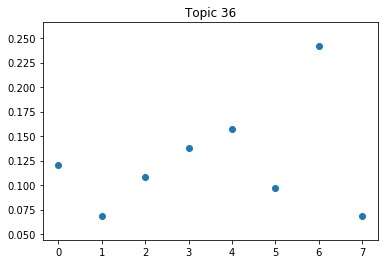

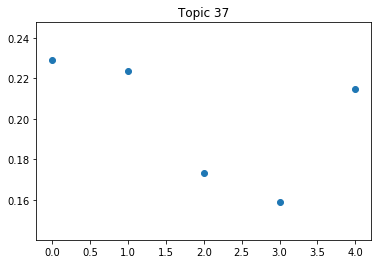

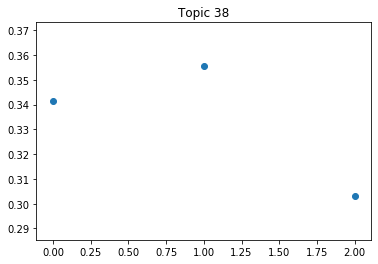

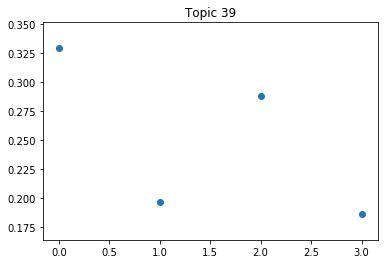

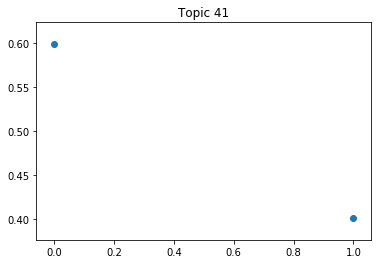

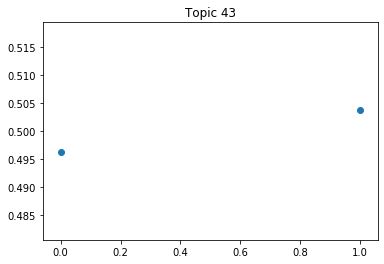

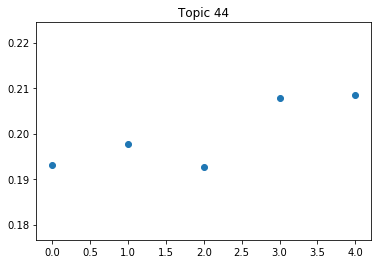

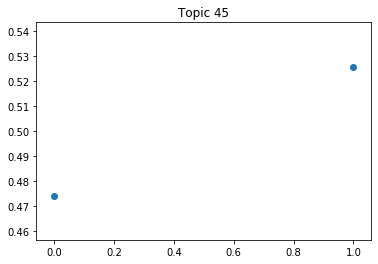

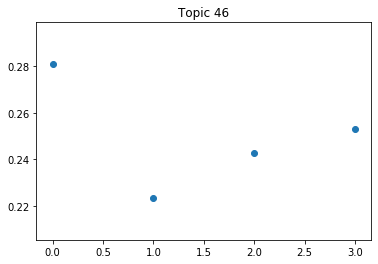

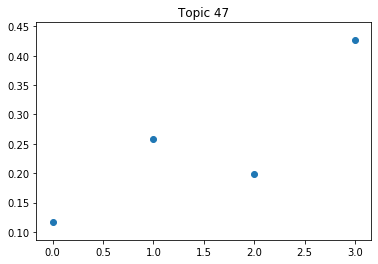

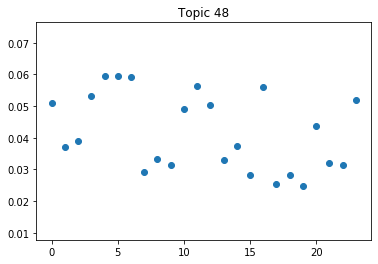

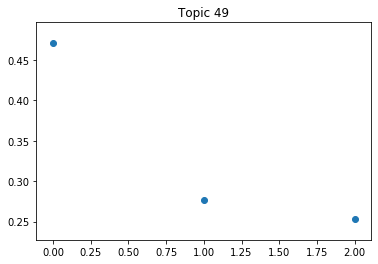

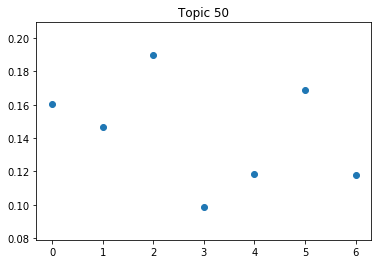

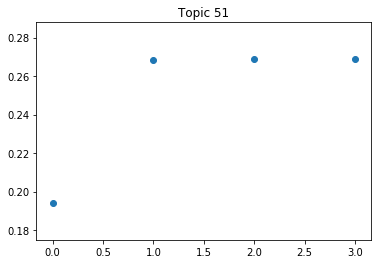

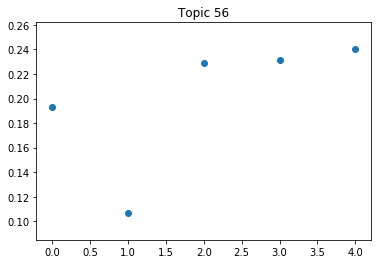

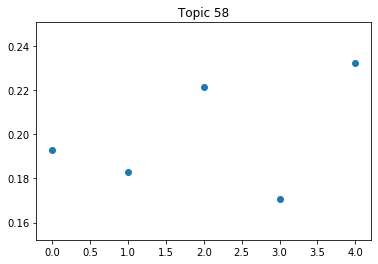

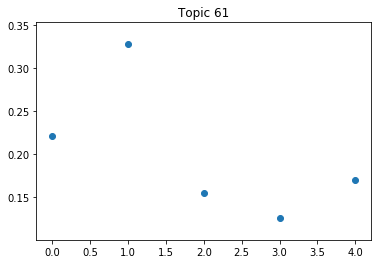

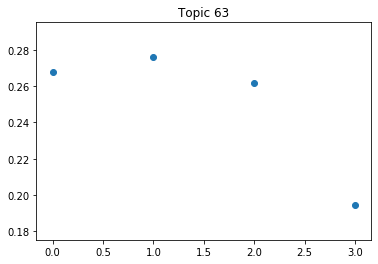

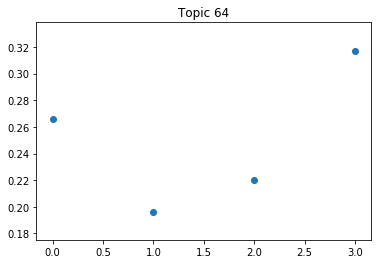

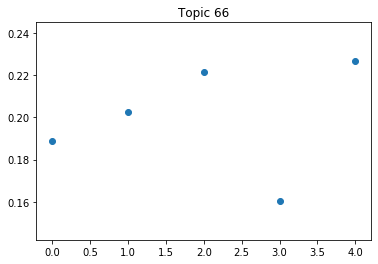

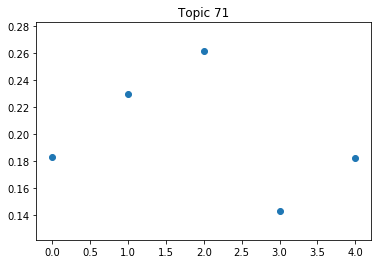

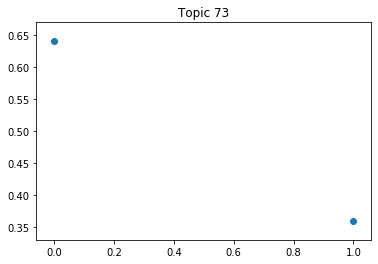

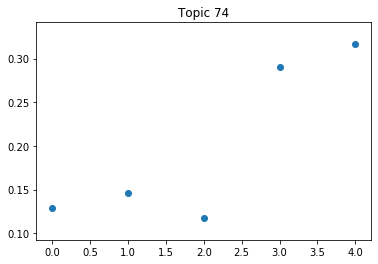

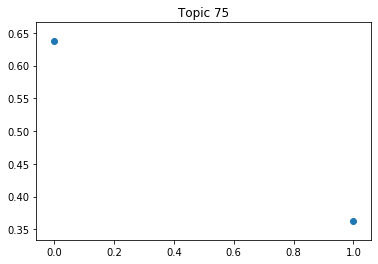

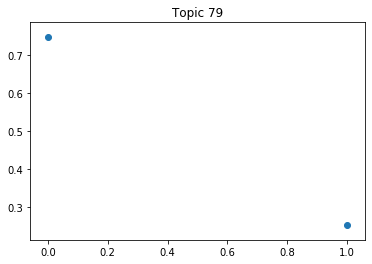

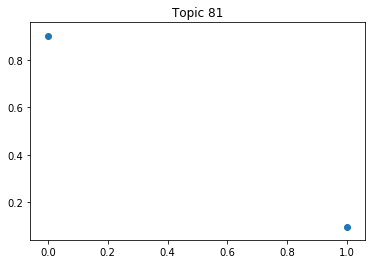

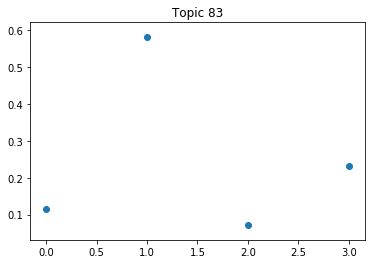

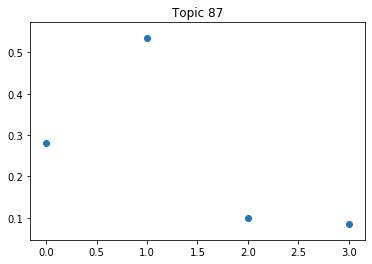

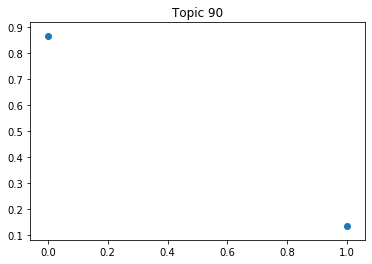

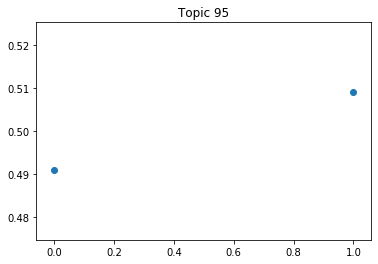

In [181]:
for topic in df.columns[1:]:
    dist = df.select([topic]).filter(F.col(topic)>1e-95).toPandas().astype(float).values
    if len(dist)<2:
        continue
    plt.title(topic)
    plt.scatter(np.arange(len(dist)),dist)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

In [200]:
df_Ptd = sql.read.option('header',True).csv("%s/%s_level_%d_topic-dist.csv"%(algorithm,algorithm,L)).drop('i_doc')

array([['GTEX-1117F-1326-SM-5EGHH'],
       ['GTEX-1117F-2826-SM-5GZXL'],
       ['GTEX-111CU-1026-SM-5EGIL'],
       ...,
       ['GTEX-ZZ64-0626-SM-5GZWR'],
       ['GTEX-ZZPT-0226-SM-5E43X'],
       ['GTEX-ZZPU-0726-SM-5N9C8']], dtype=object)

In [242]:
len(df_Pwt.select(['_c0']).toPandas().values.T[0])

695

In [195]:
import tensorflow as tf

In [216]:
Pgt = tf.convert_to_tensor(df_Pwt.toPandas().set_index('_c0').astype(float).values)
Pts = tf.transpose(tf.convert_to_tensor(df_Ptd.toPandas().set_index('doc').astype(float).values))

In [217]:
Pgt

<tf.Tensor 'Const_6:0' shape=(695, 48) dtype=float64>

In [218]:
Pts

<tf.Tensor 'transpose_2:0' shape=(48, 1183) dtype=float64>

In [225]:
with tf.Session() as sess:
    Pgs = sess.run(tf.matmul(Pgt,Pts))
Pgs.shape

(695, 1183)

In [255]:
df_Pgs = pd.DataFrame(data=Pgs, index=df_Pwt.select(['_c0']).toPandas().values.T[0], columns=df_Ptd.select(['doc']).toPandas().values.T[0])

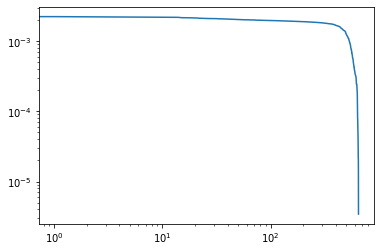

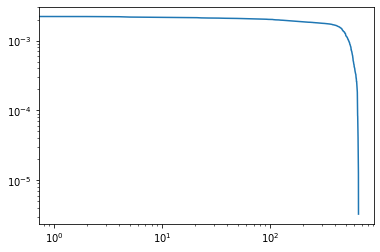

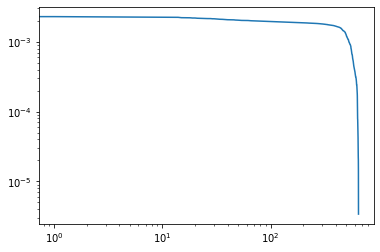

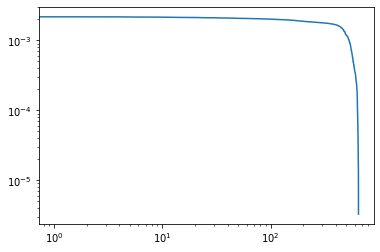

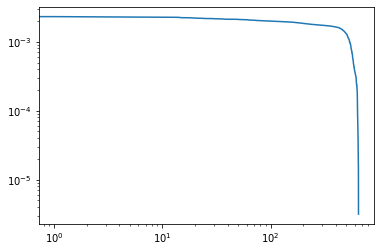

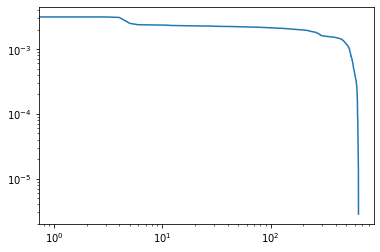

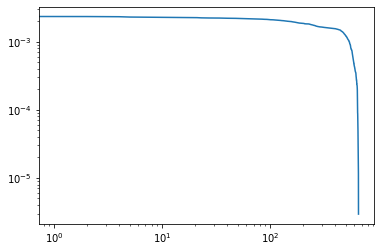

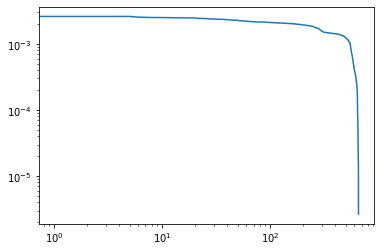

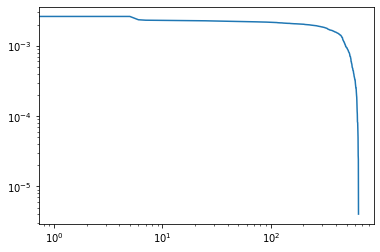

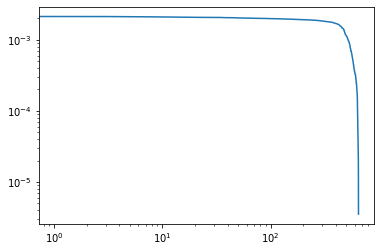

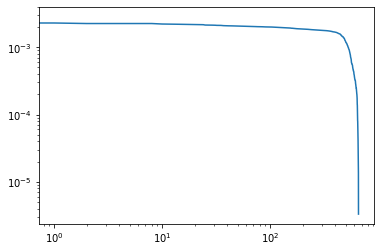

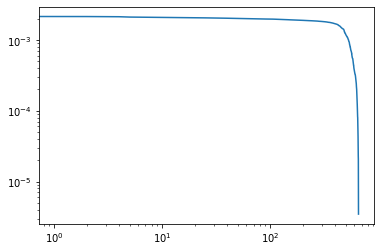

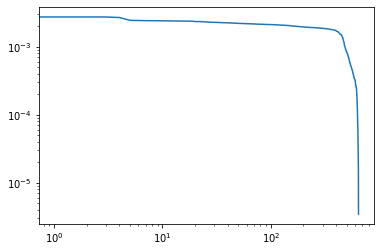

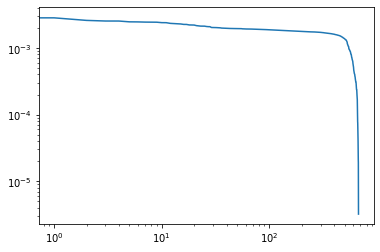

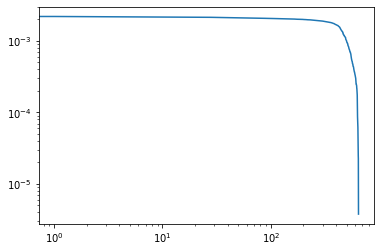

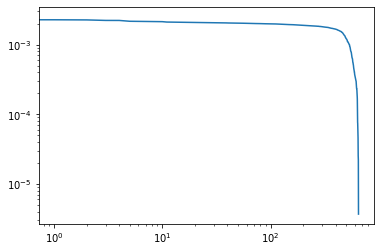

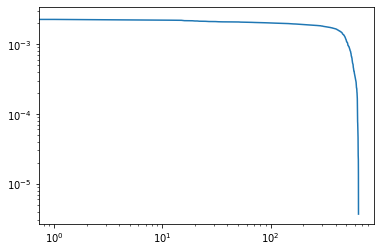

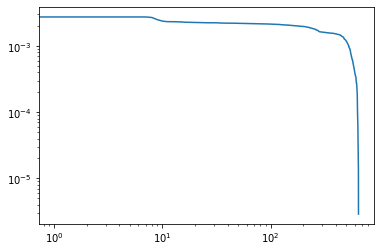

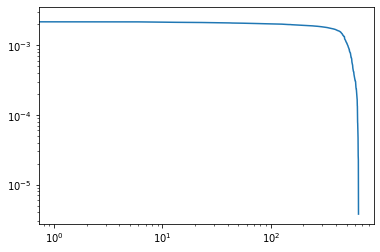

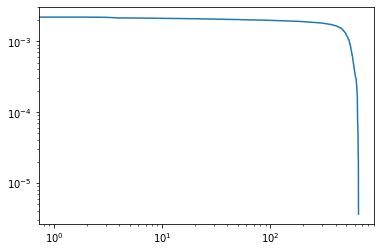

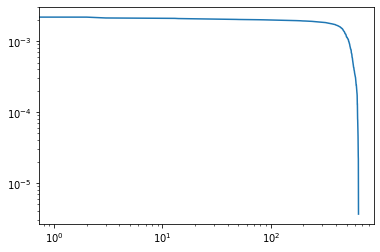

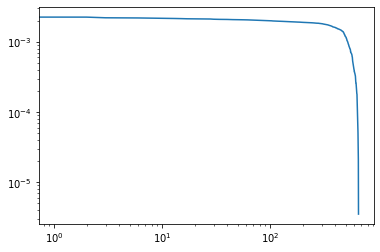

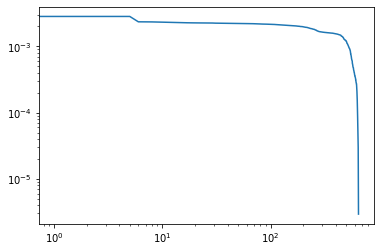

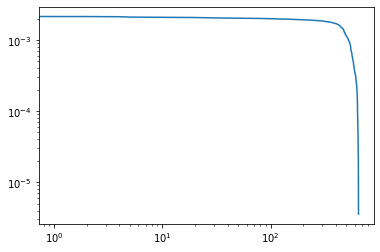

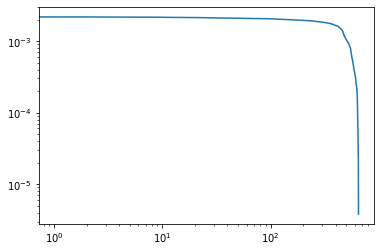

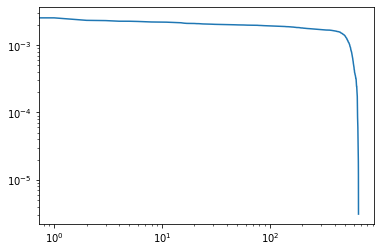

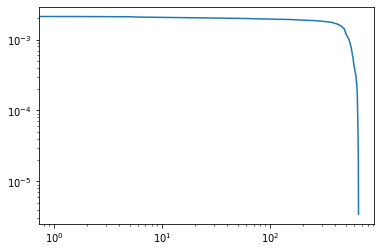

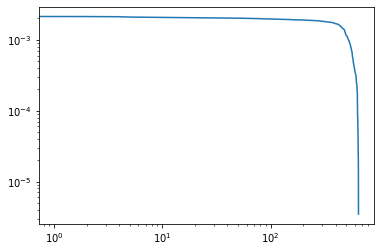

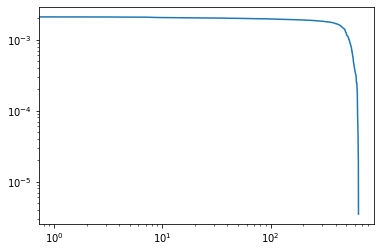

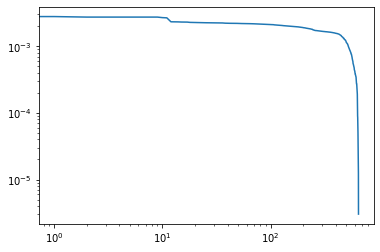

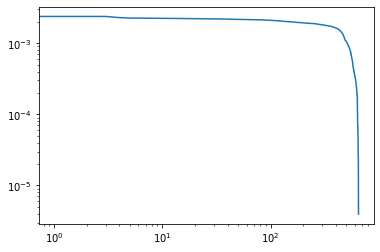

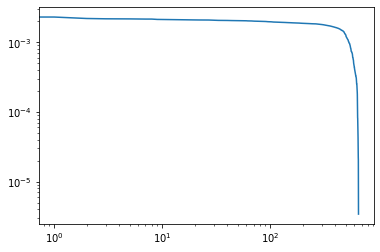

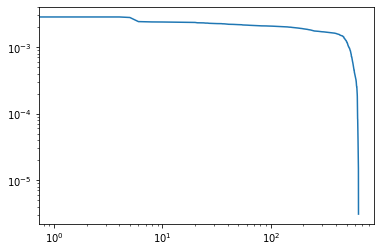

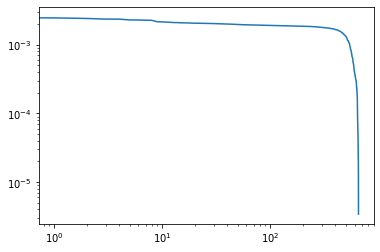

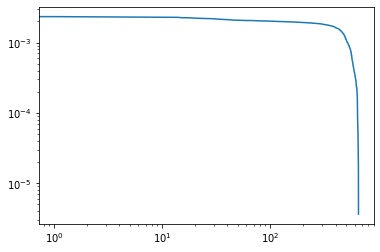

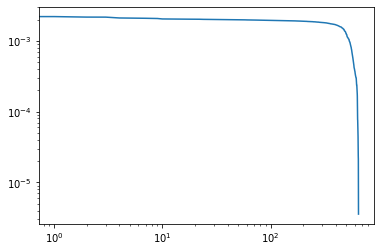

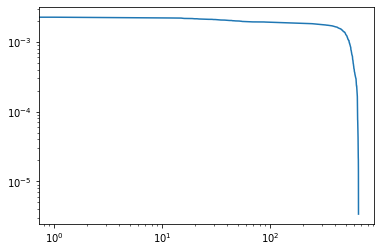

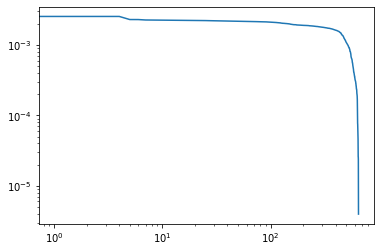

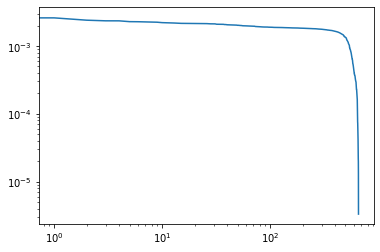

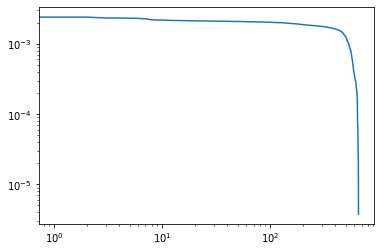

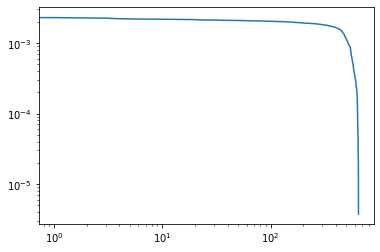

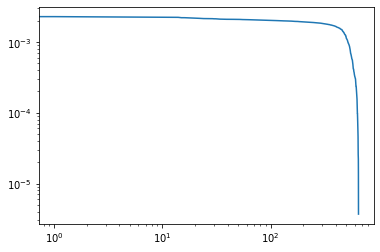

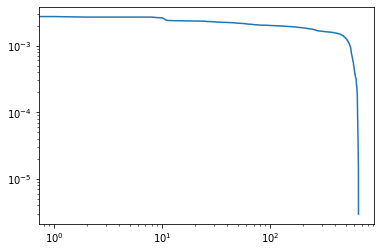

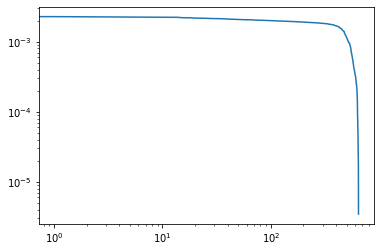

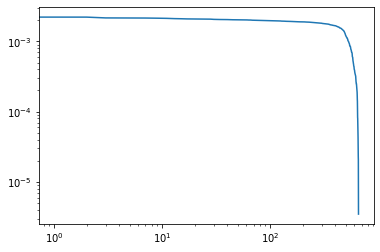

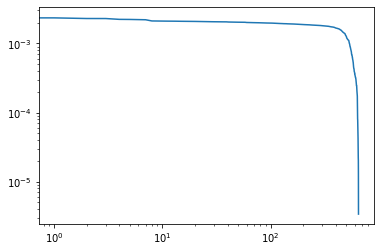

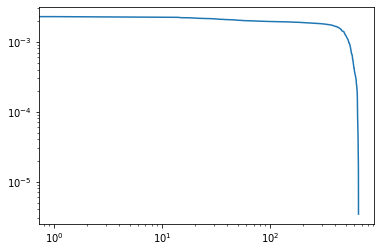

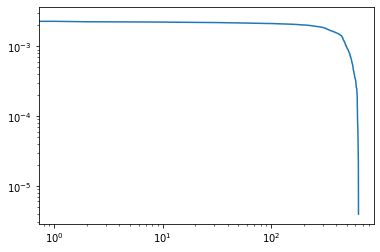

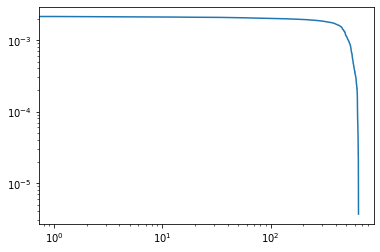

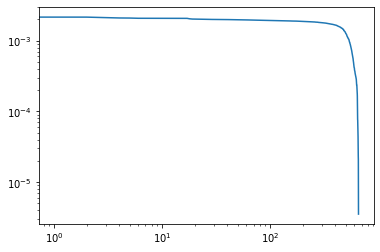

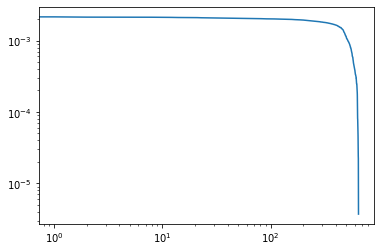

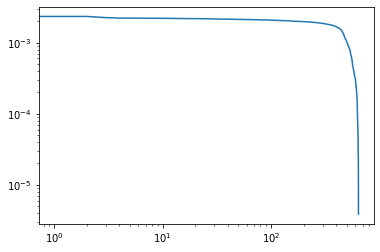

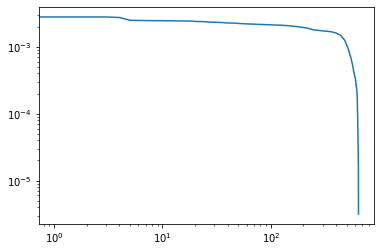

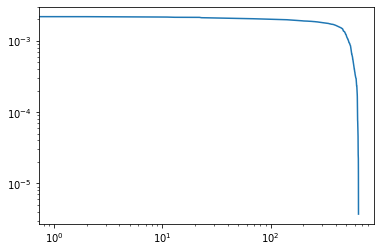

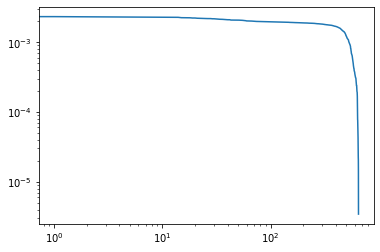

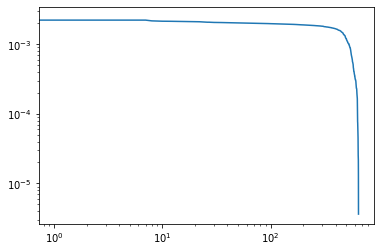

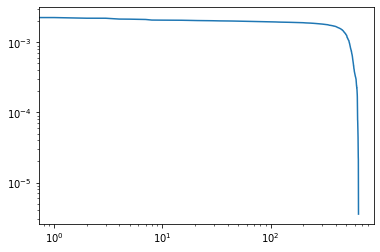

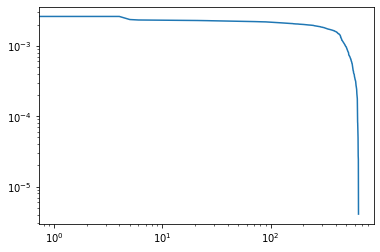

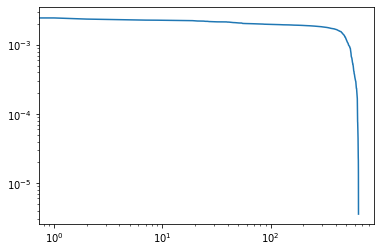

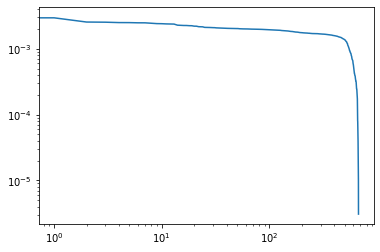

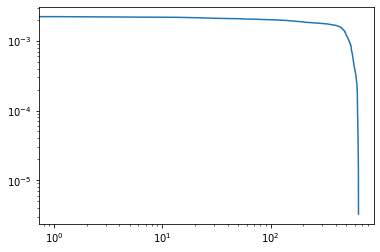

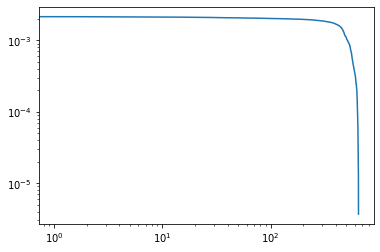

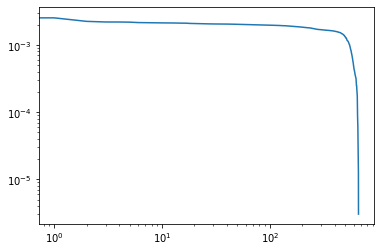

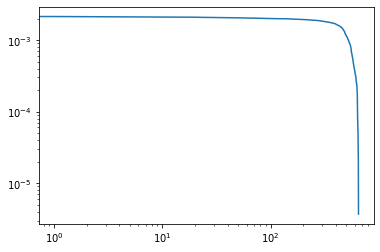

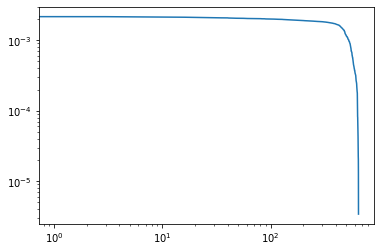

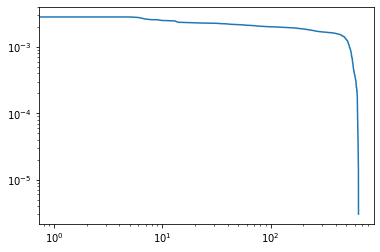

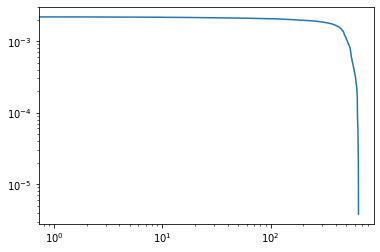

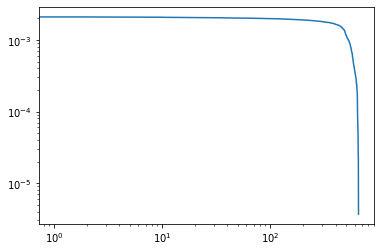

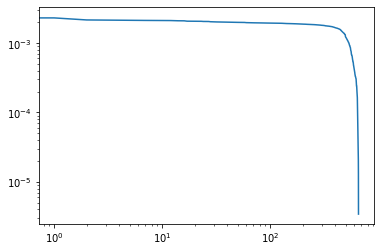

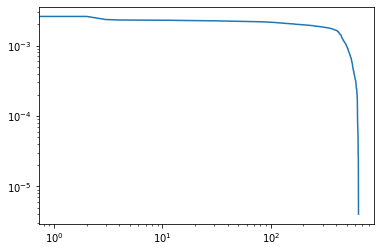

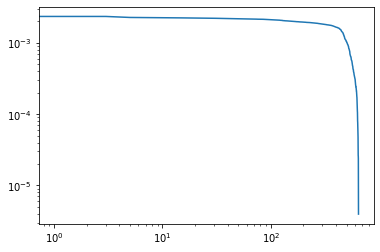

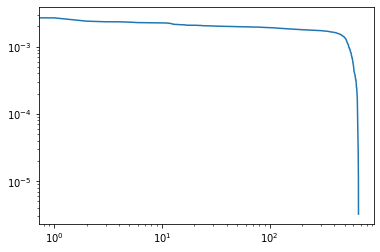

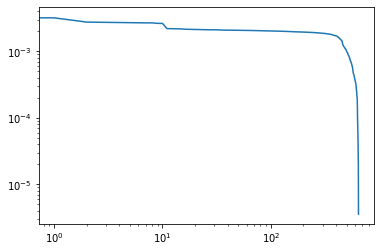

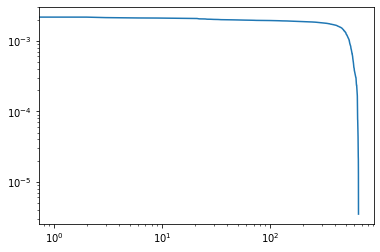

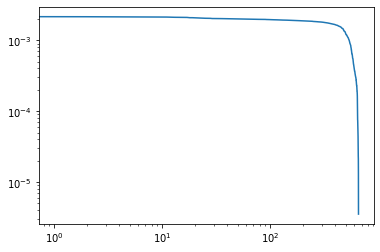

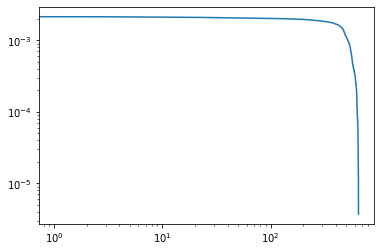

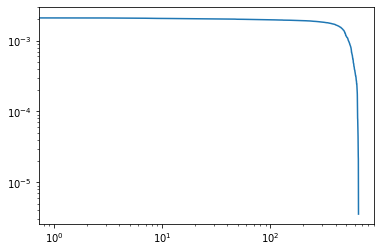

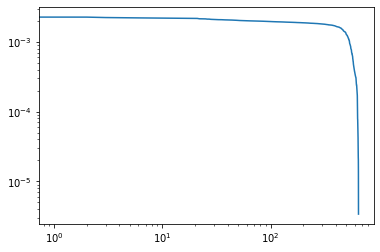

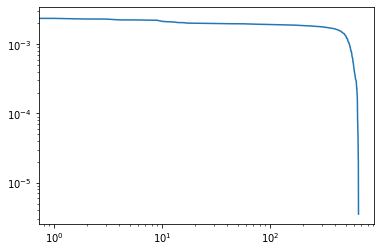

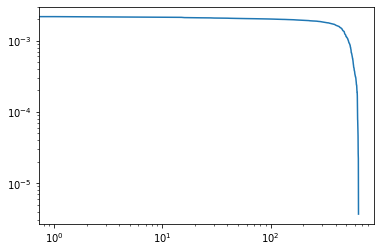

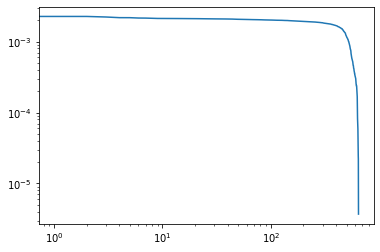

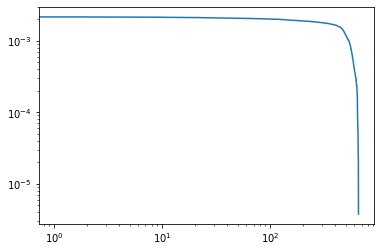

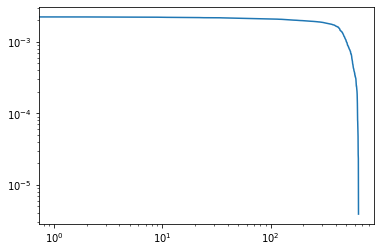

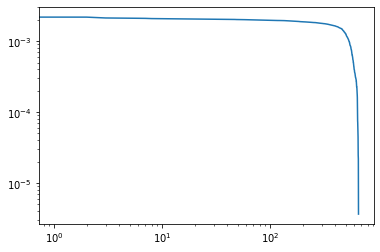

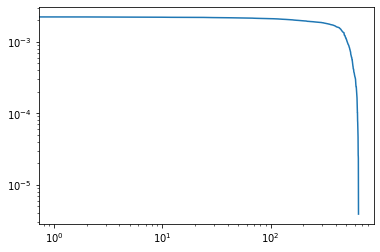

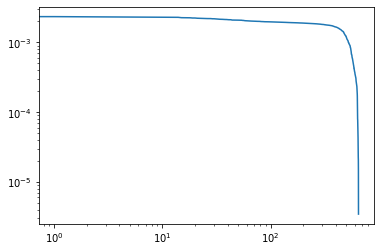

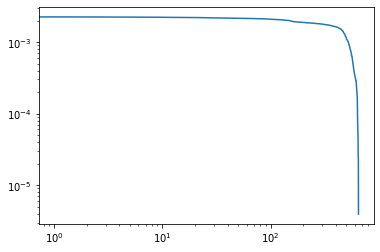

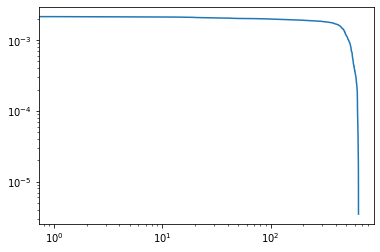

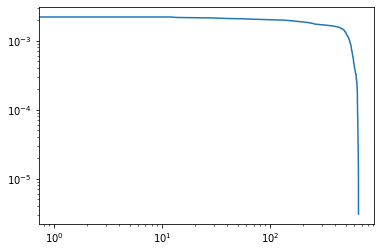

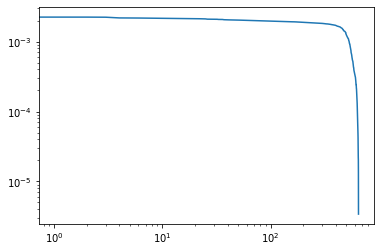

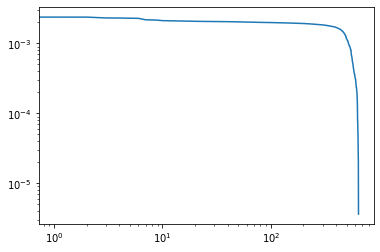

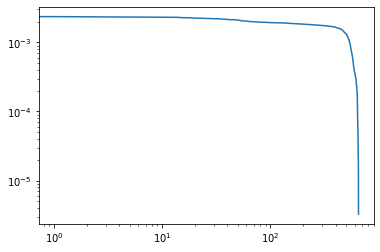

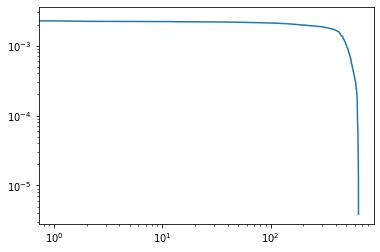

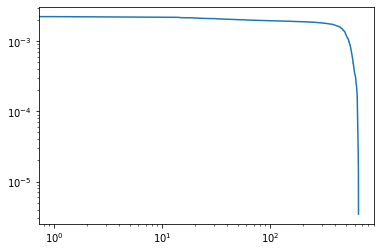

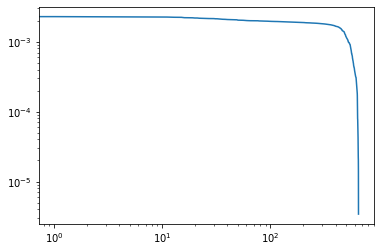

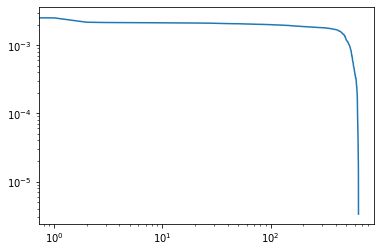

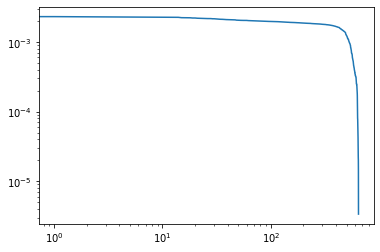

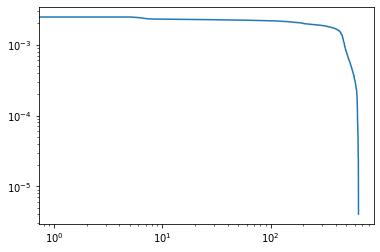

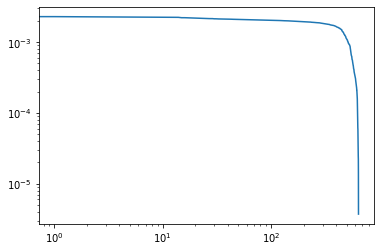

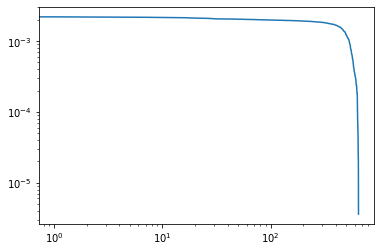

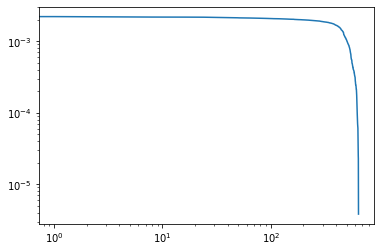

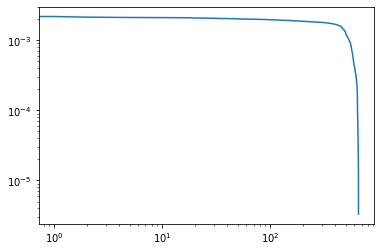

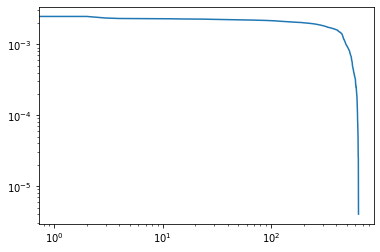

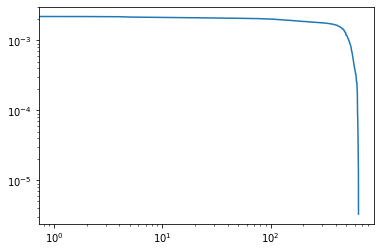

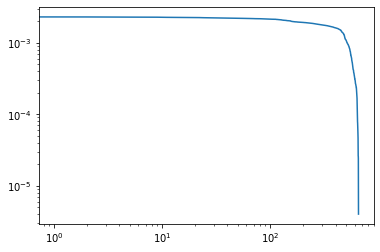

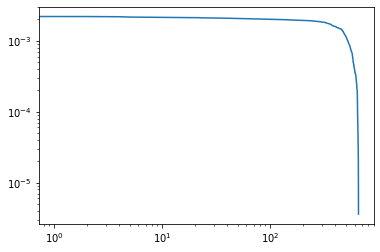

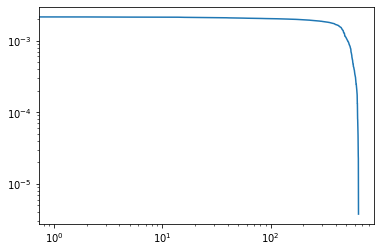

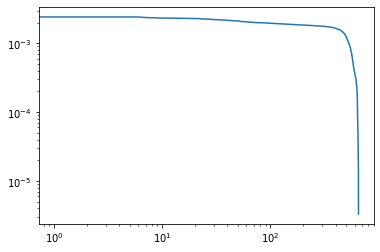

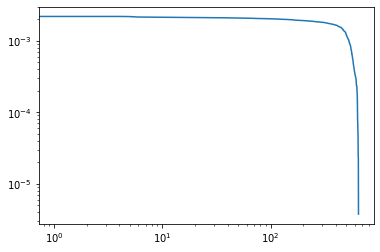

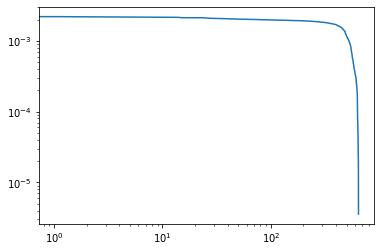

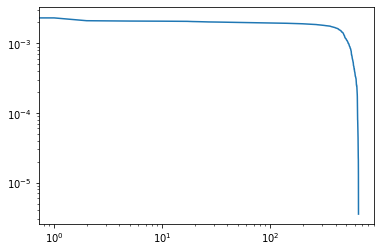

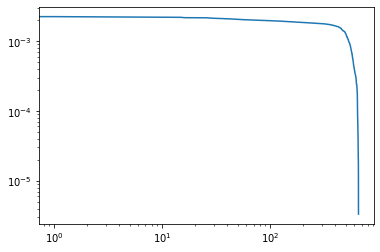

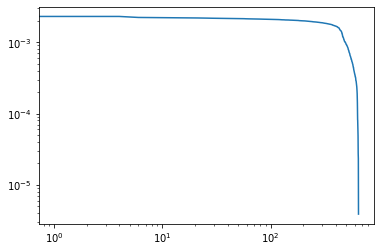

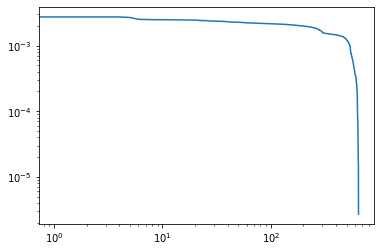

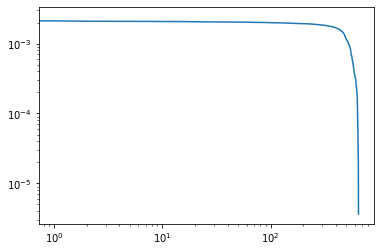

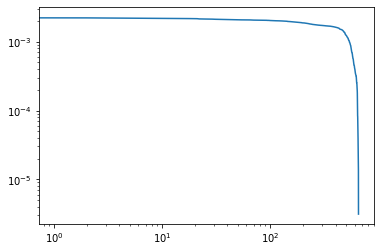

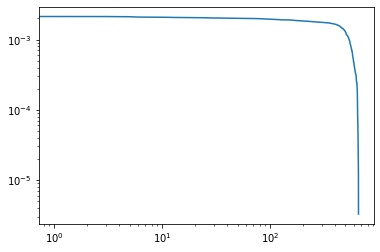

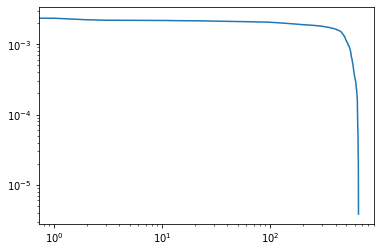

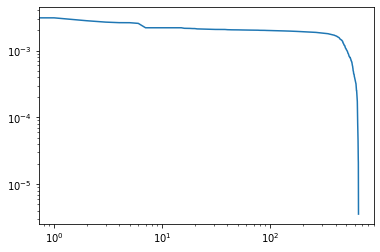

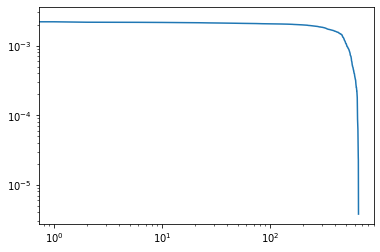

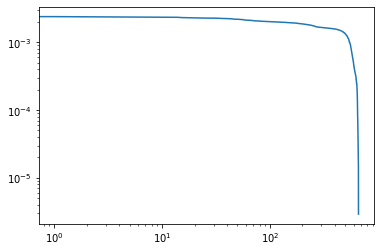

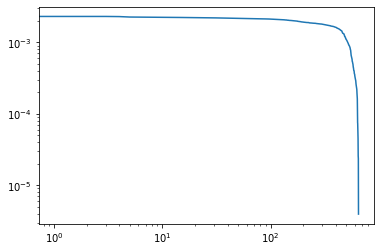

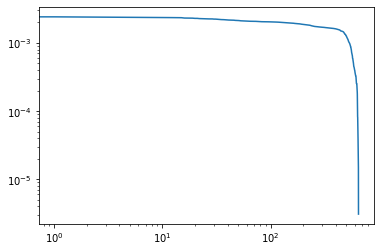

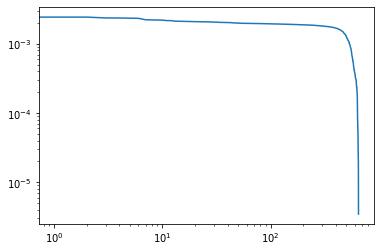

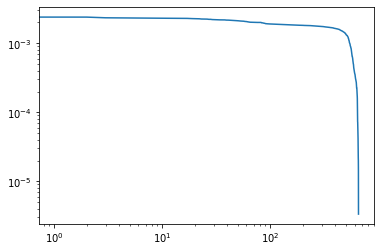

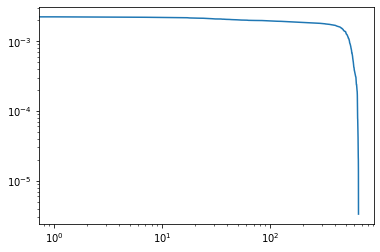

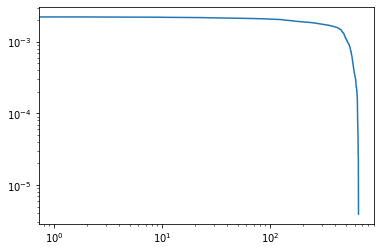

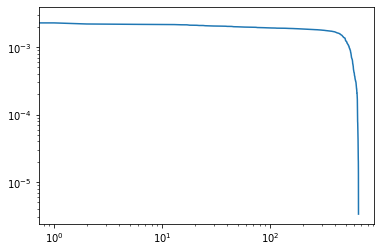

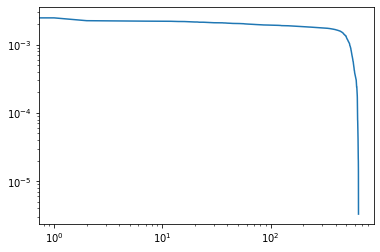

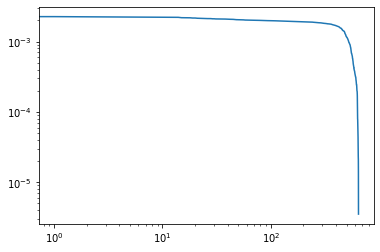

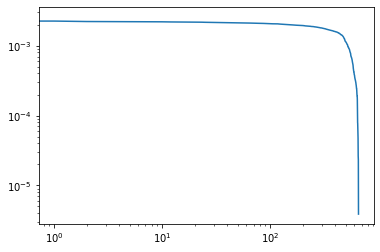

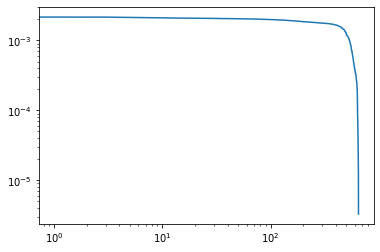

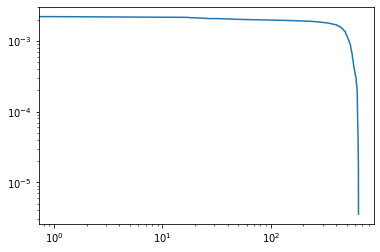

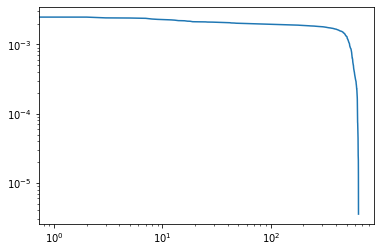

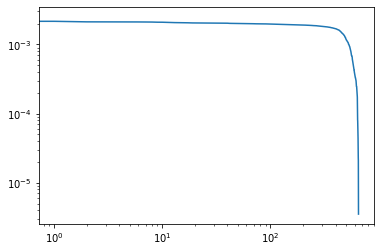

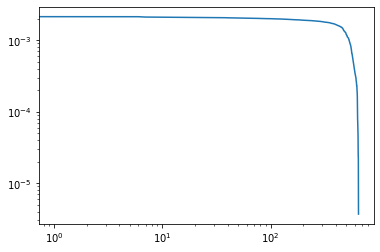

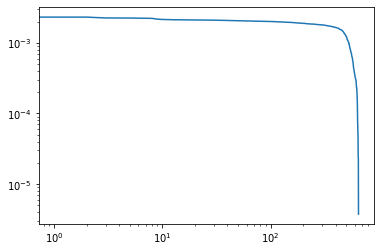

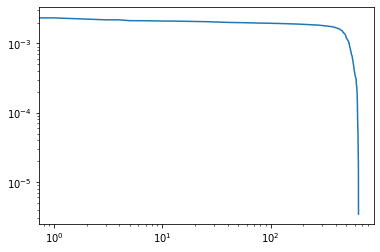

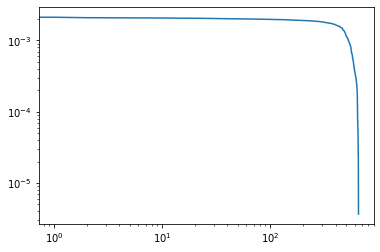

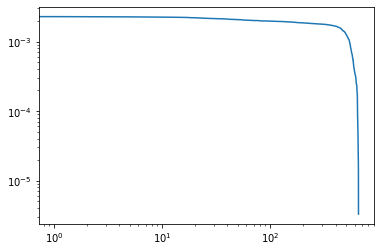

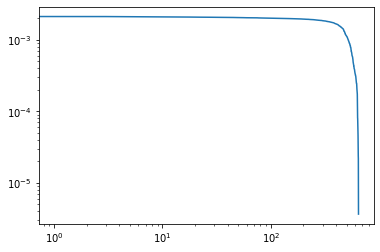

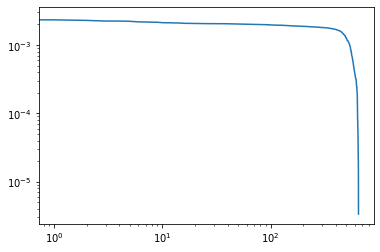

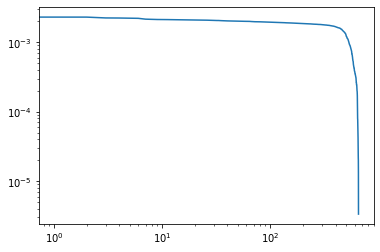

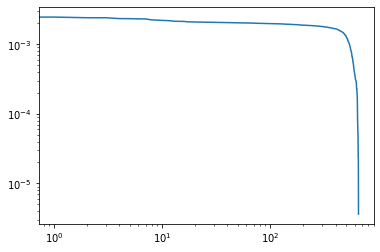

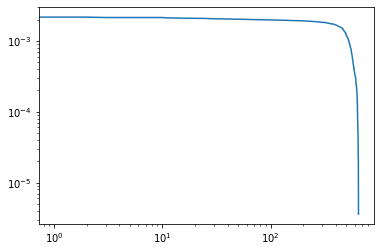

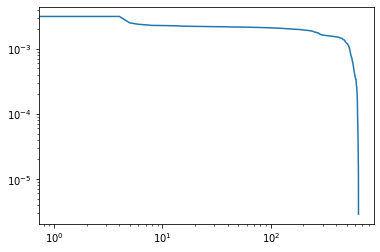

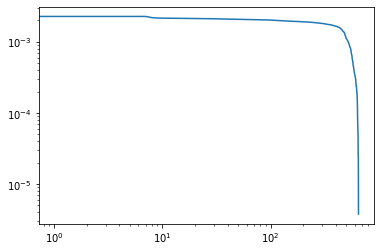

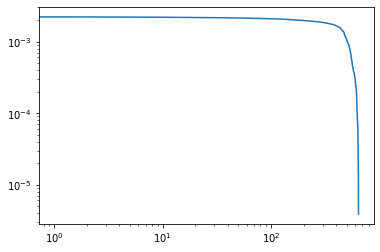

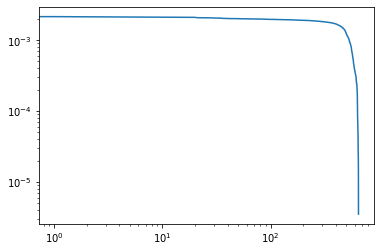

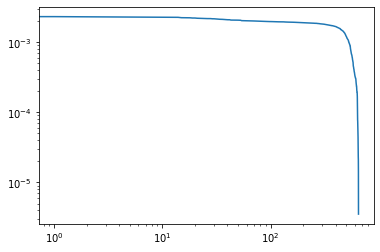

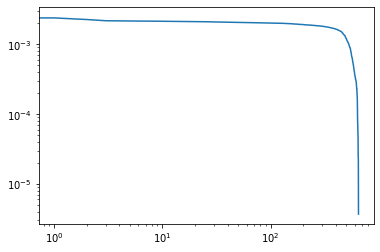

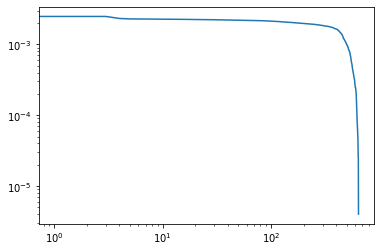

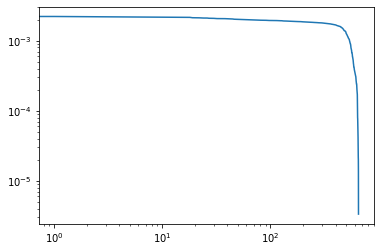

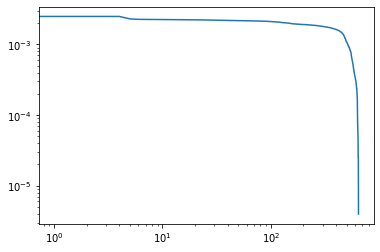

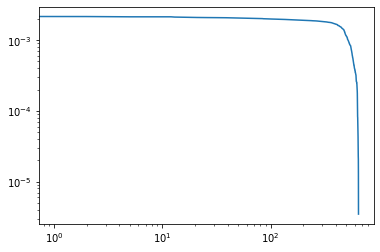

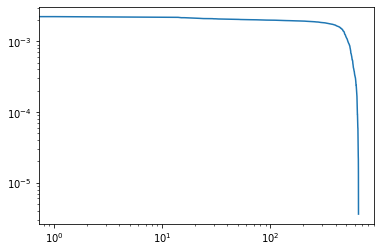

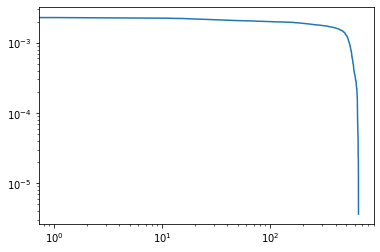

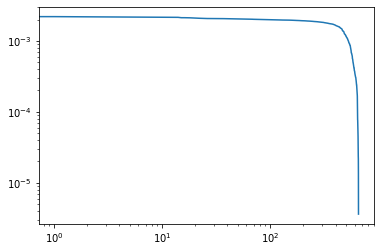

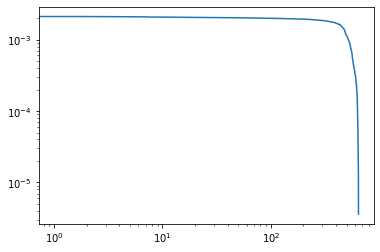

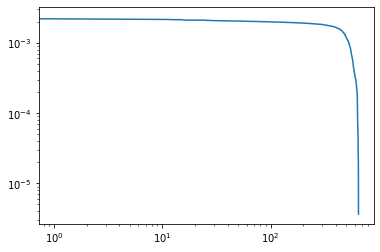

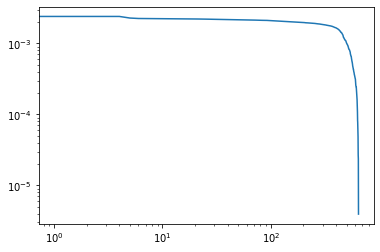

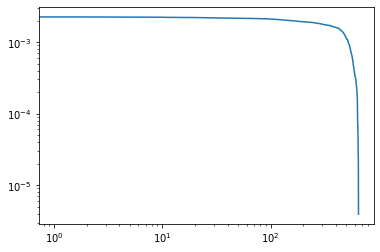

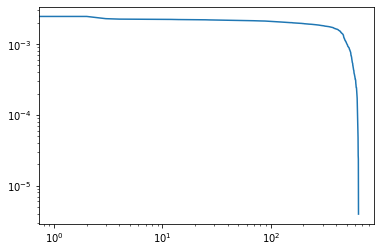

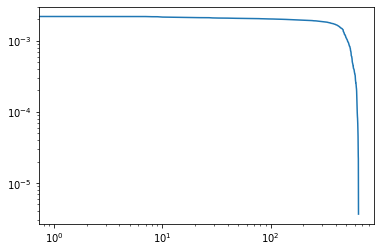

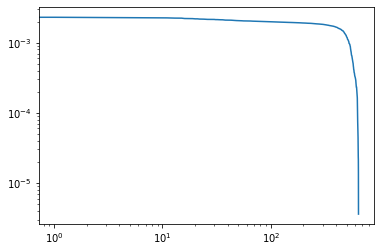

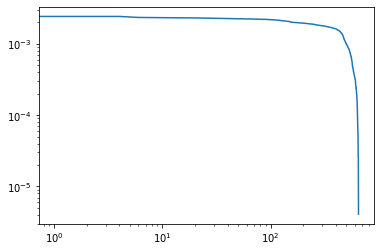

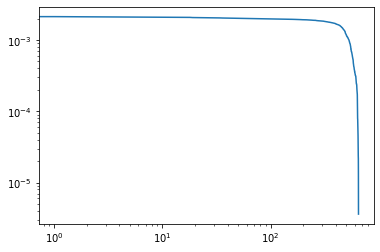

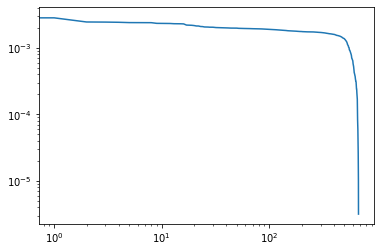

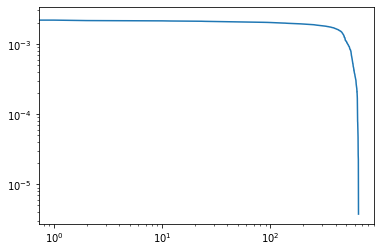

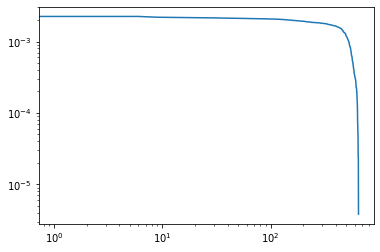

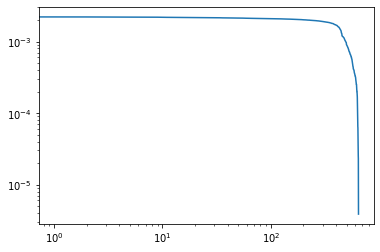

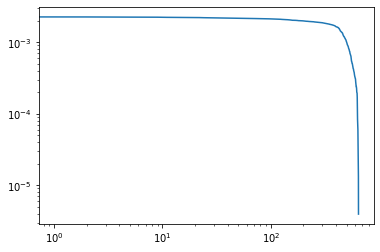

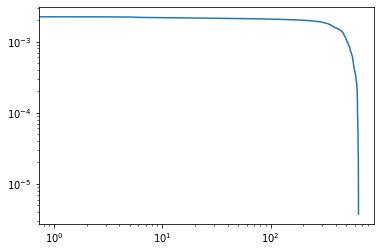

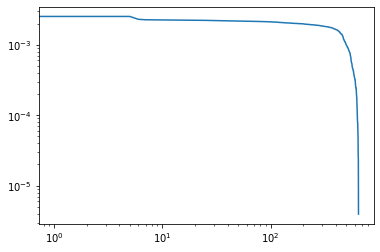

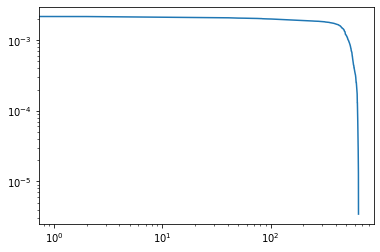

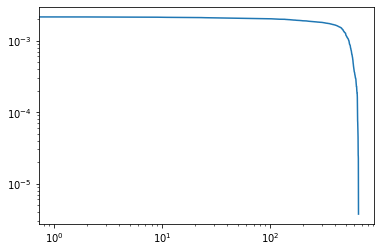

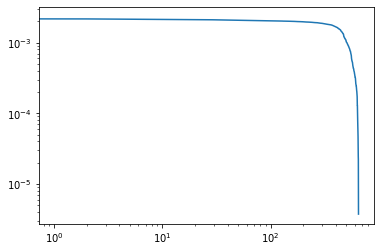

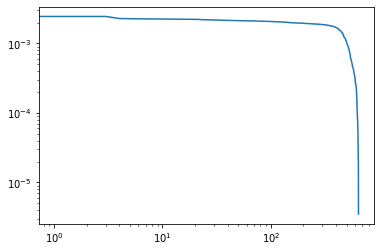

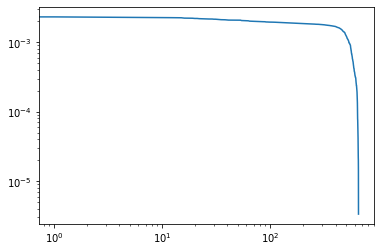

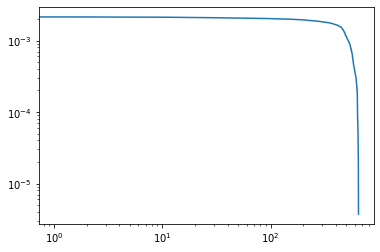

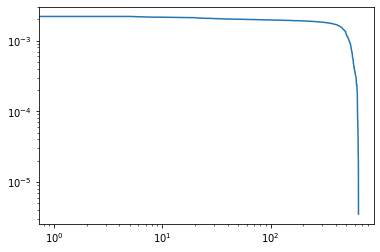

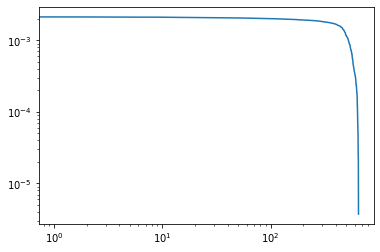

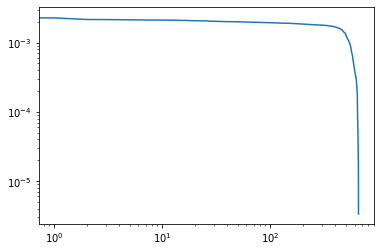

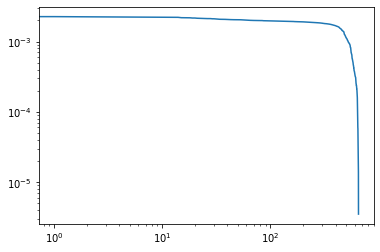

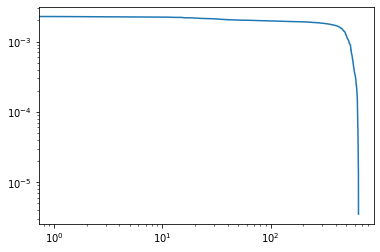

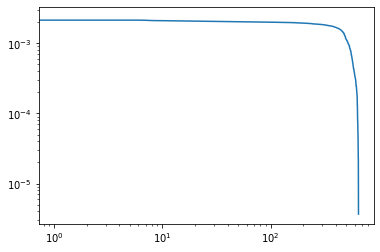

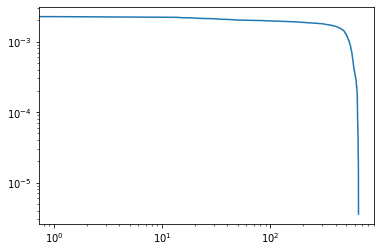

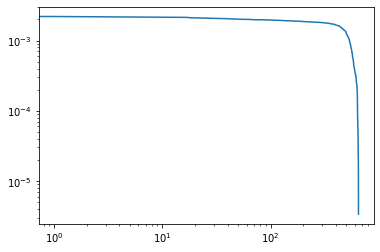

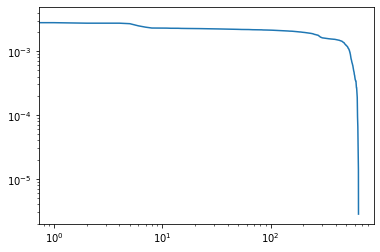

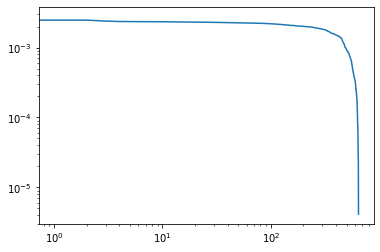

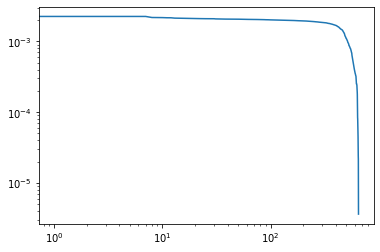

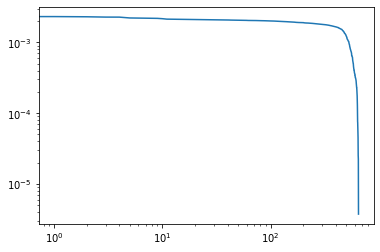

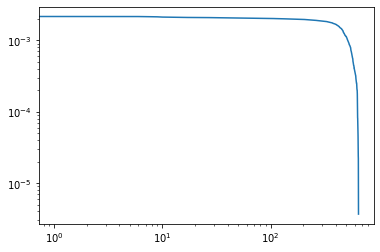

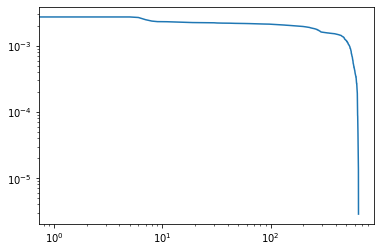

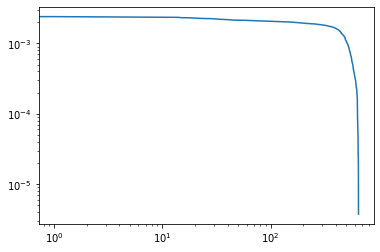

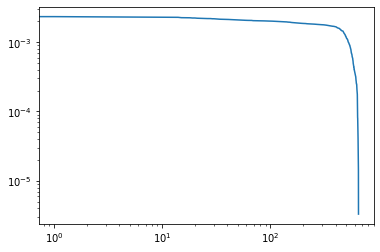

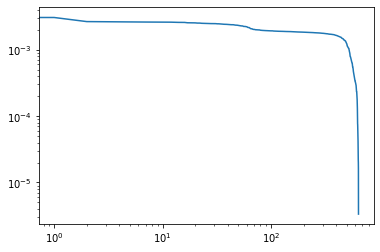

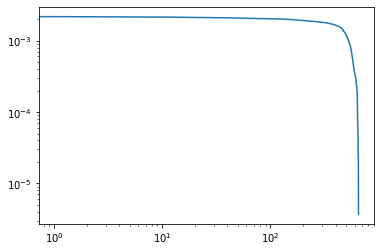

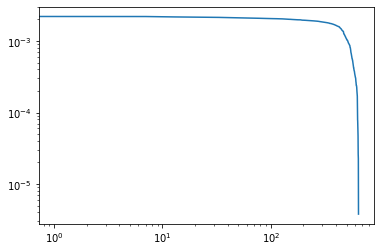

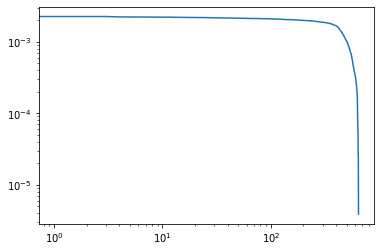

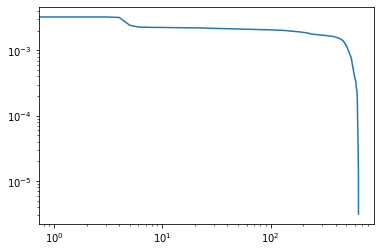

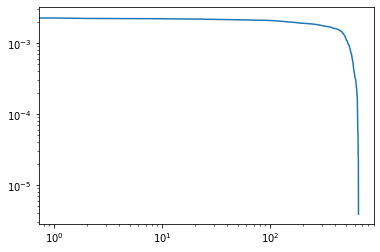

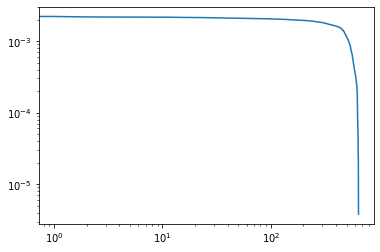

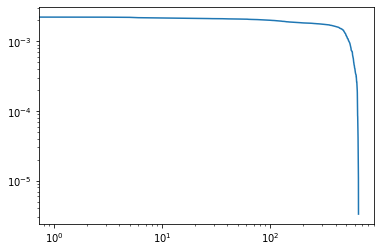

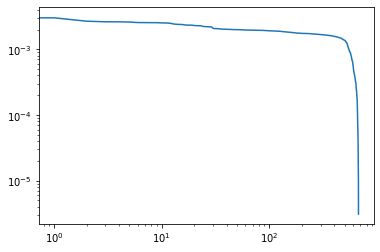

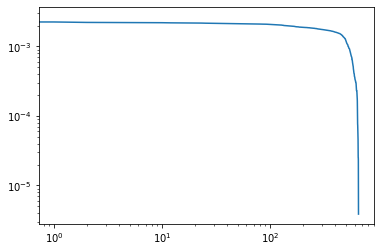

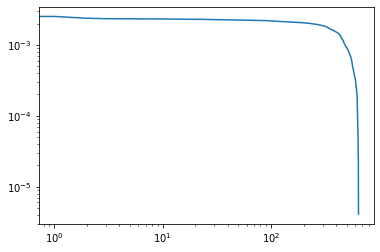

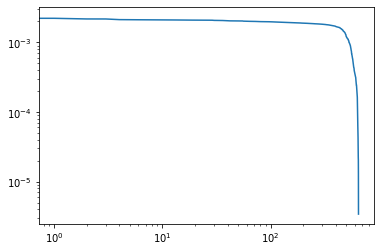

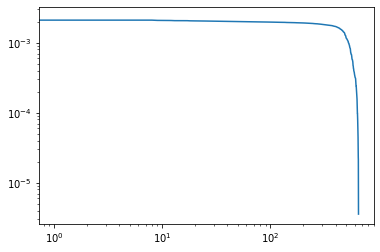

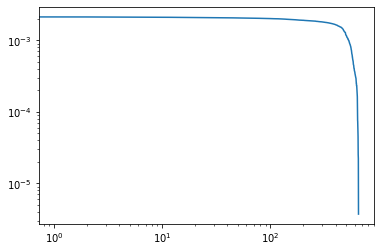

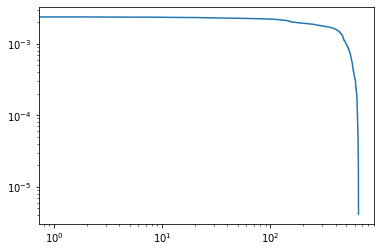

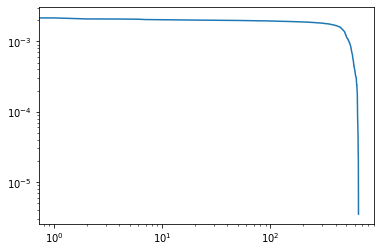

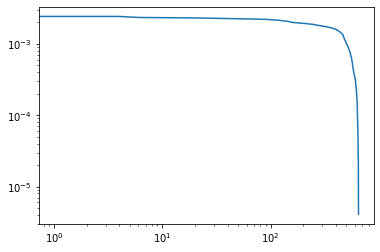

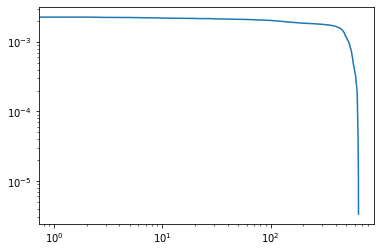

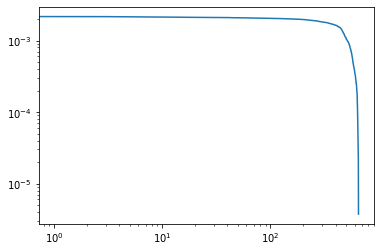

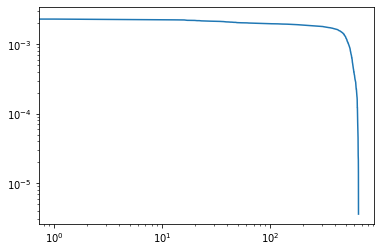

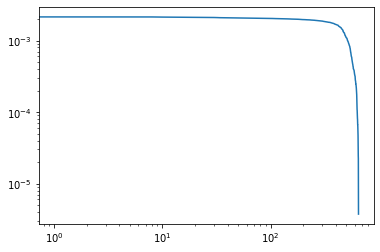

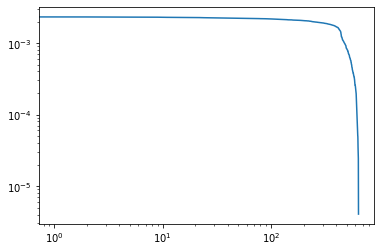

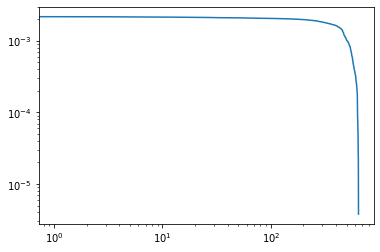

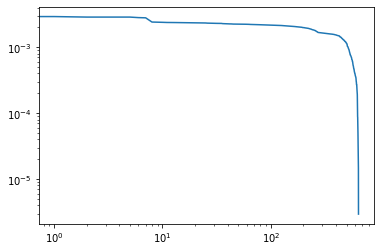

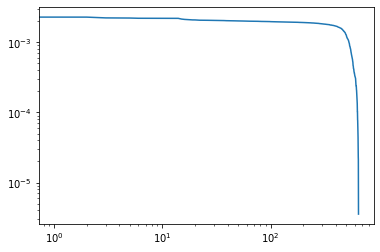

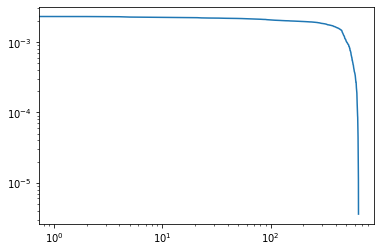

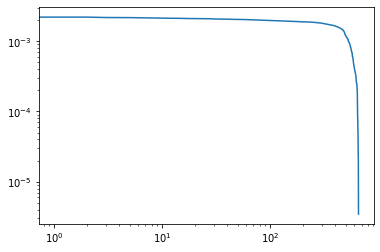

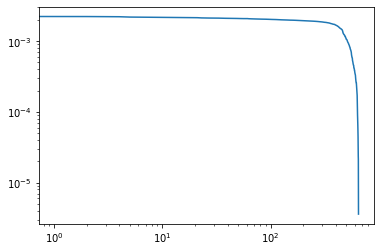

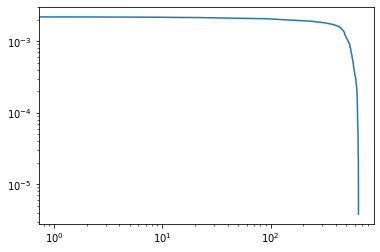

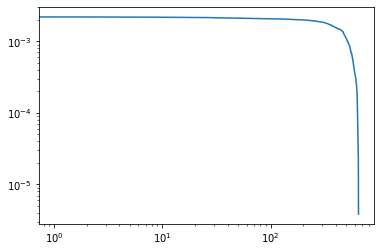

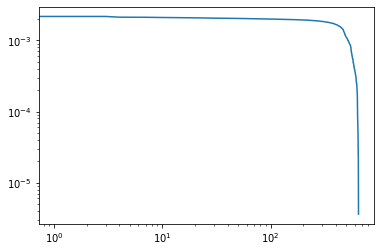

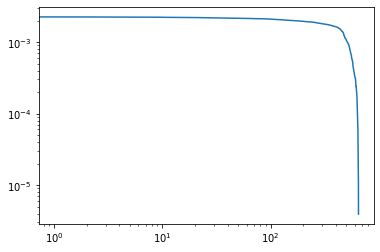

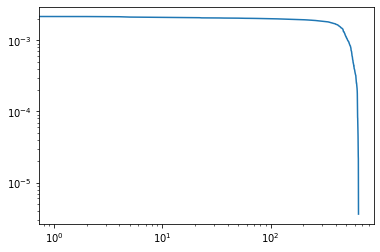

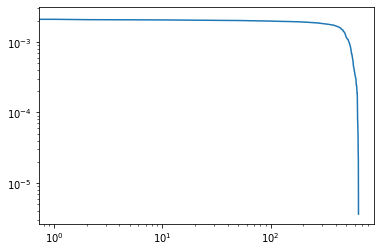

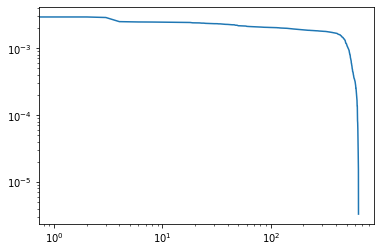

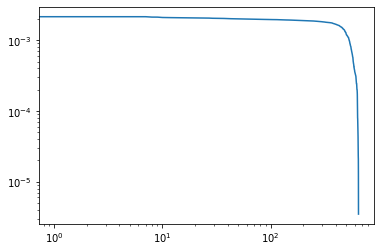

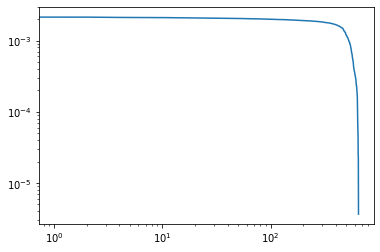

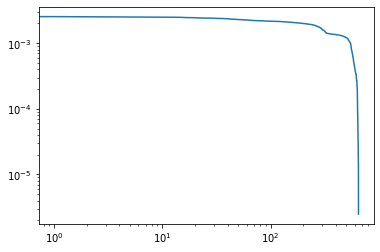

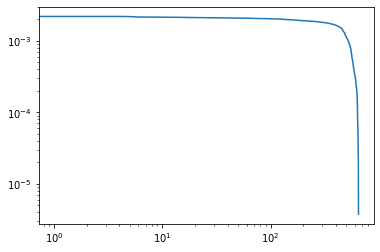

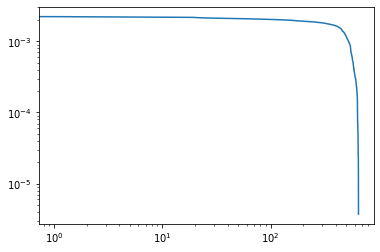

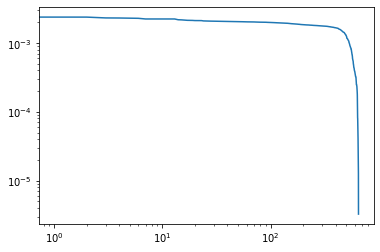

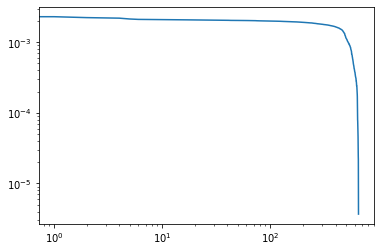

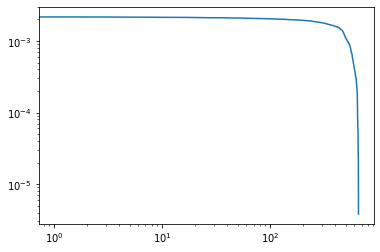

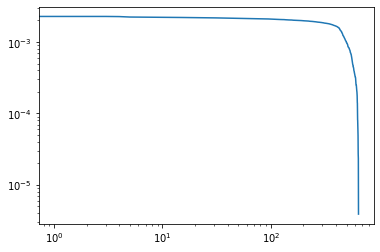

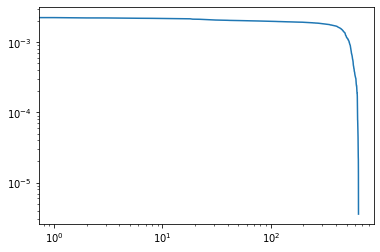

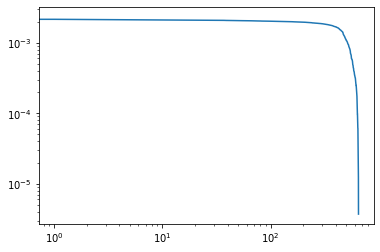

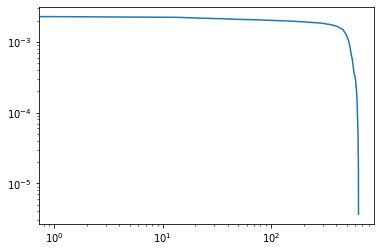

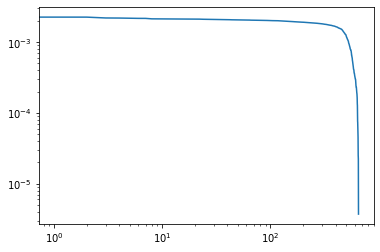

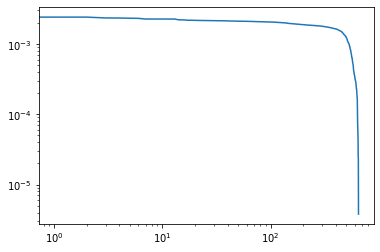

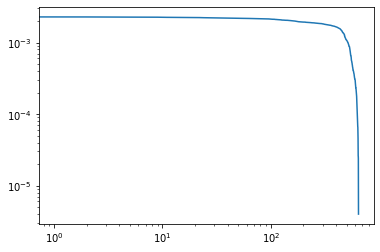

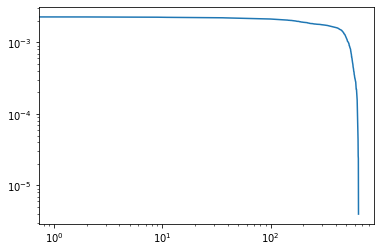

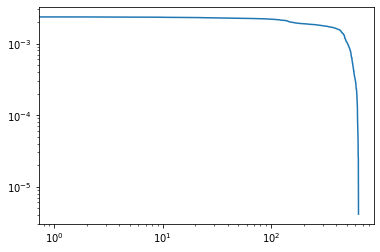

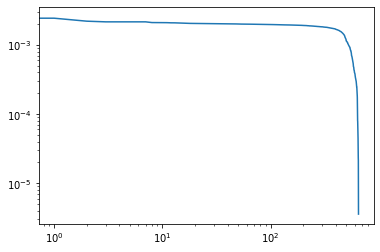

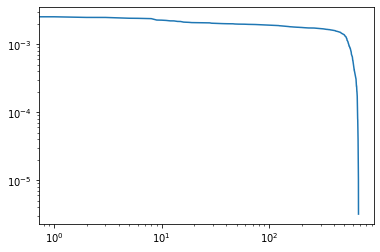

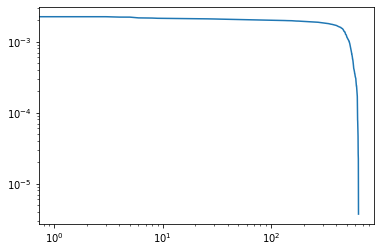

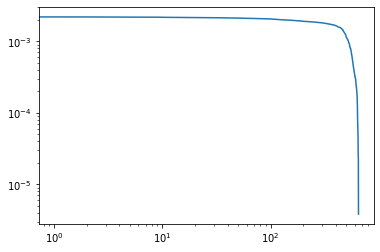

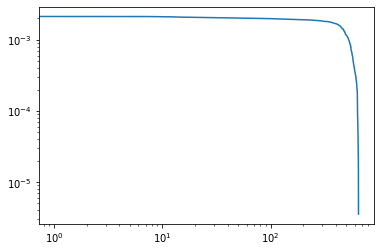

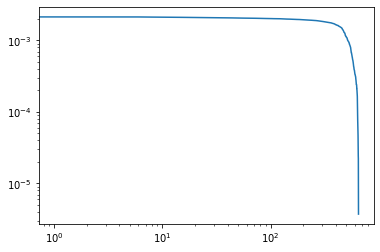

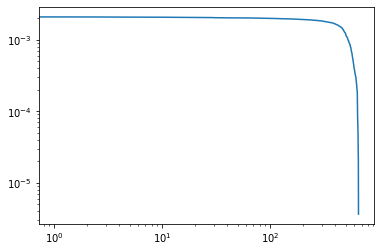

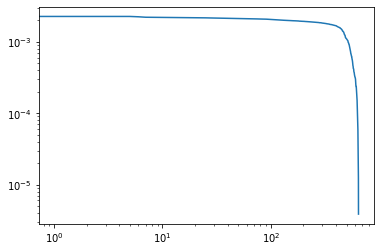

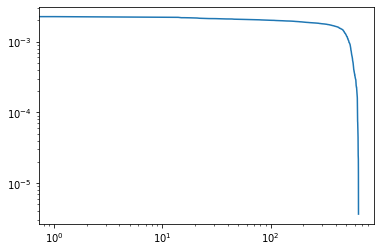

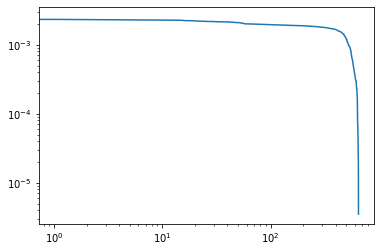

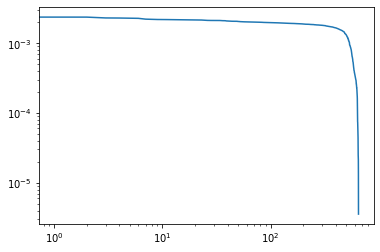

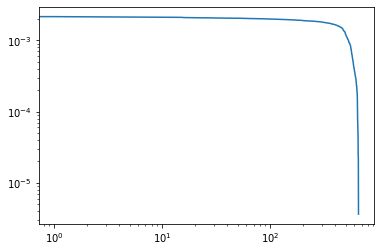

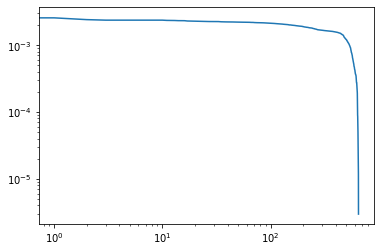

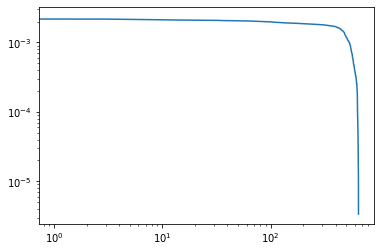

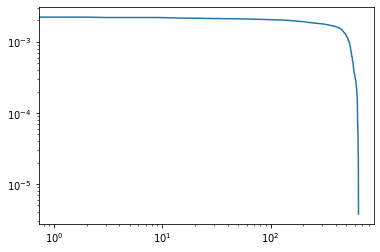

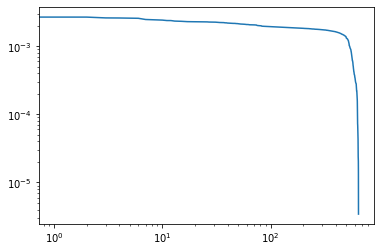

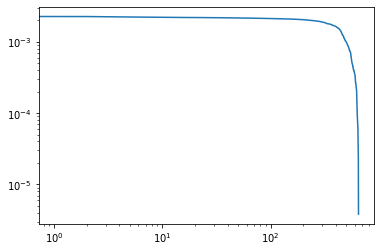

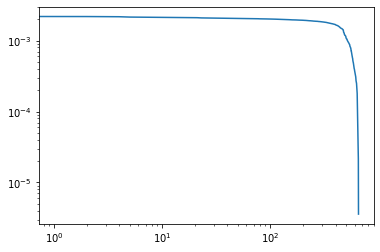

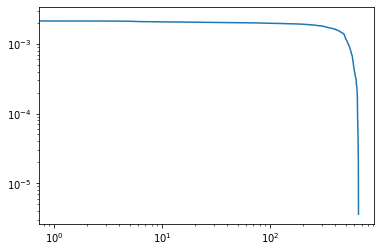

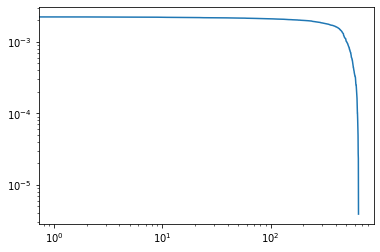

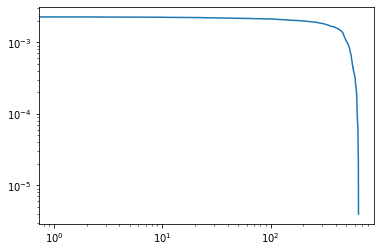

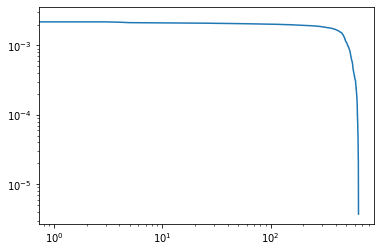

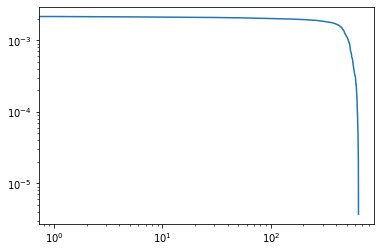

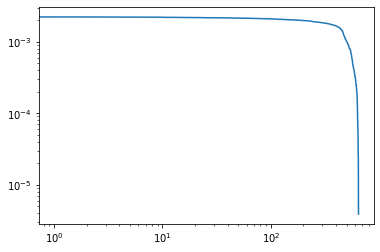

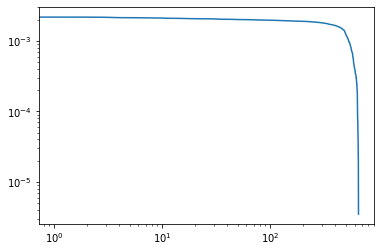

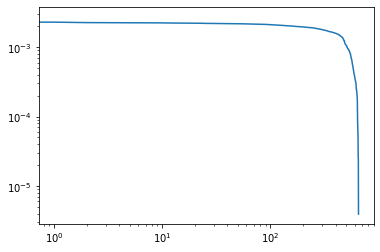

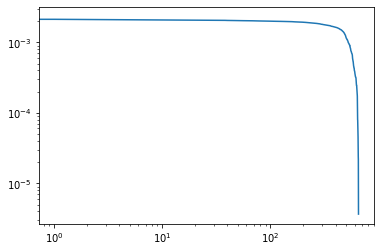

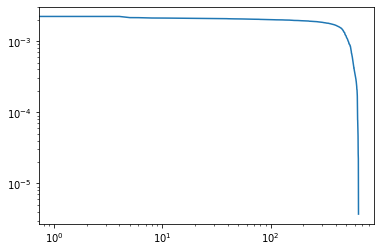

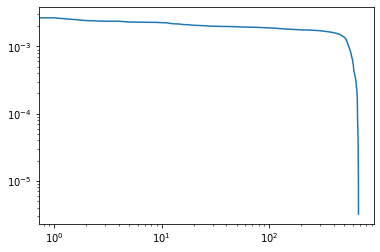

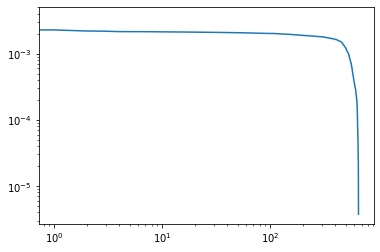

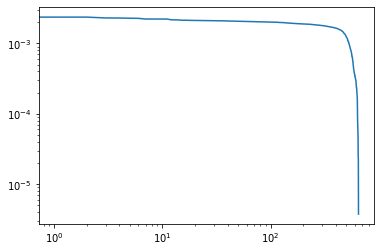

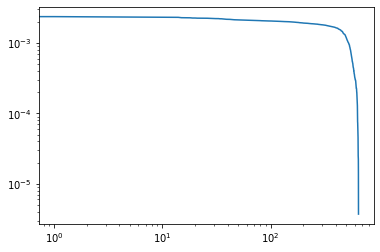

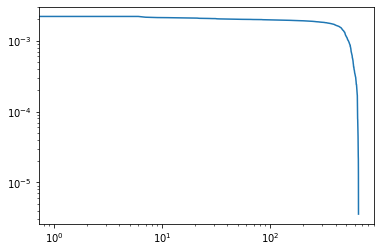

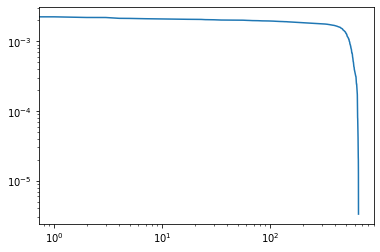

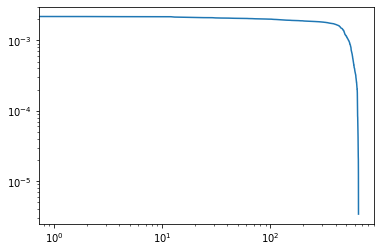

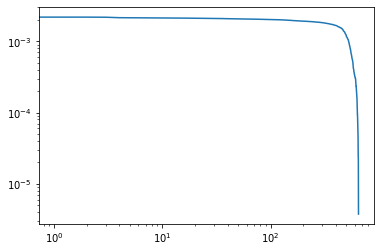

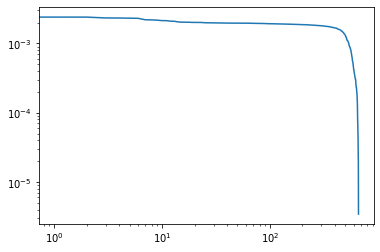

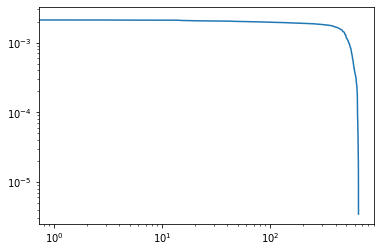

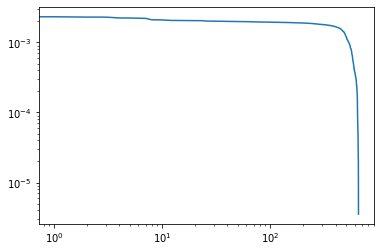

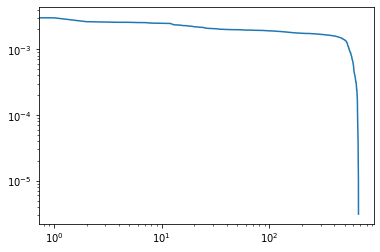

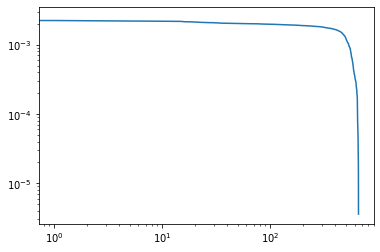

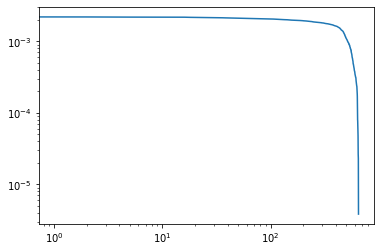

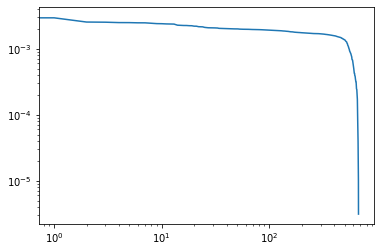

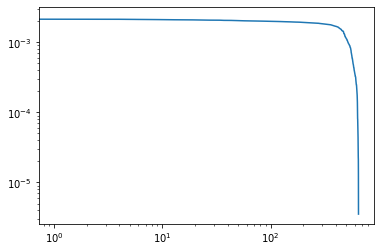

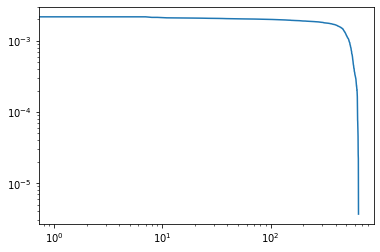

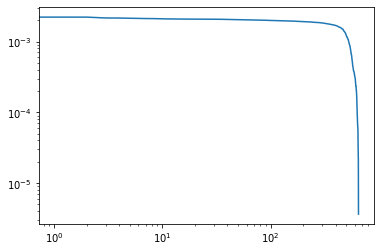

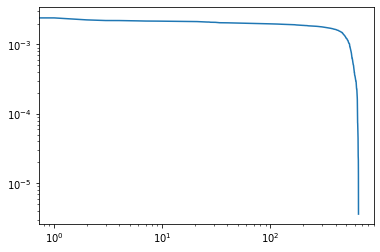

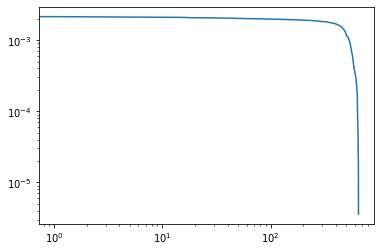

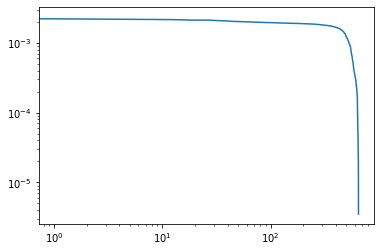

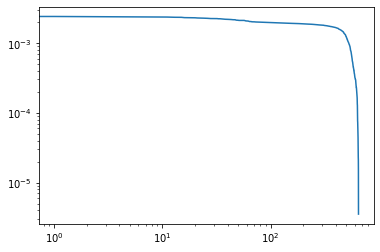

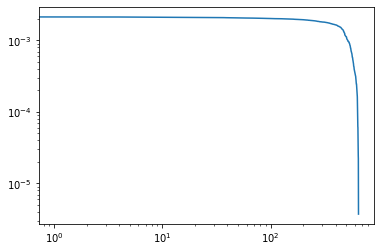

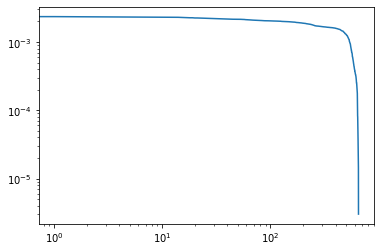

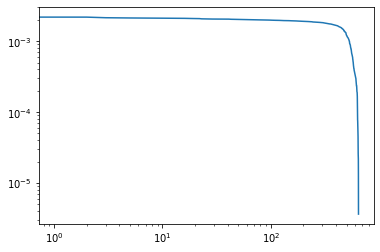

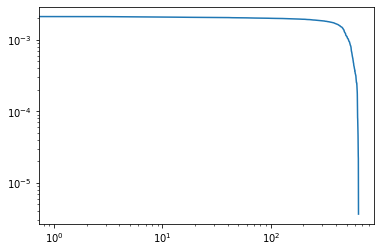

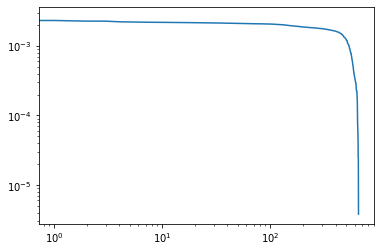

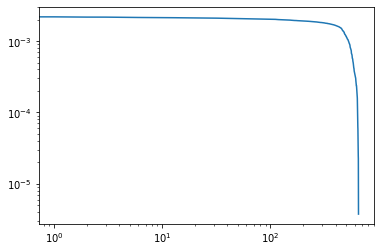

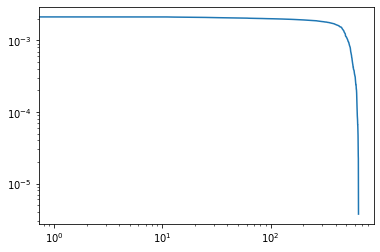

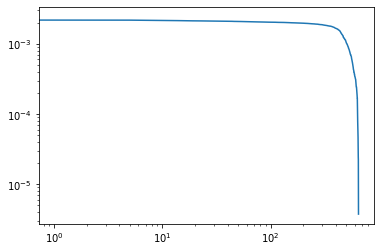

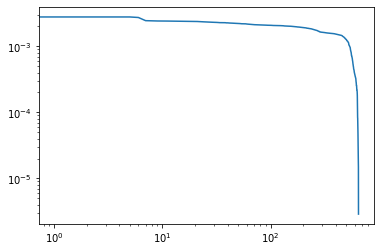

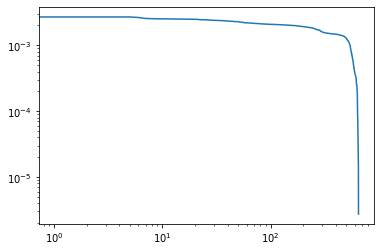

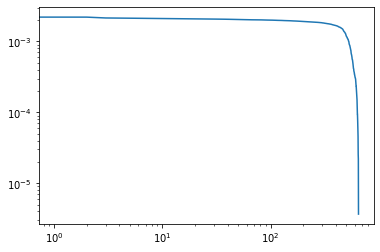

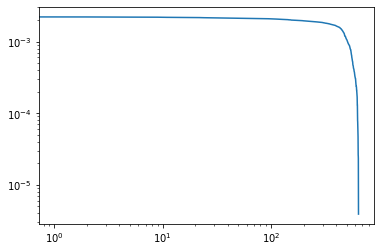

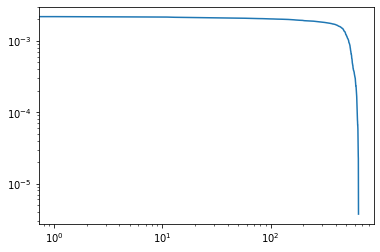

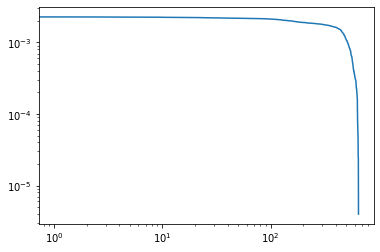

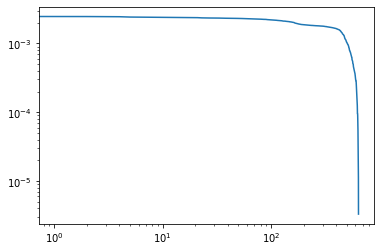

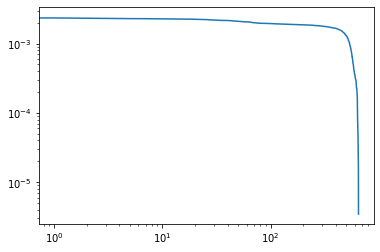

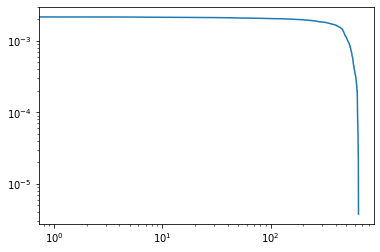

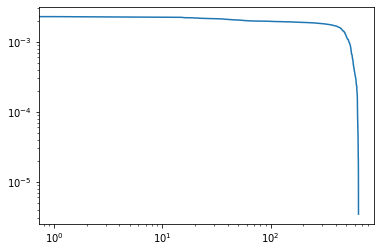

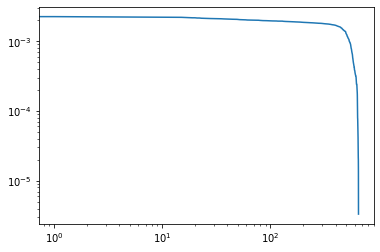

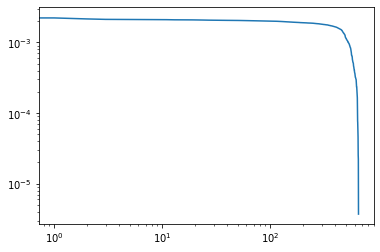

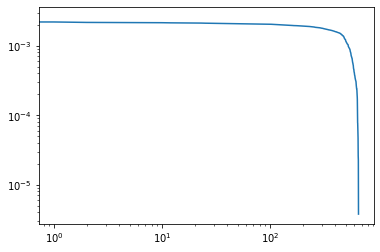

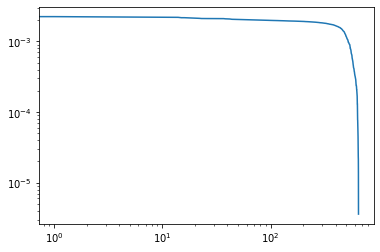

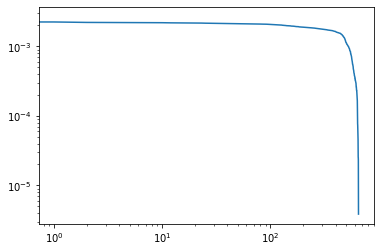

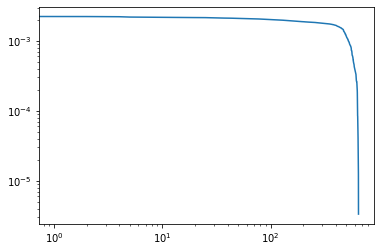

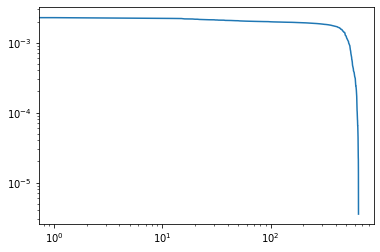

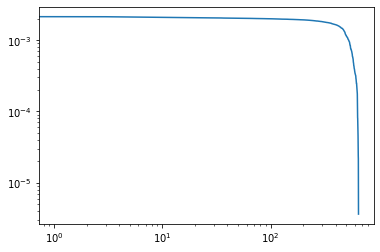

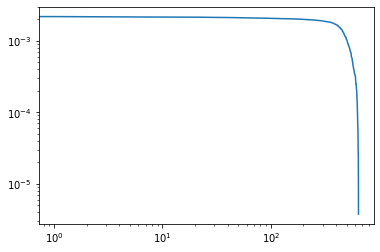

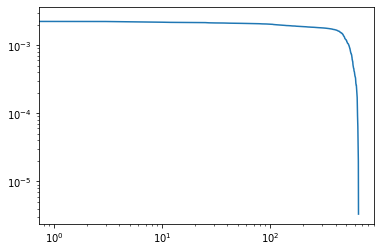

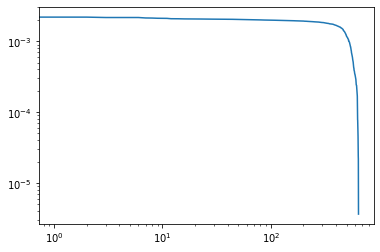

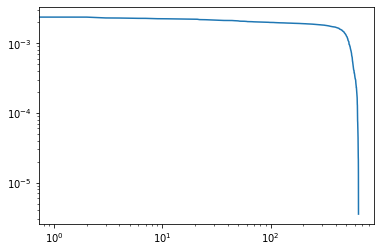

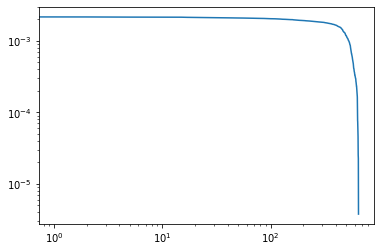

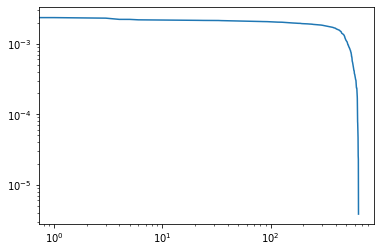

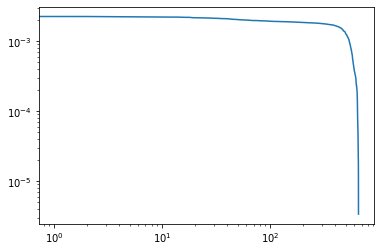

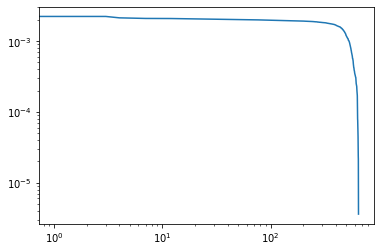

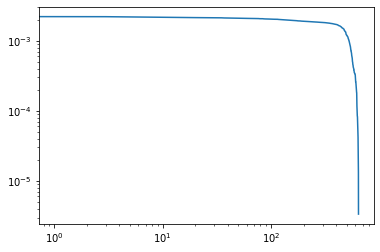

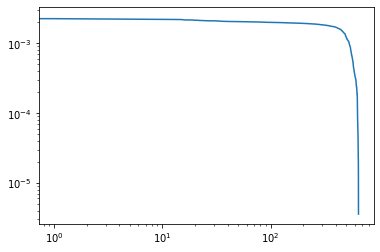

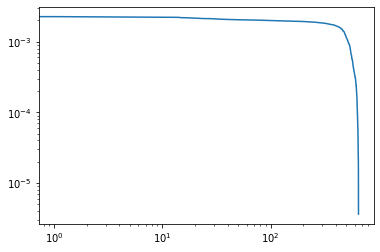

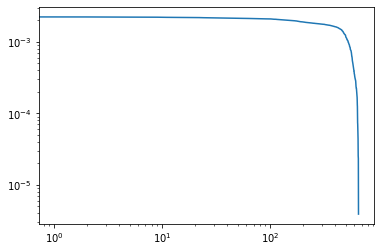

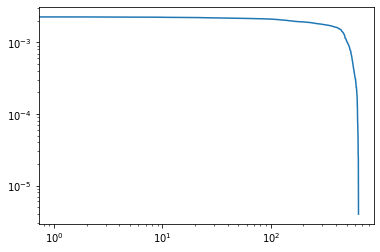

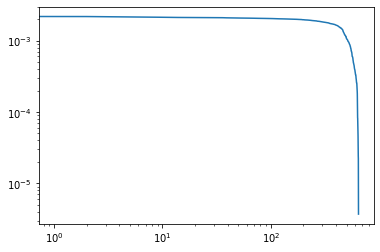

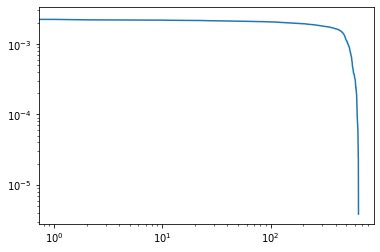

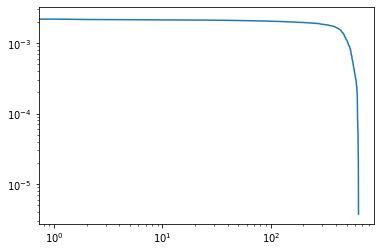

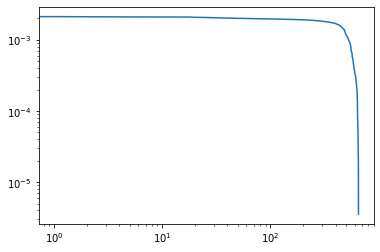

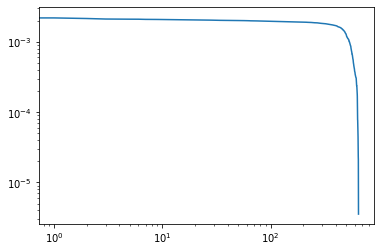

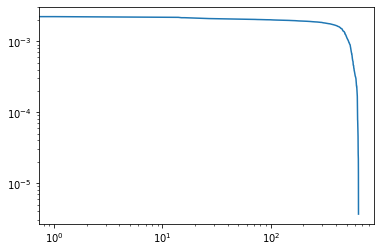

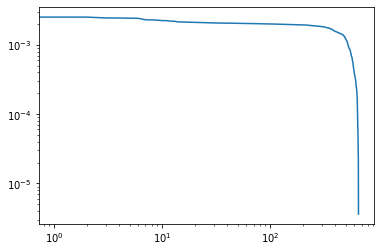

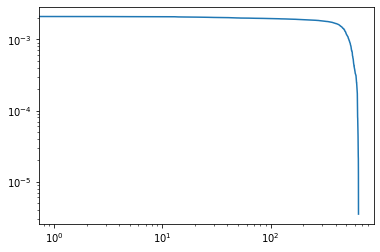

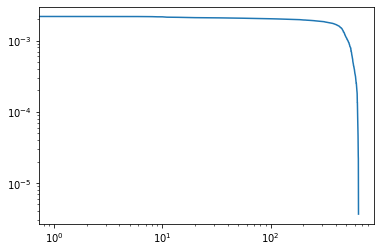

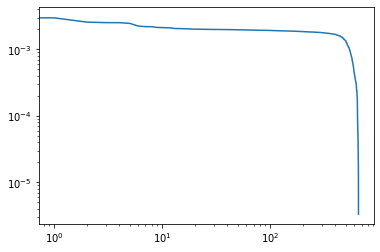

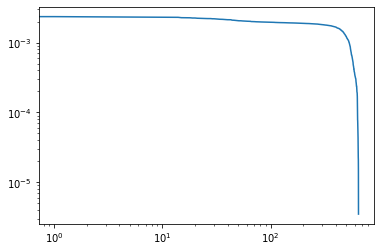

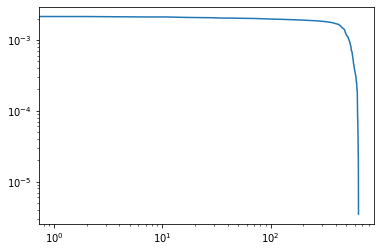

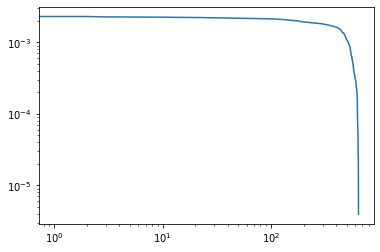

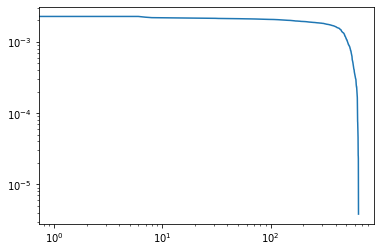

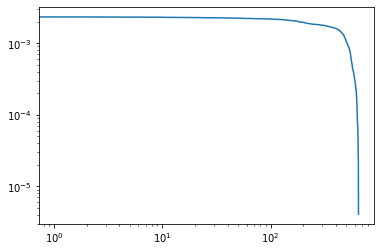

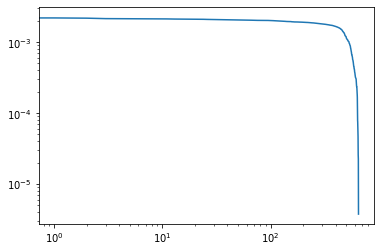

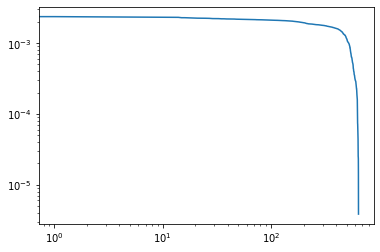

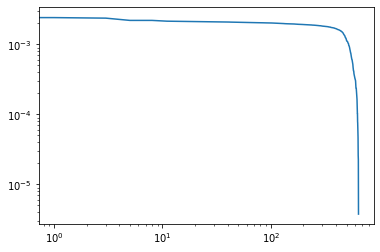

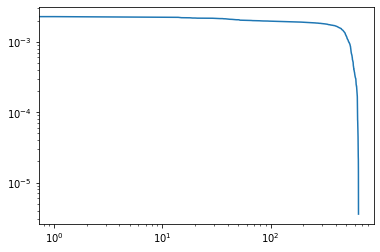

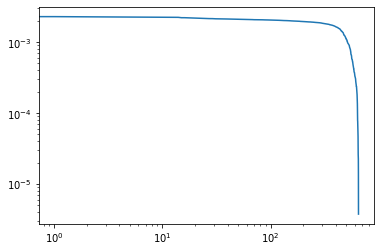

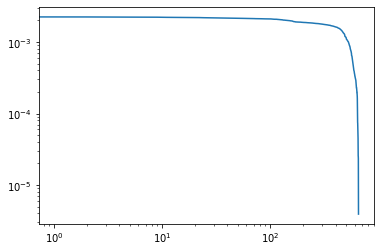

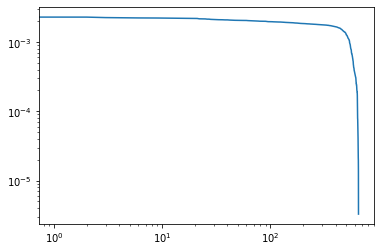

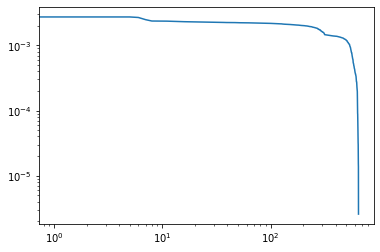

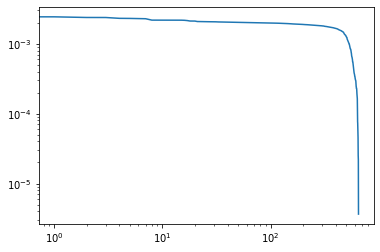

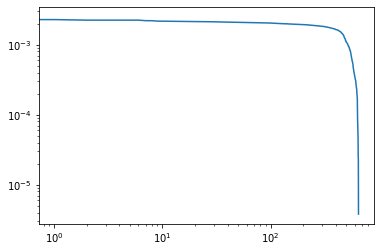

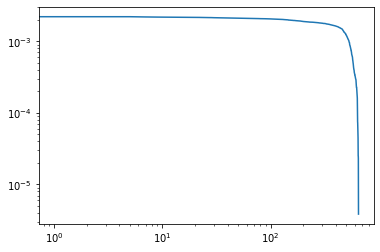

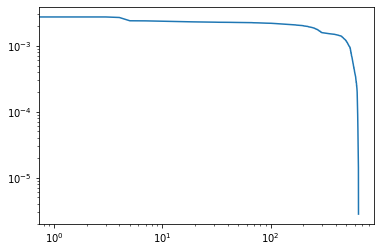

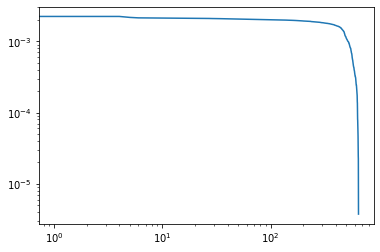

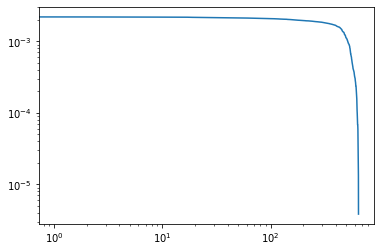

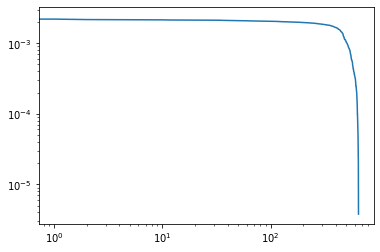

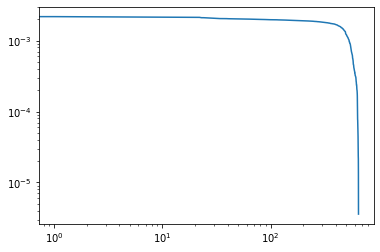

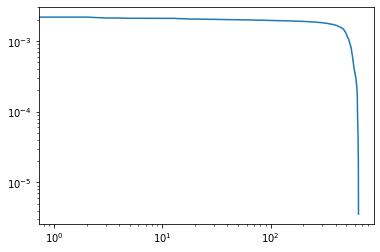

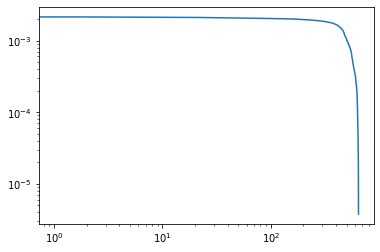

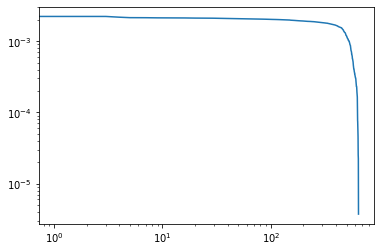

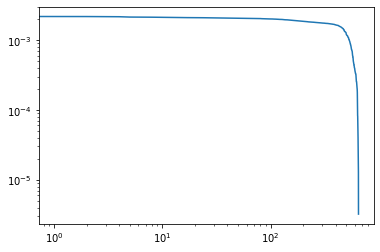

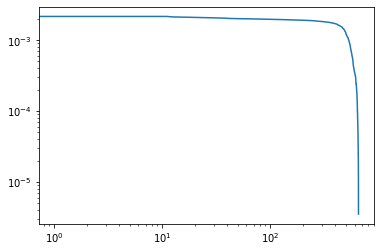

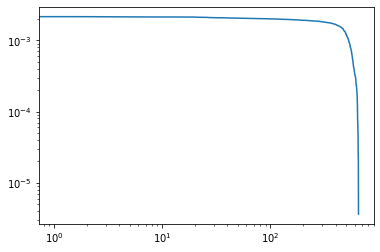

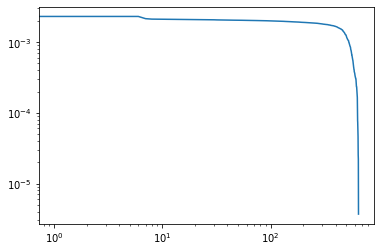

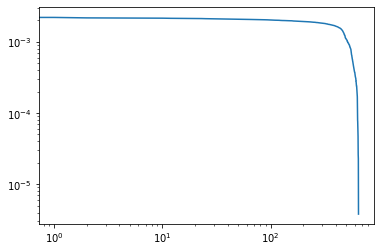

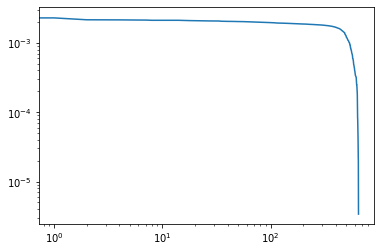

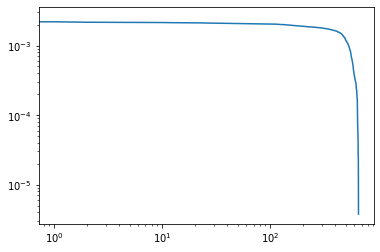

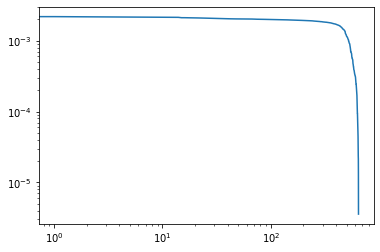

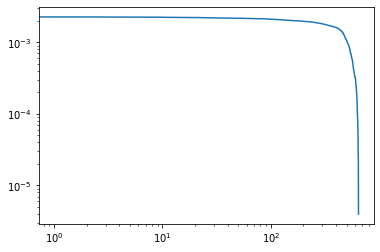

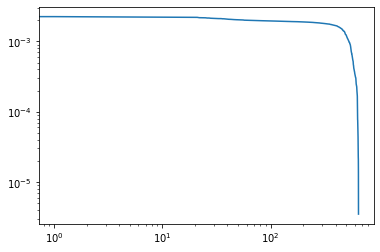

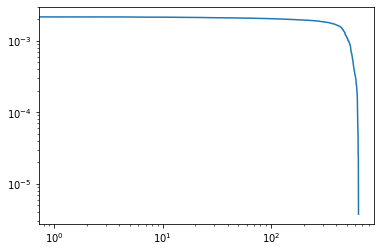

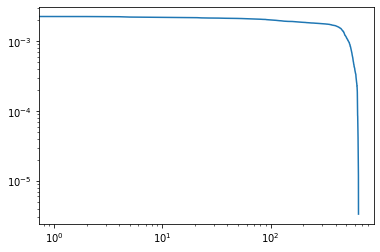

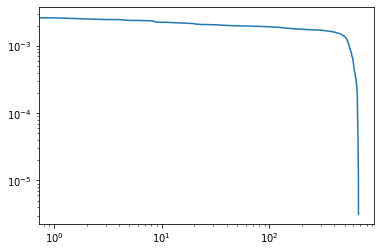

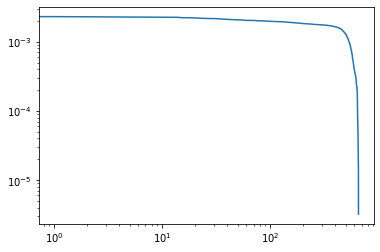

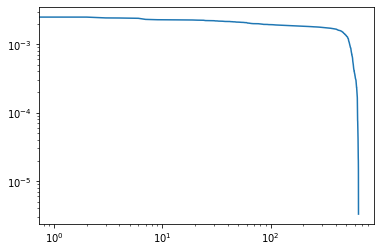

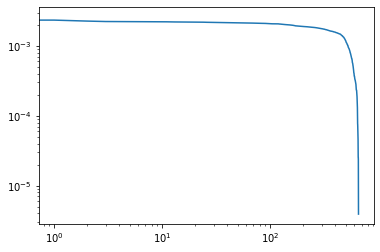

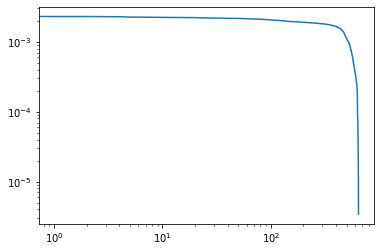

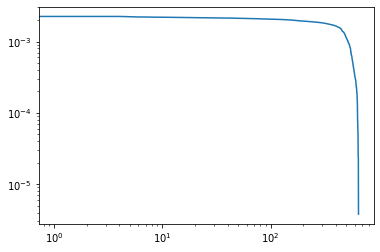

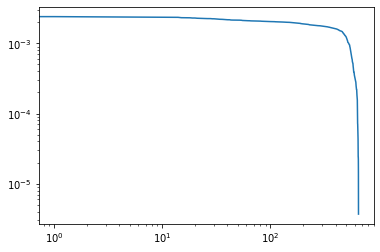

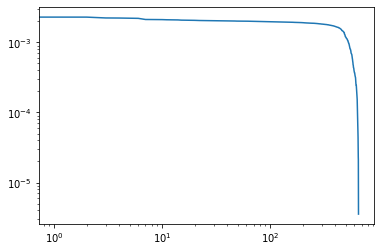

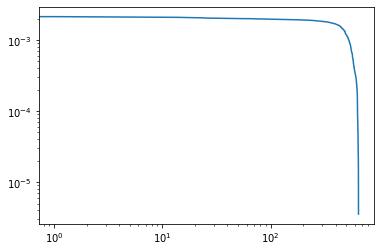

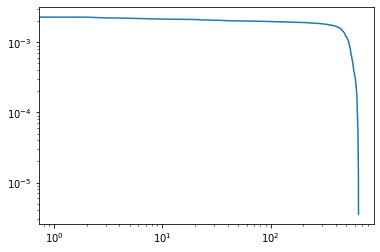

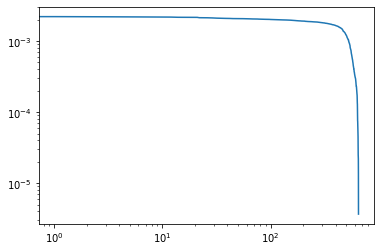

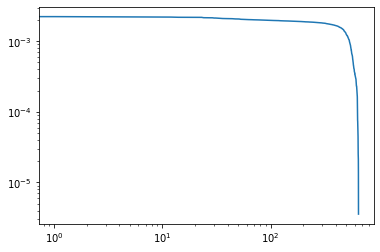

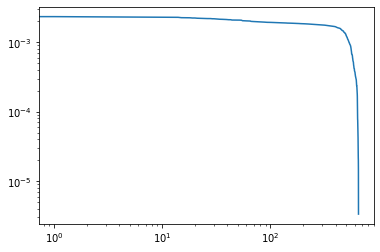

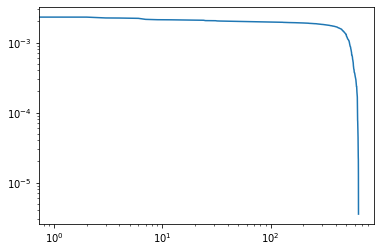

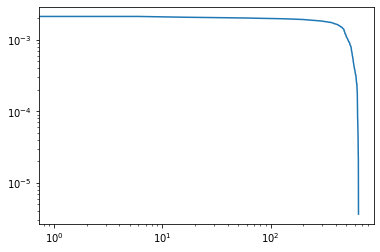

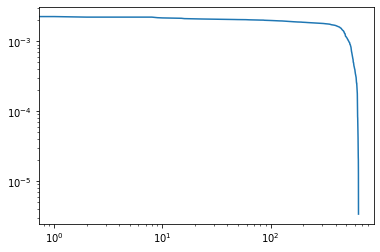

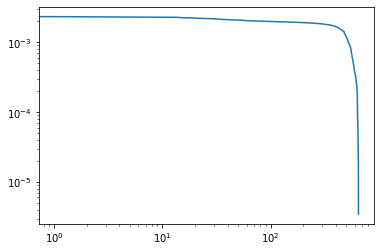

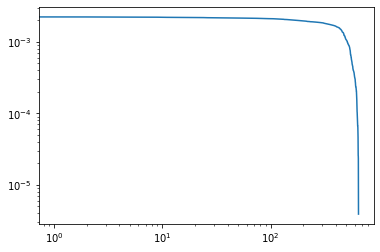

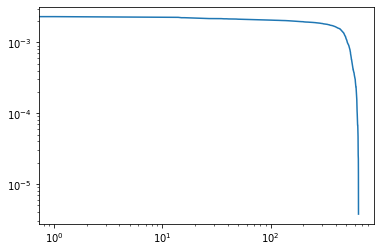

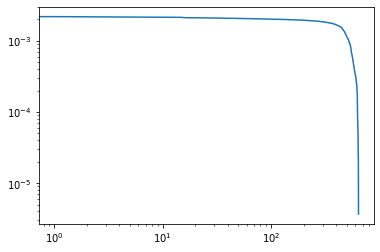

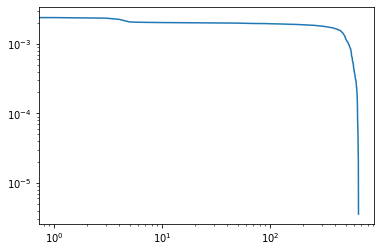

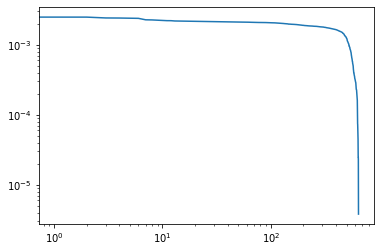

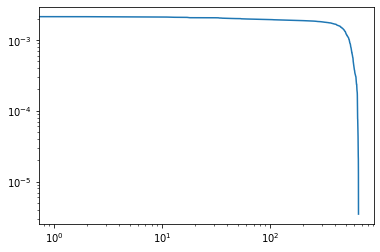

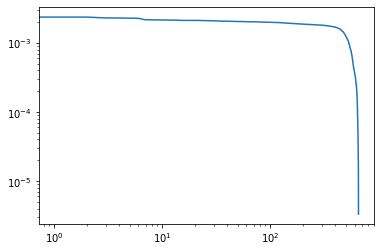

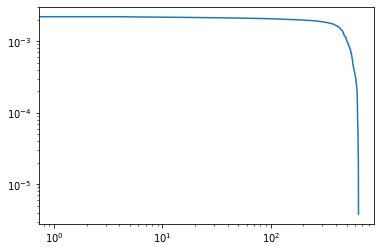

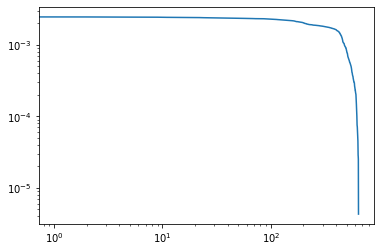

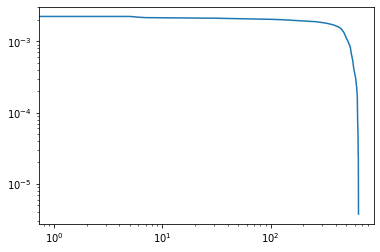

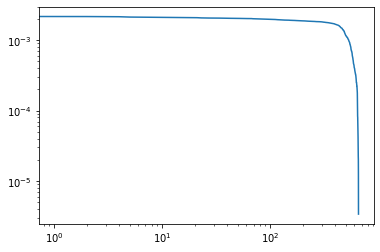

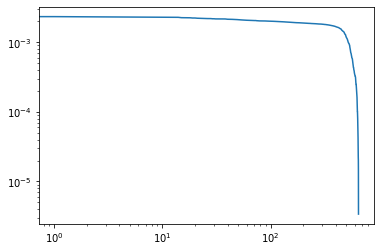

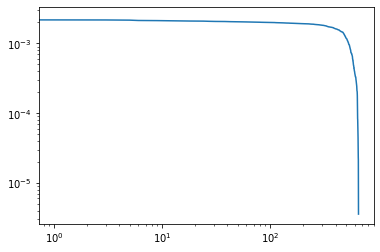

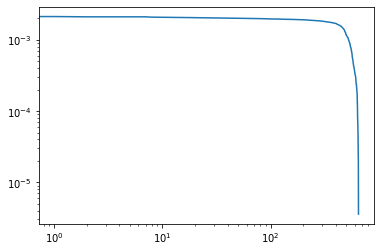

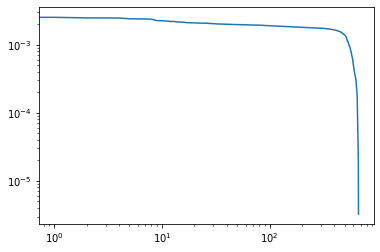

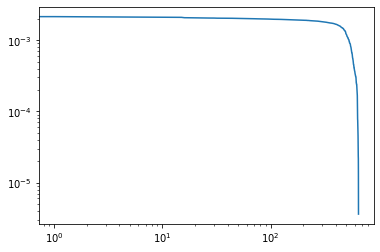

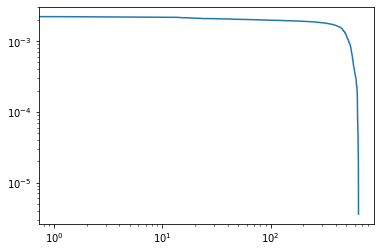

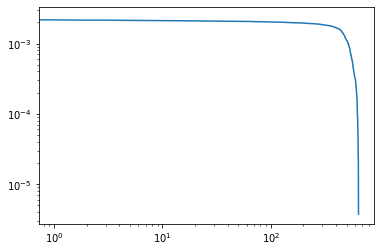

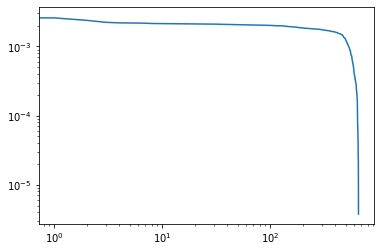

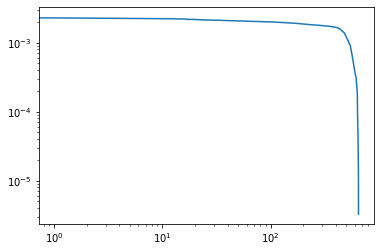

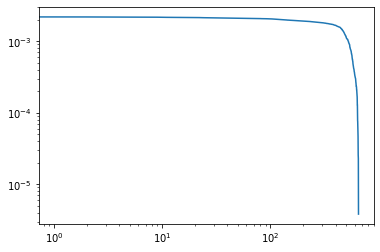

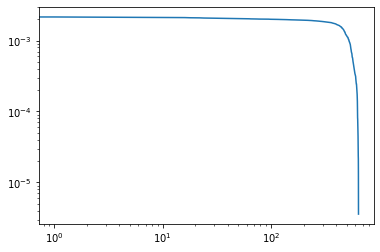

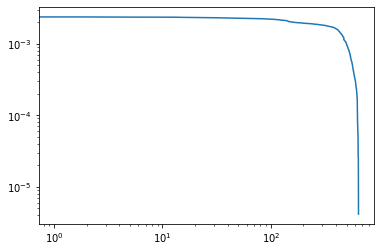

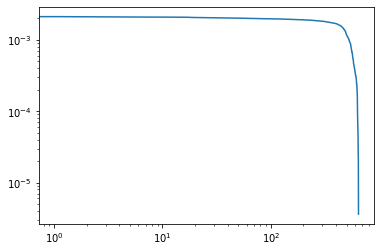

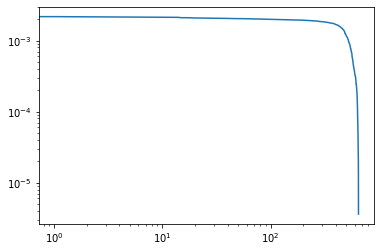

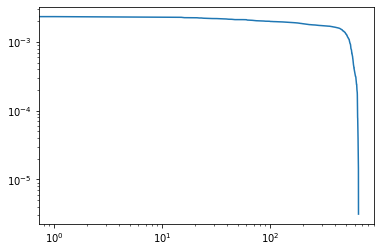

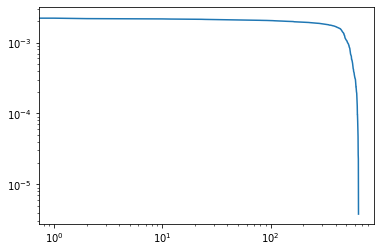

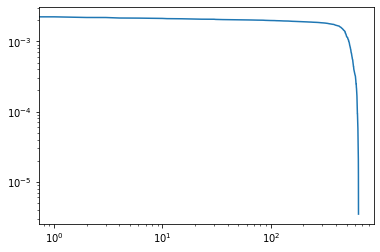

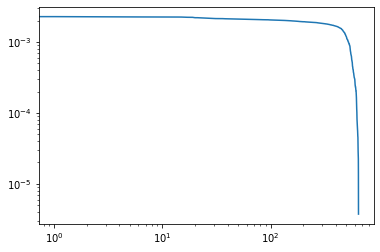

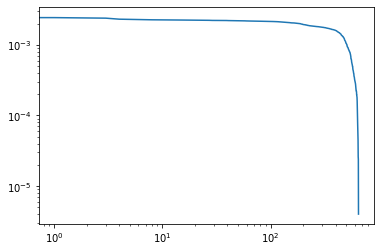

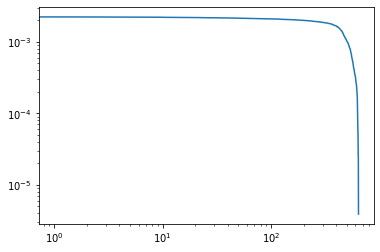

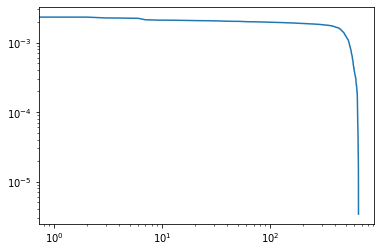

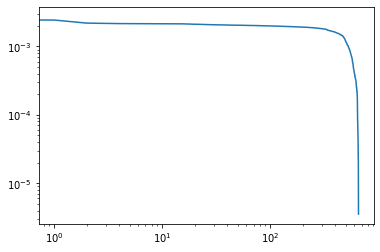

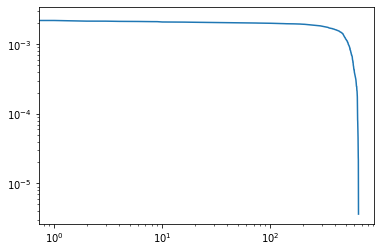

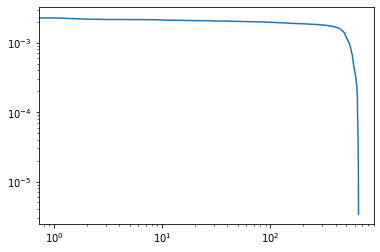

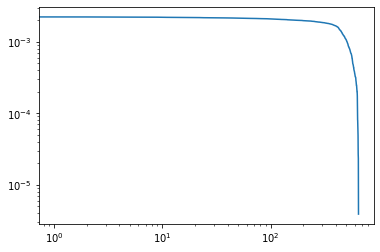

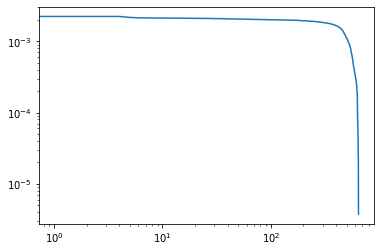

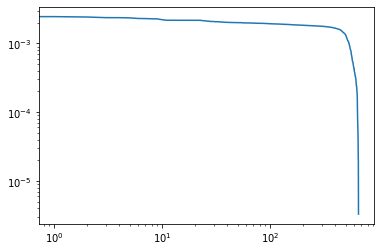

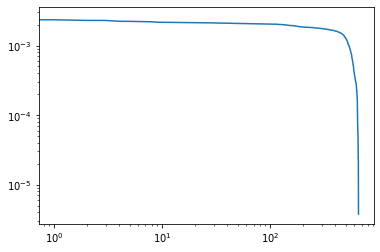

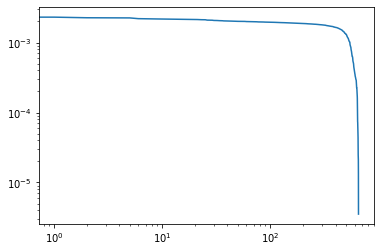

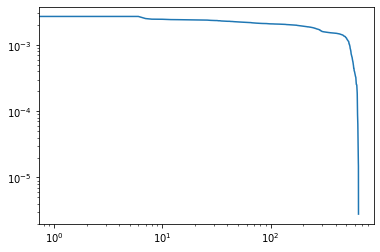

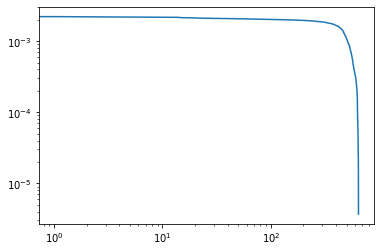

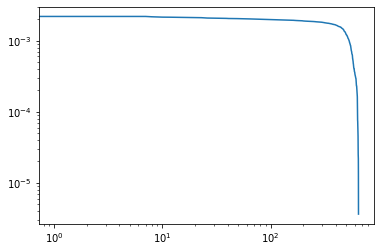

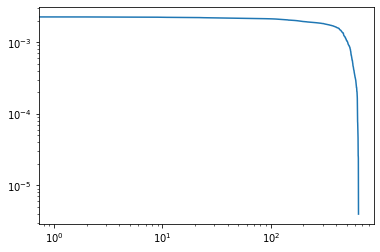

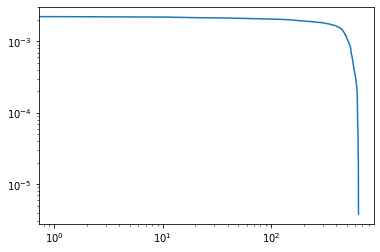

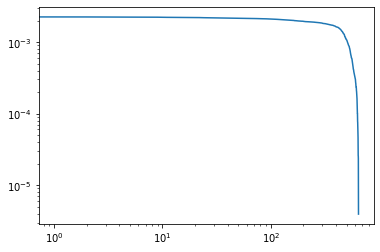

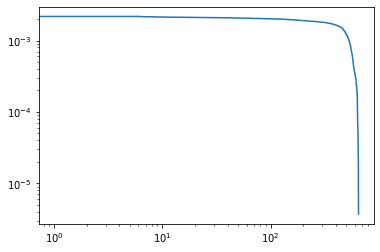

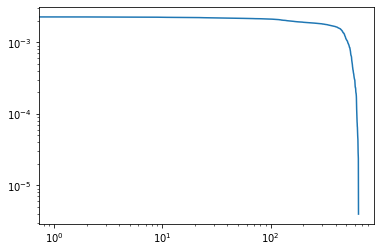

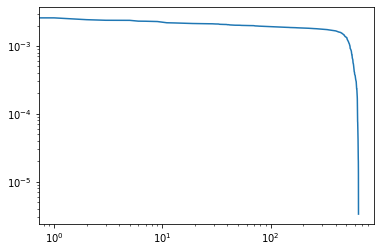

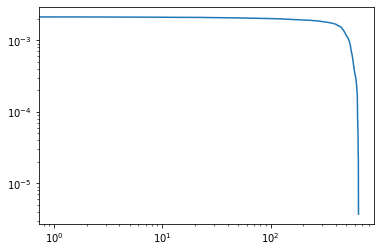

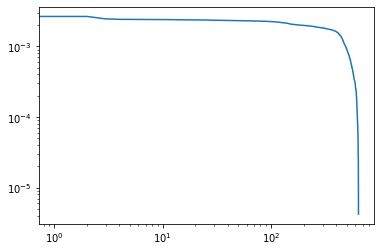

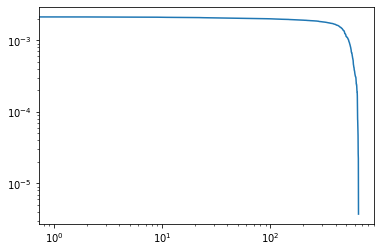

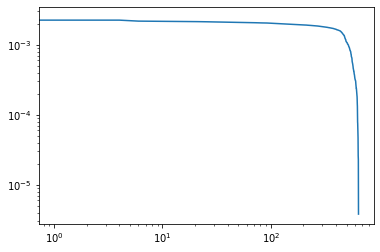

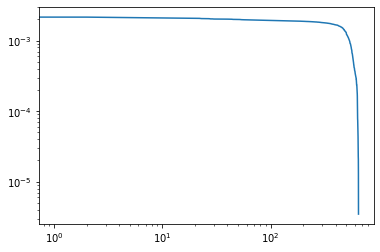

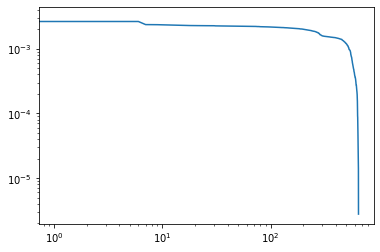

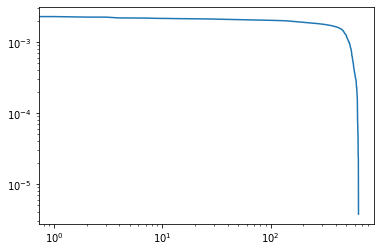

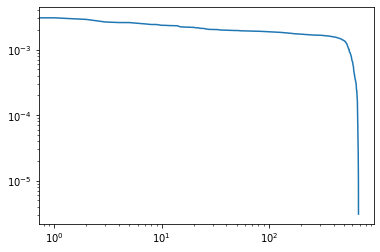

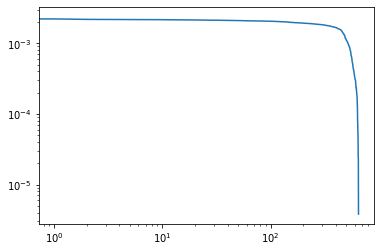

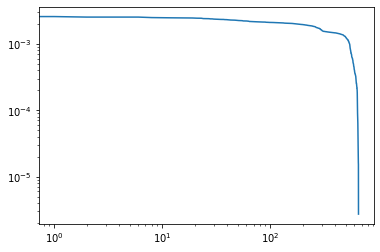

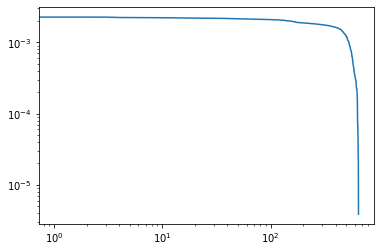

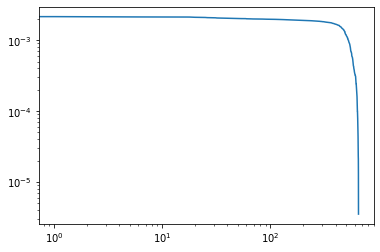

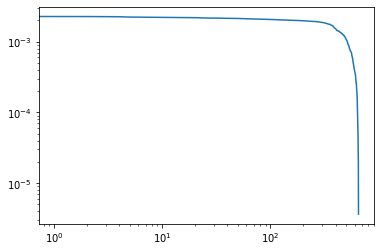

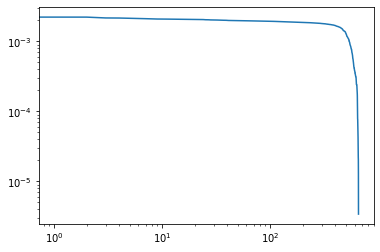

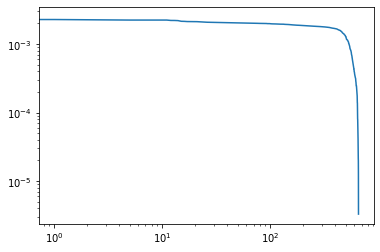

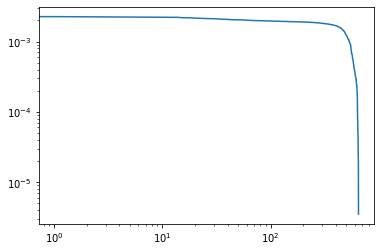

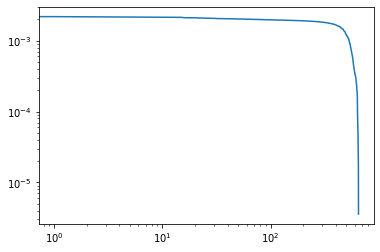

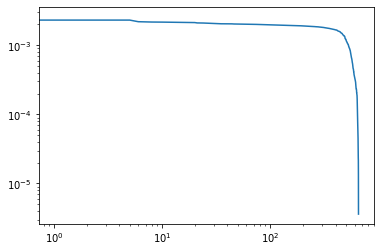

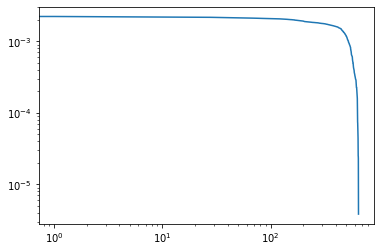

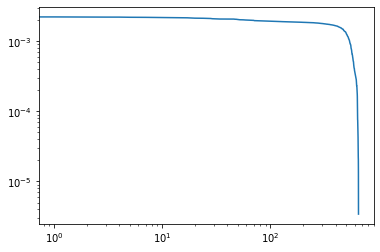

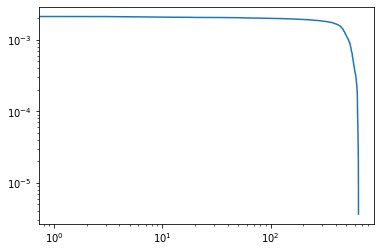

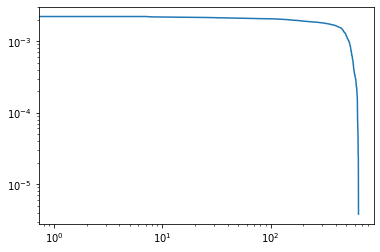

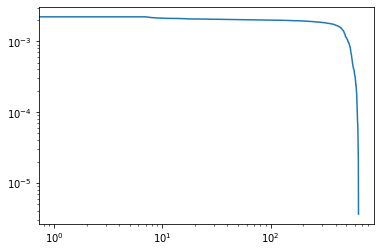

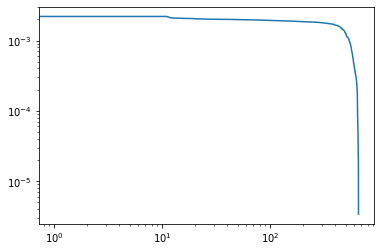

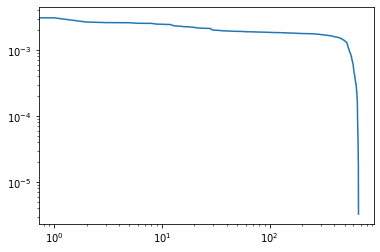

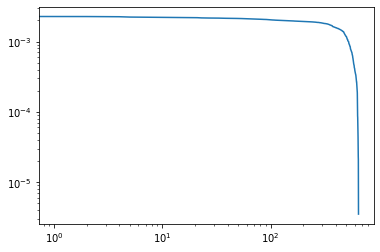

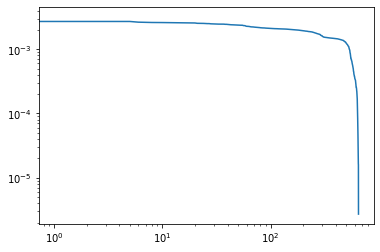

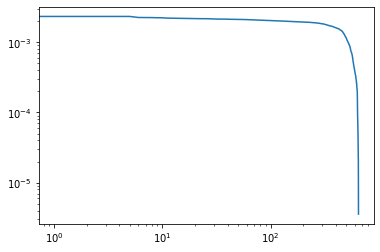

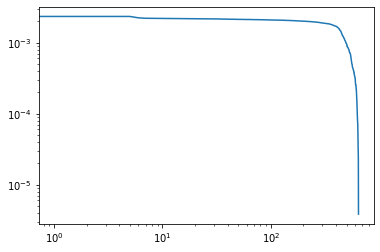

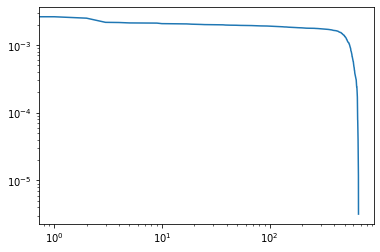

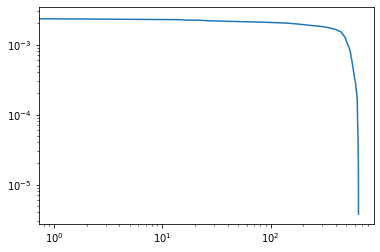

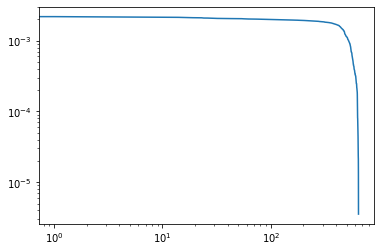

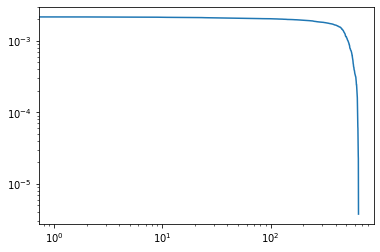

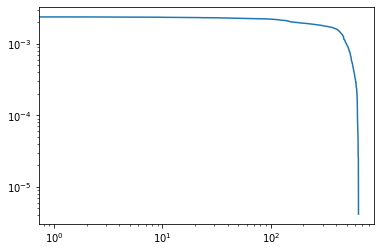

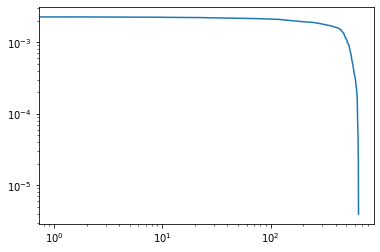

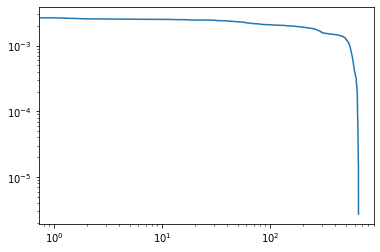

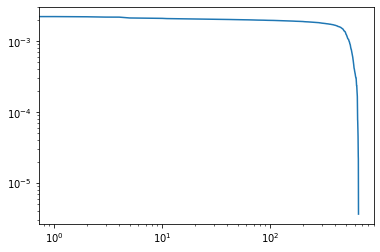

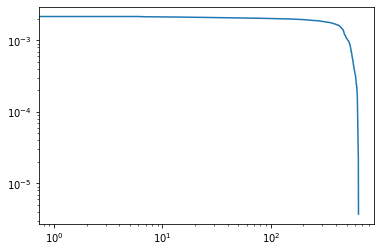

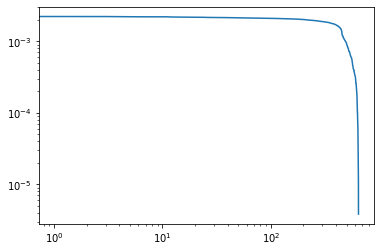

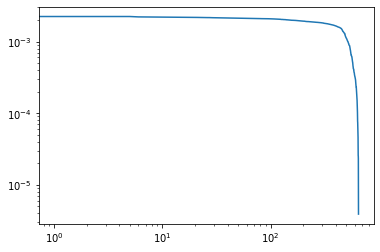

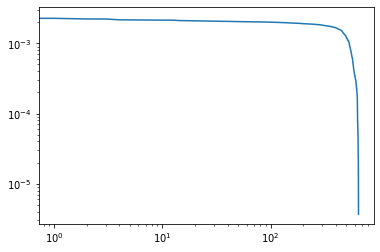

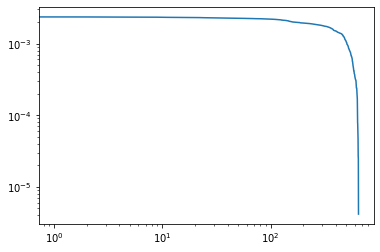

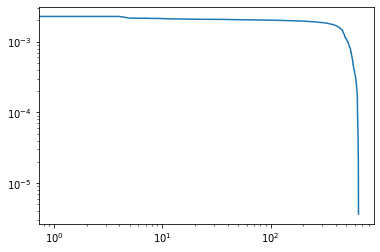

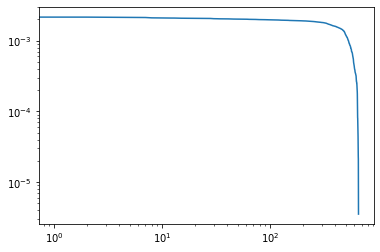

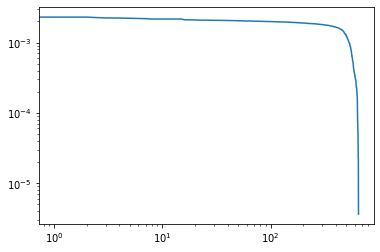

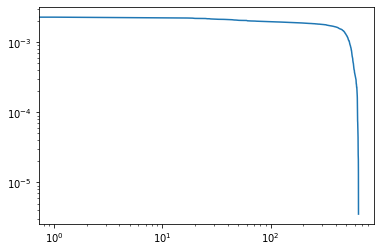

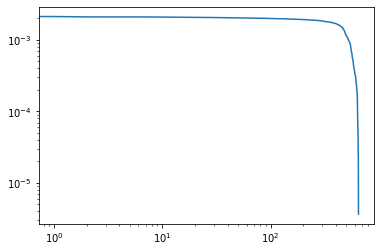

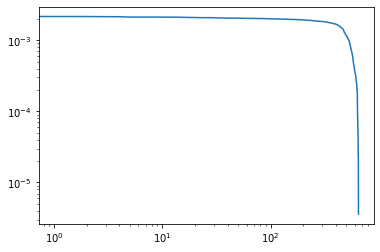

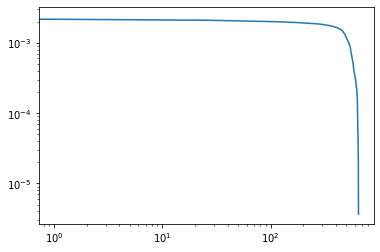

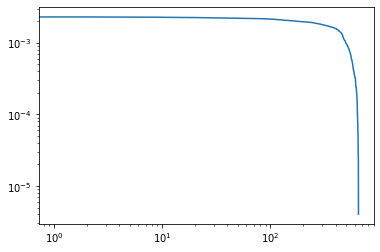

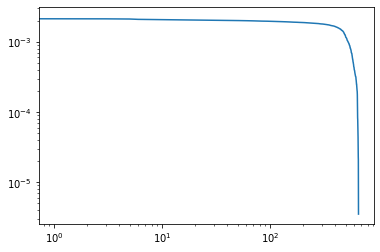

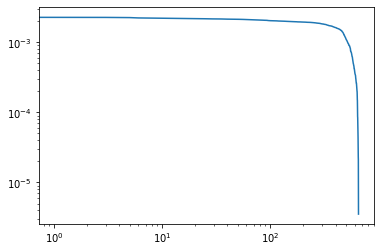

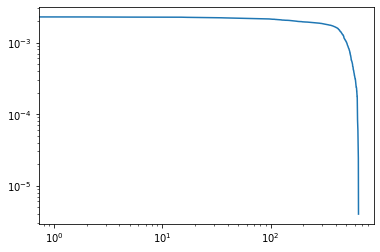

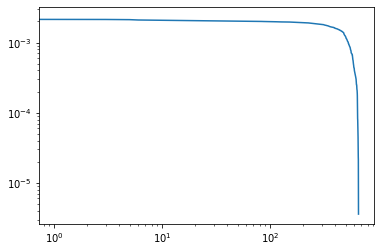

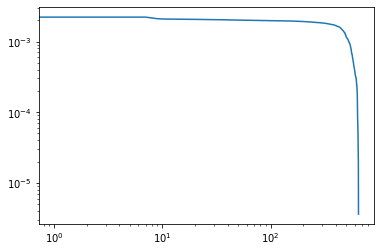

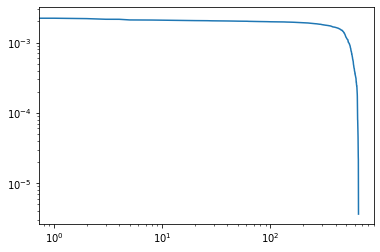

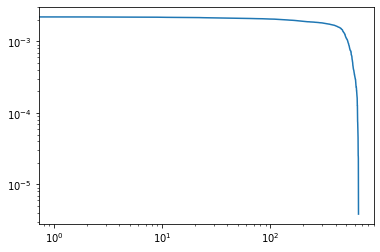

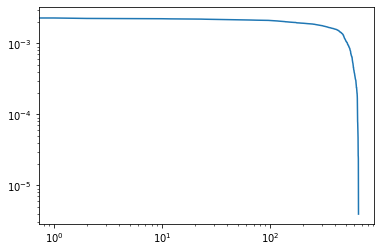

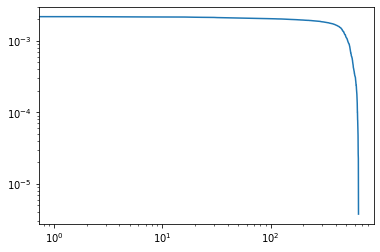

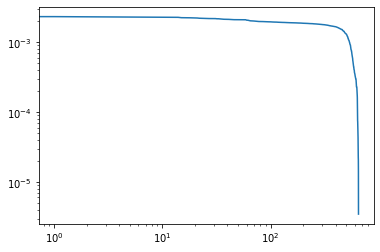

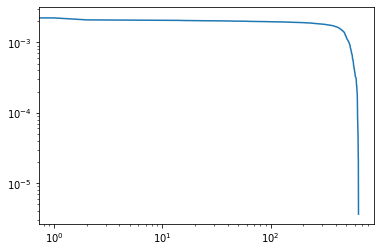

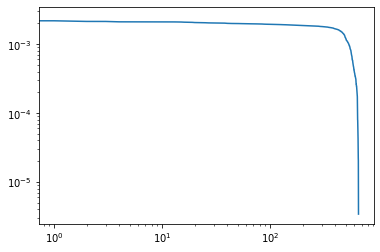

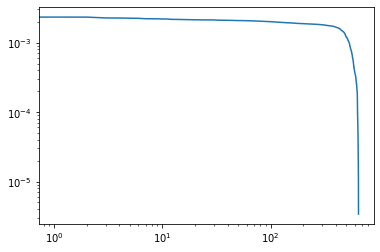

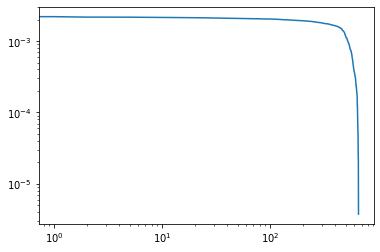

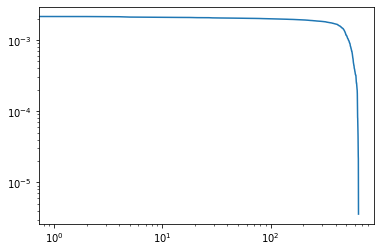

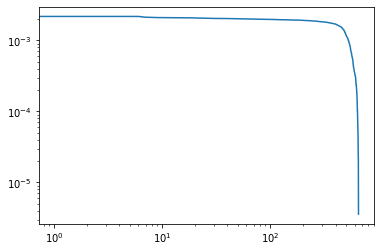

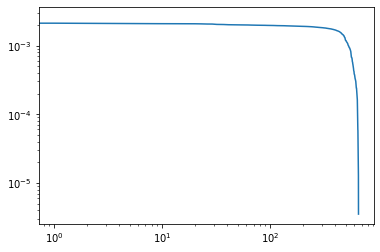

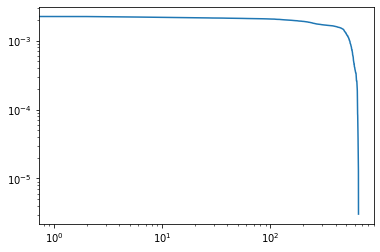

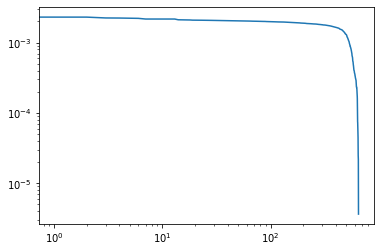

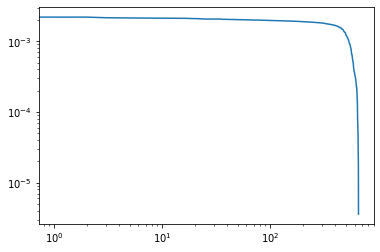

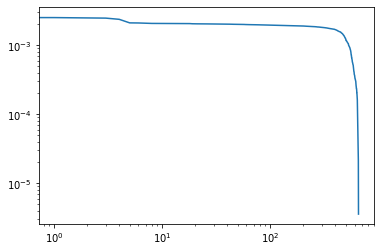

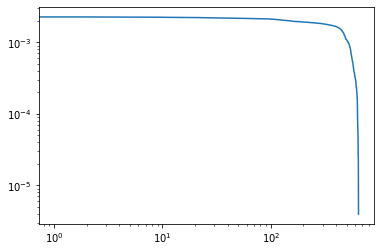

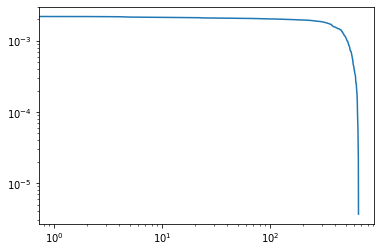

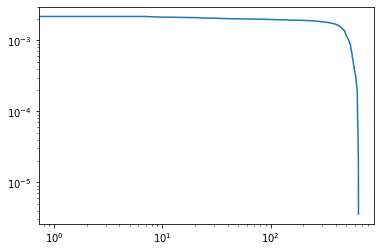

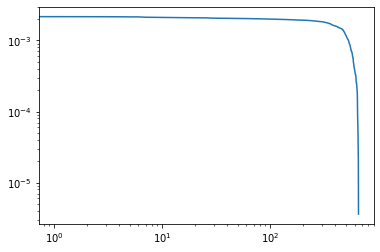

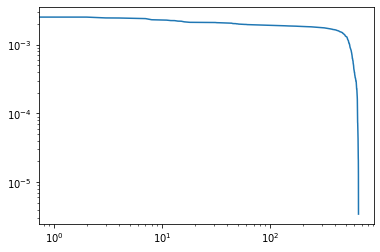

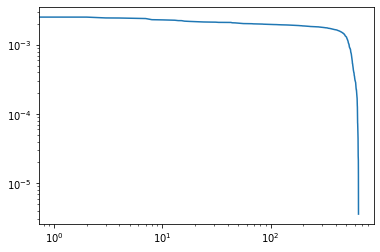

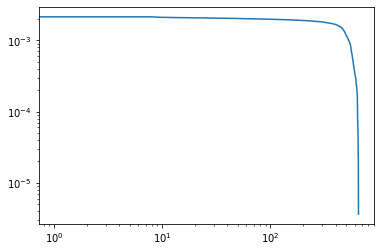

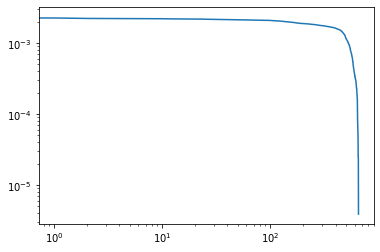

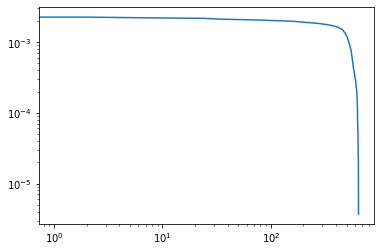

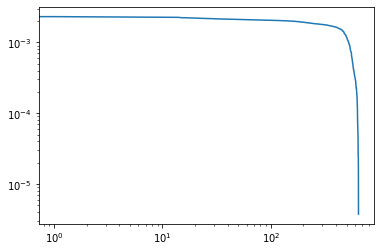

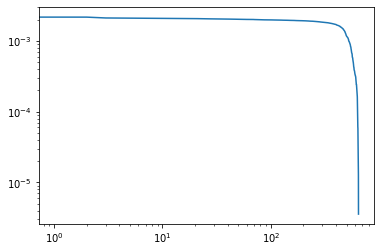

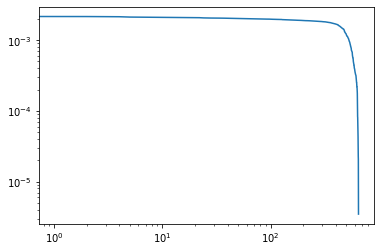

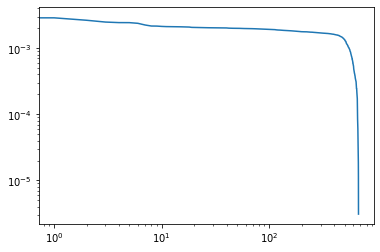

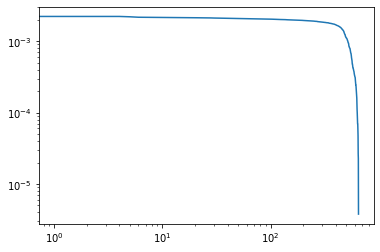

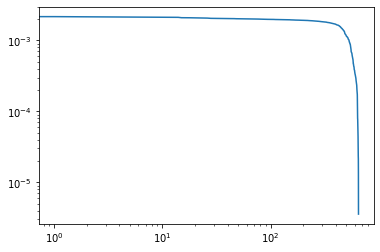

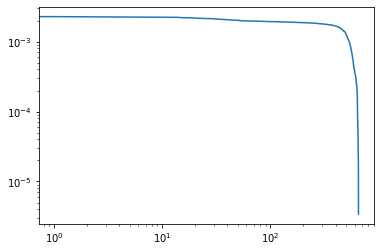

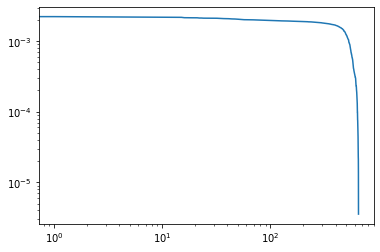

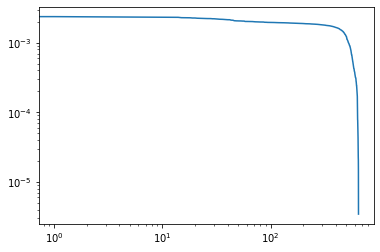

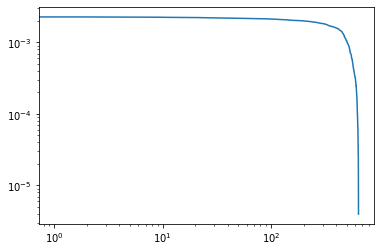

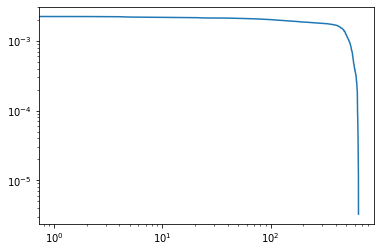

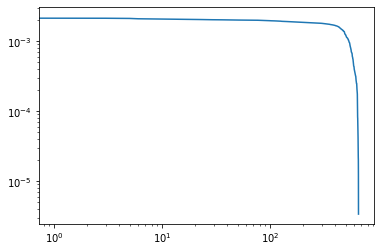

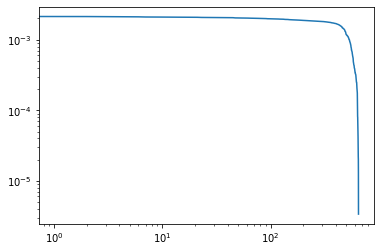

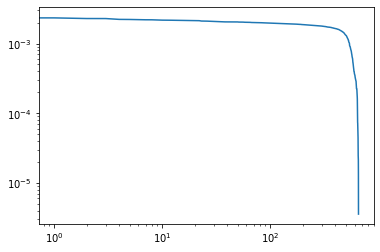

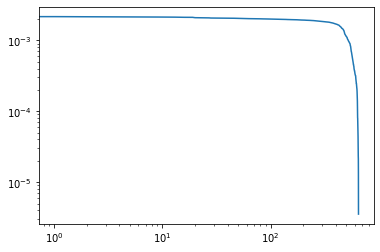

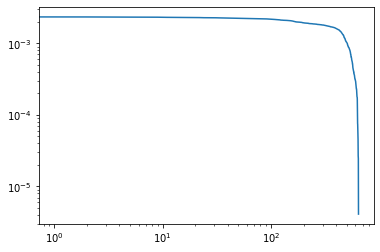

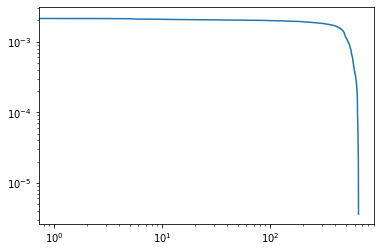

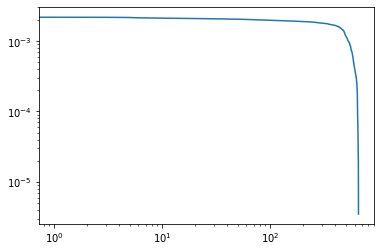

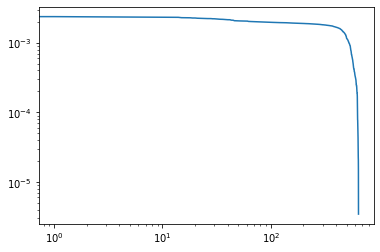

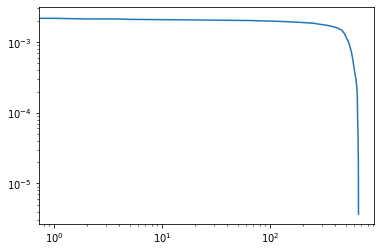

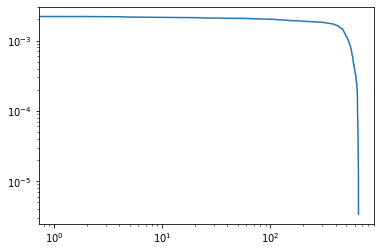

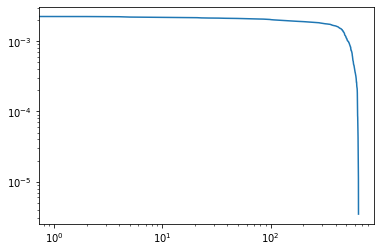

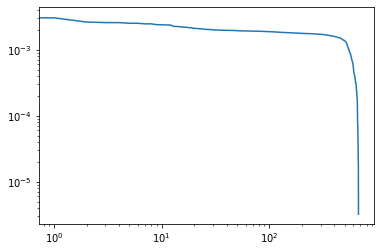

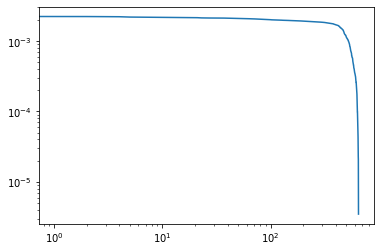

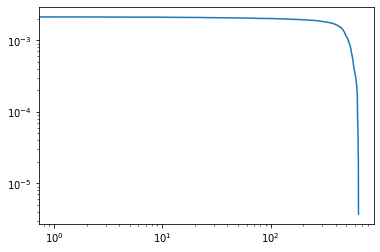

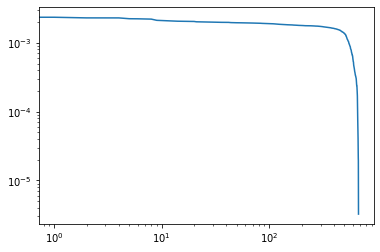

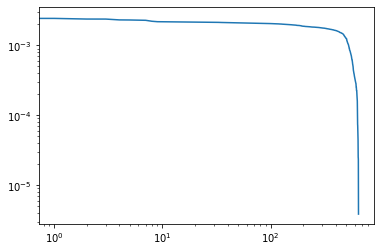

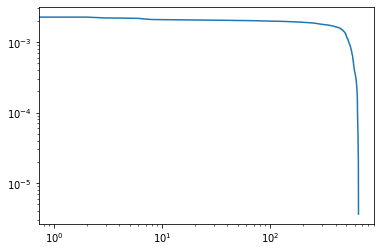

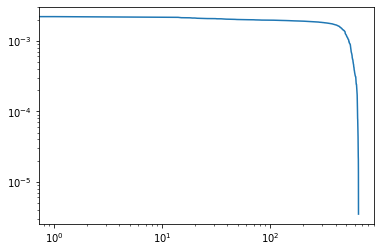

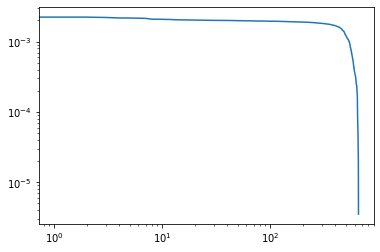

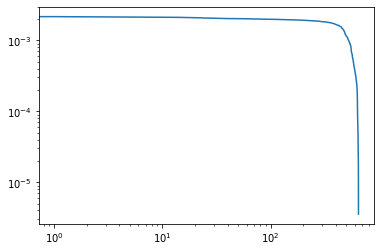

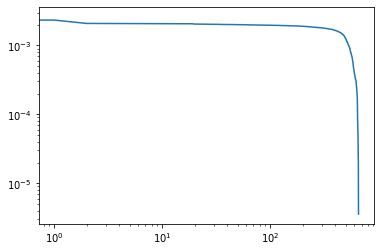

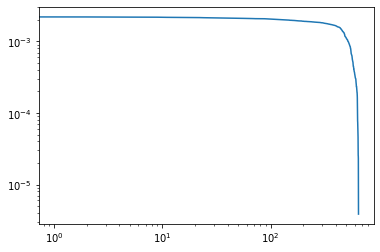

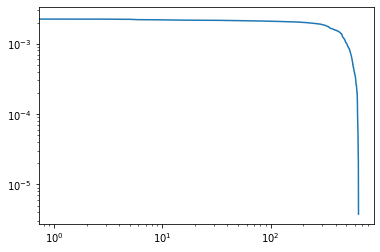

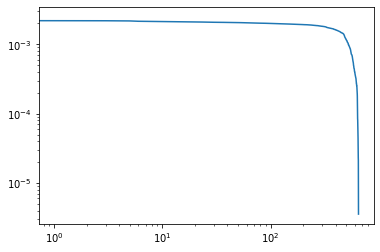

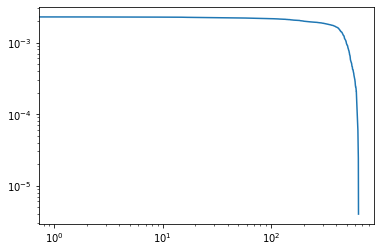

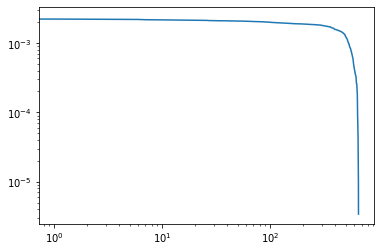

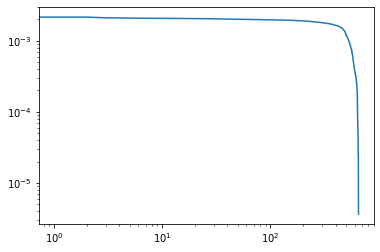

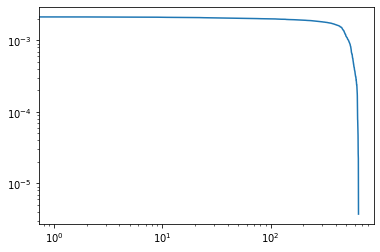

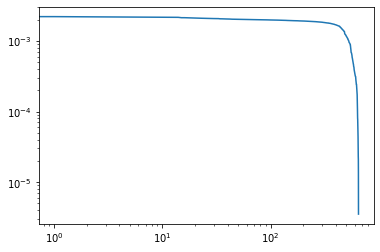

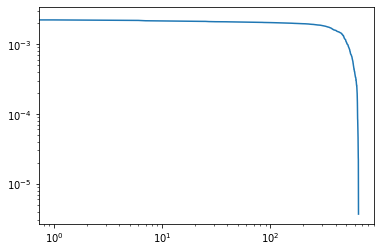

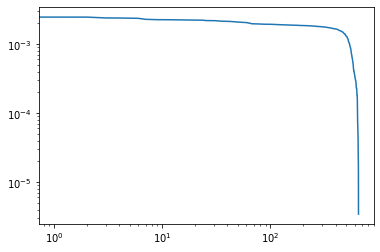

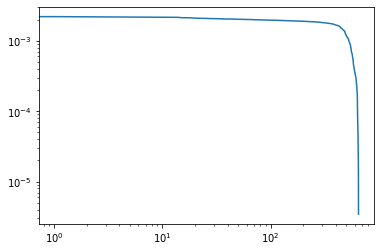

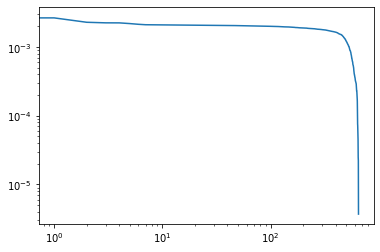

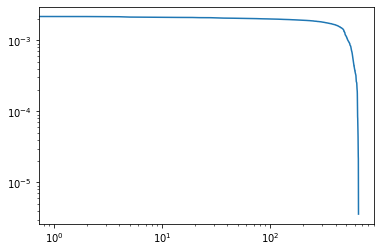

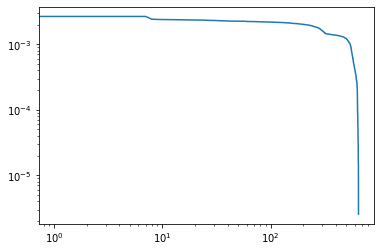

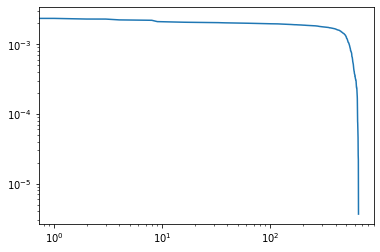

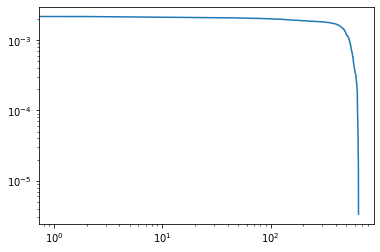

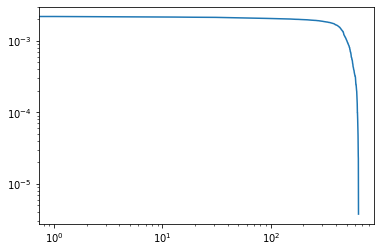

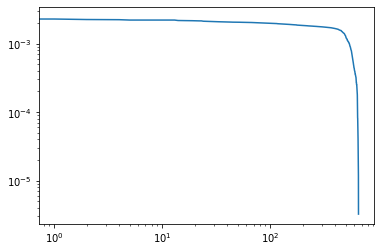

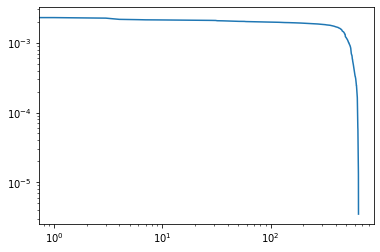

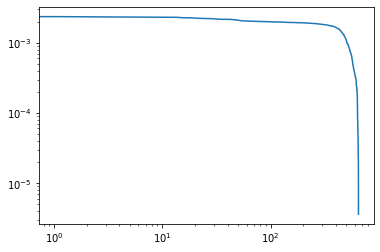

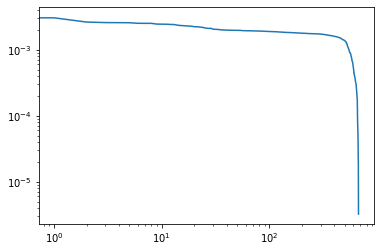

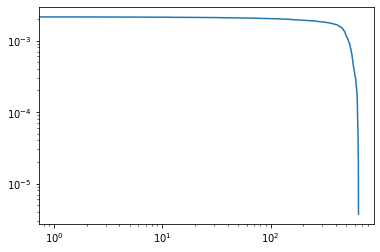

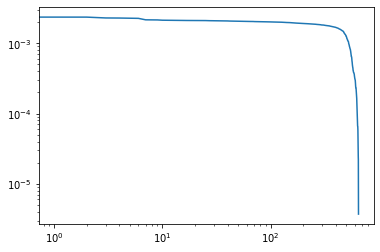

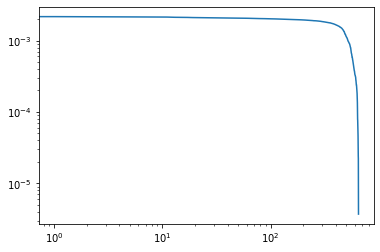

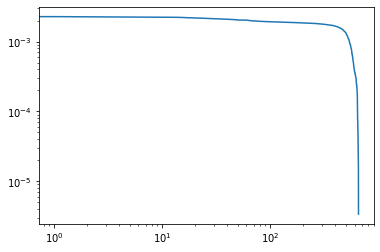

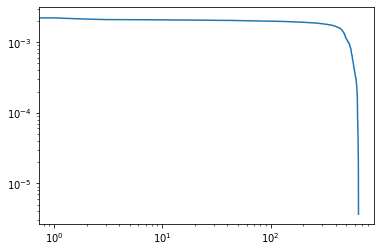

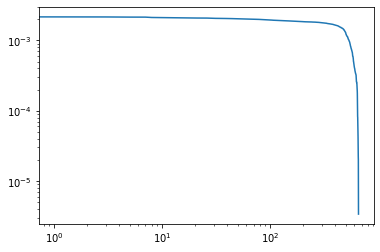

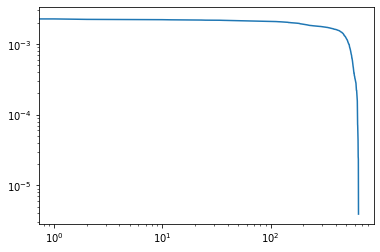

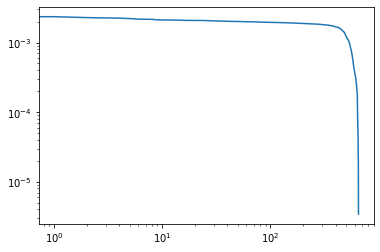

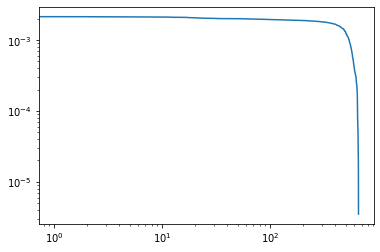

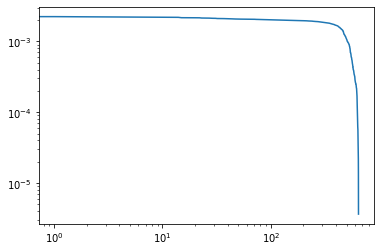

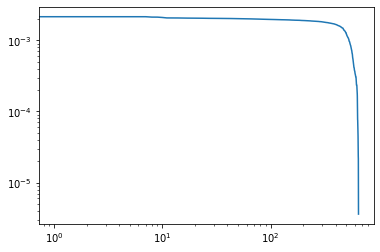

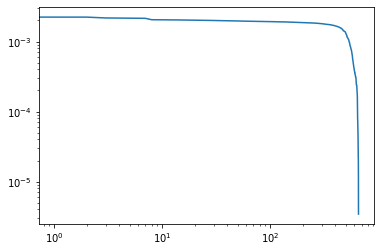

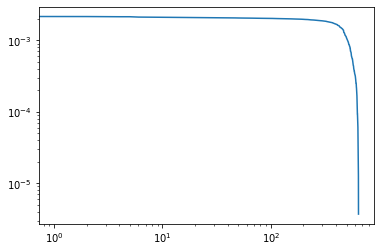

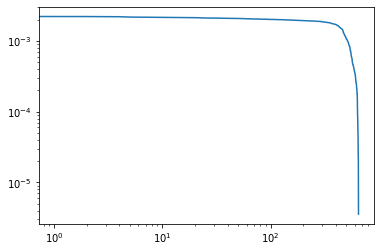

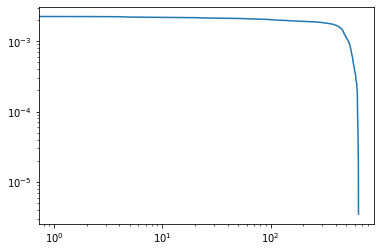

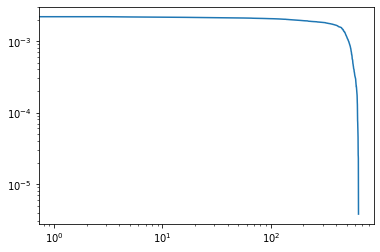

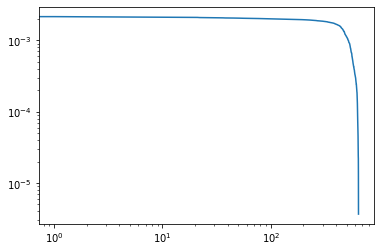

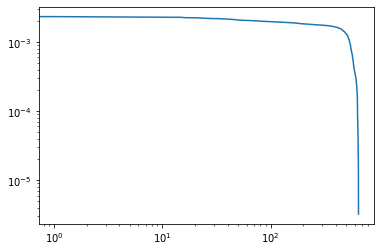

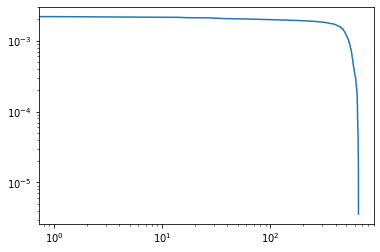

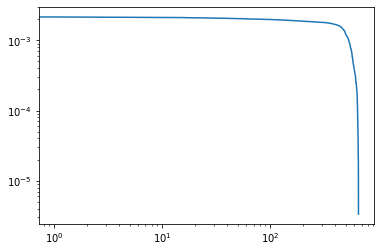

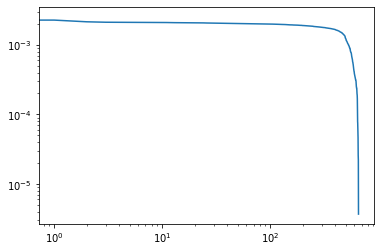

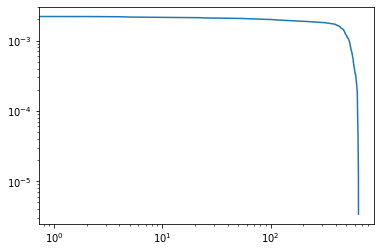

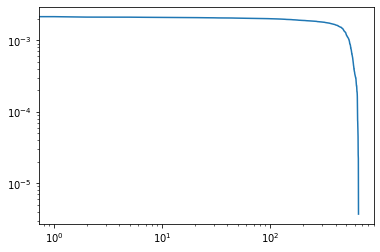

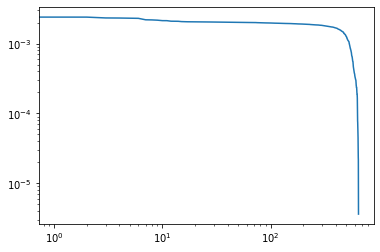

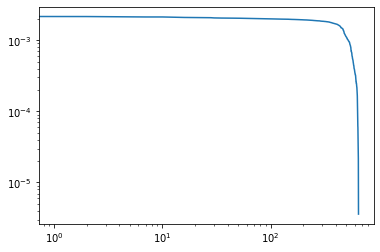

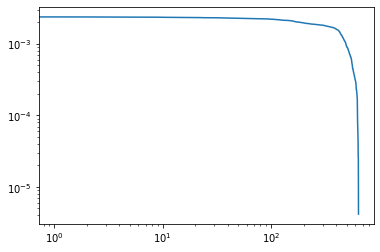

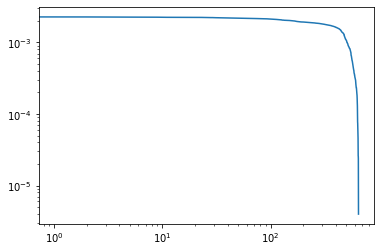

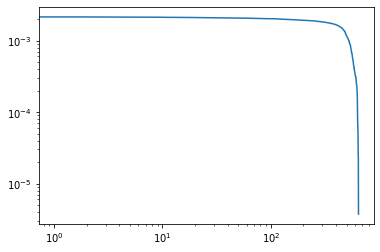

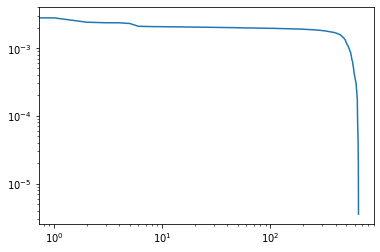

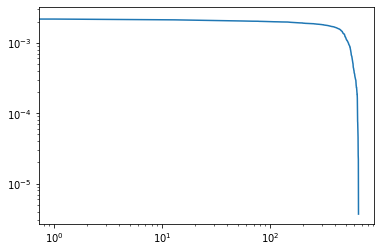

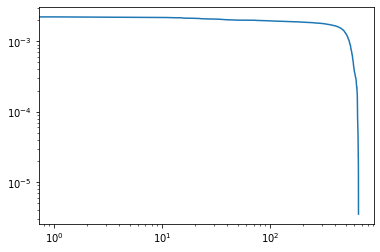

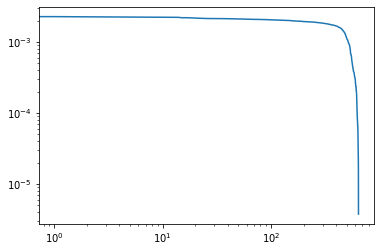

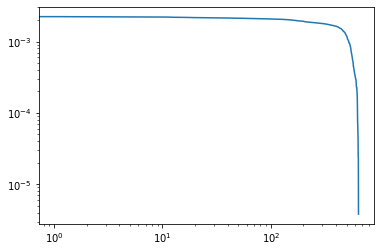

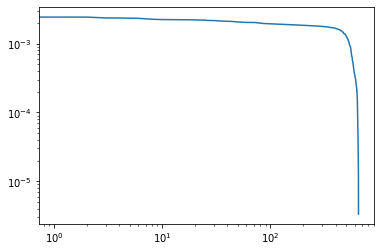

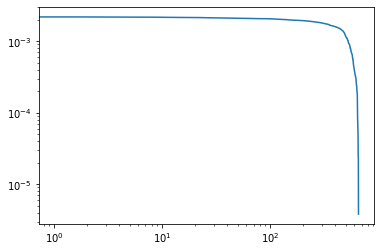

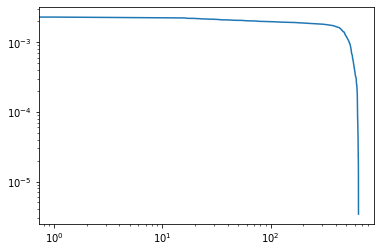

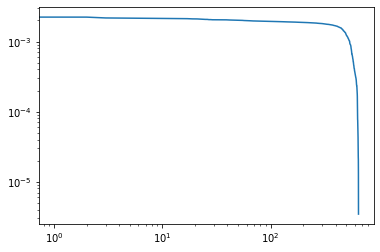

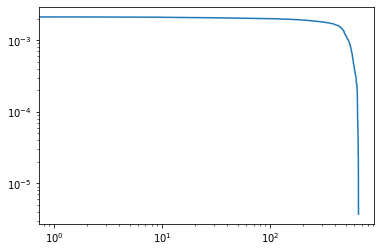

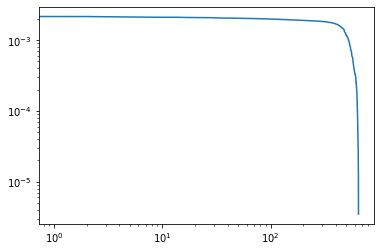

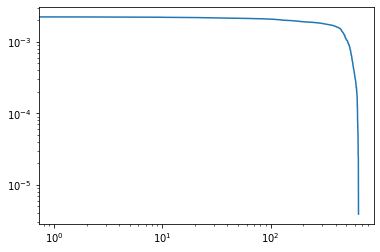

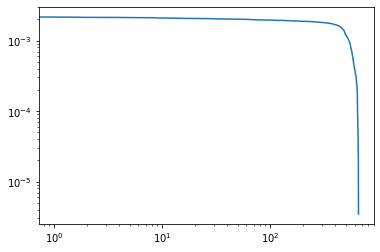

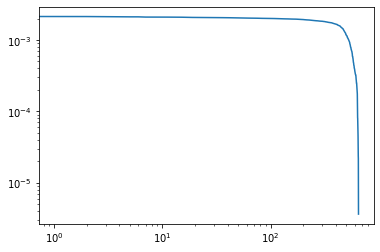

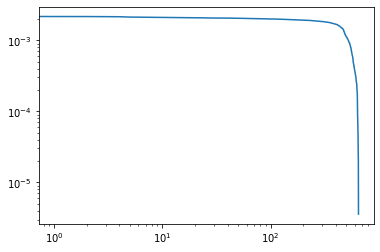

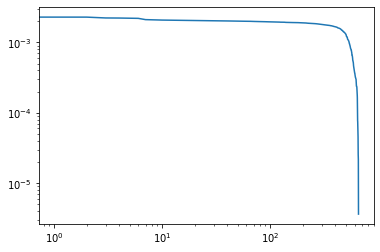

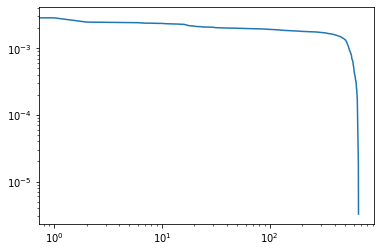

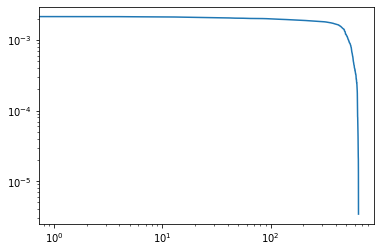

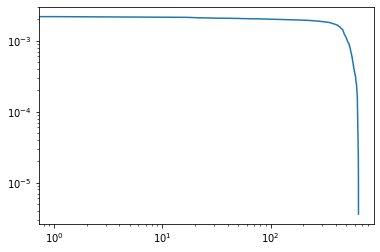

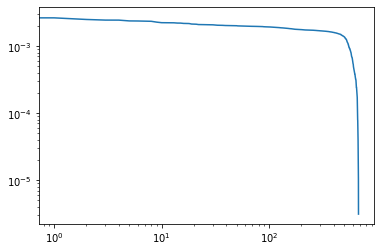

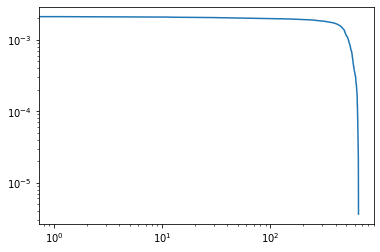

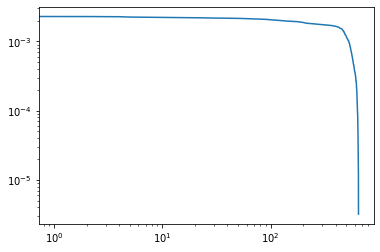

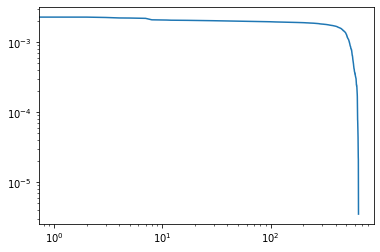

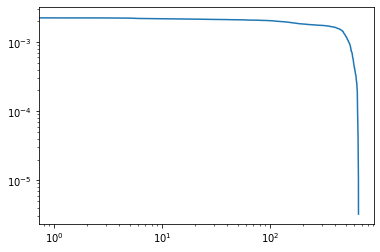

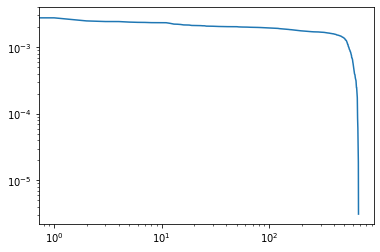

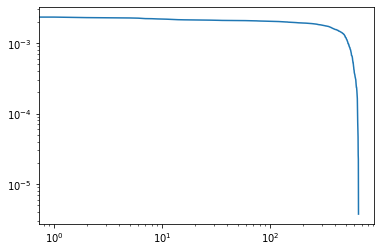

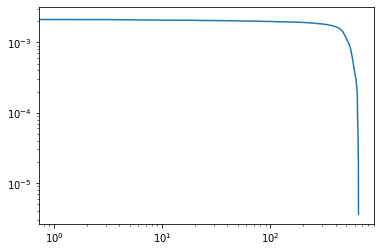

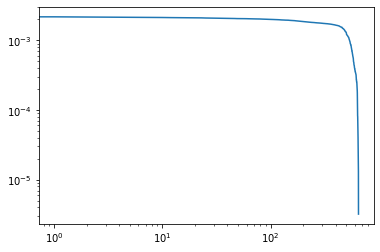

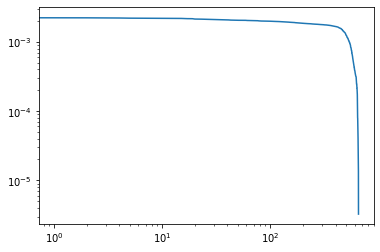

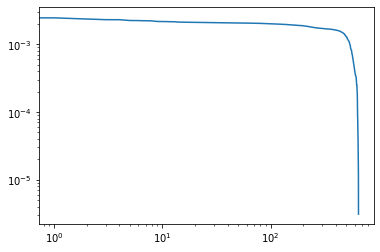

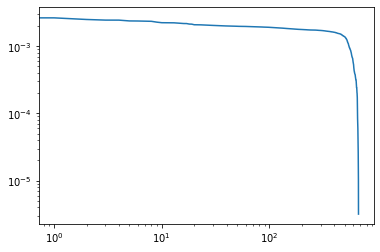

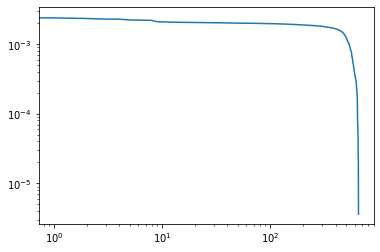

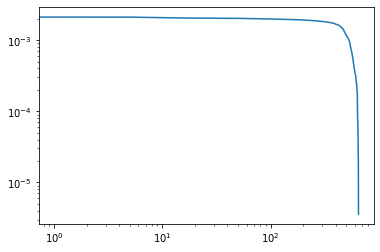

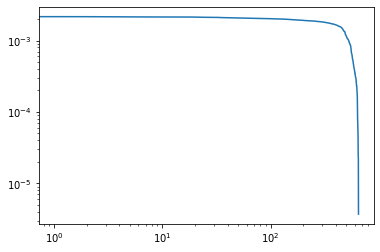

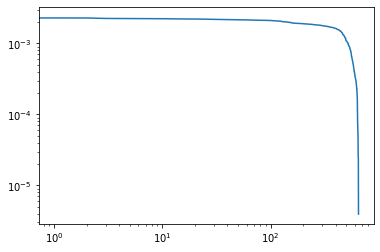

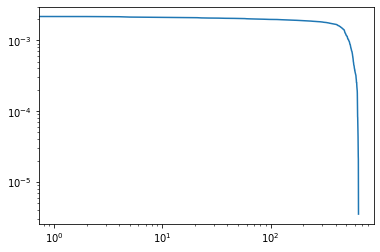

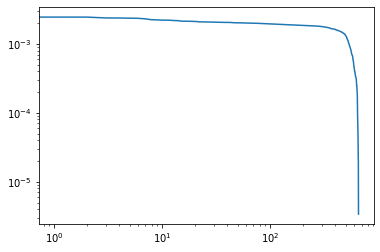

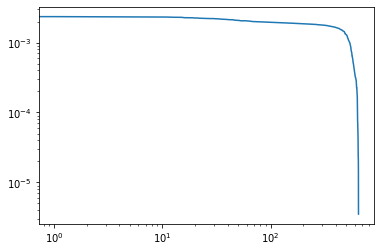

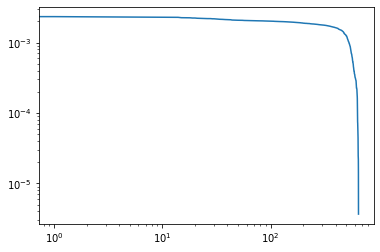

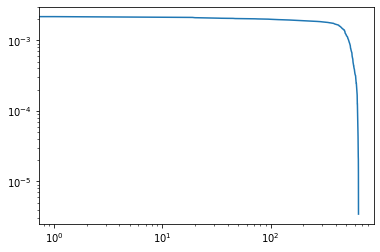

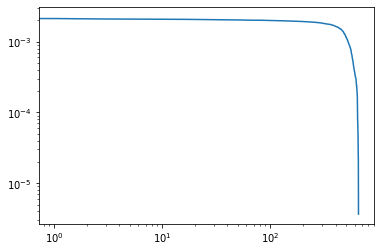

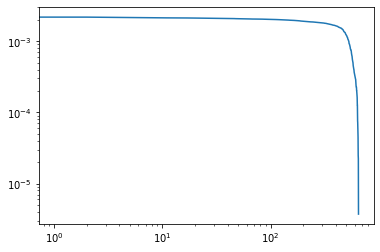

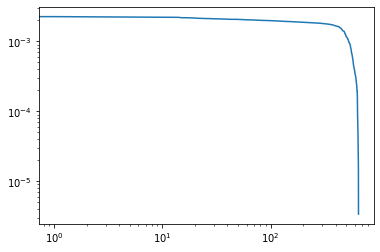

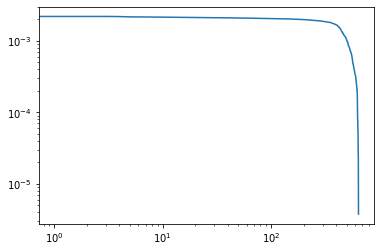

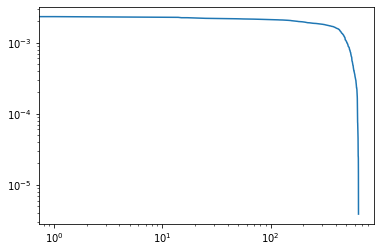

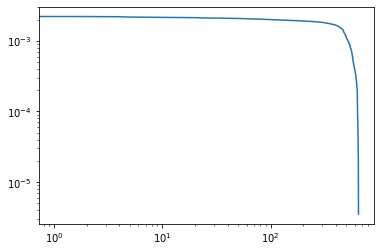

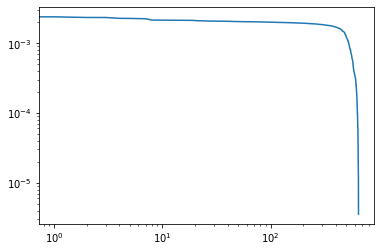

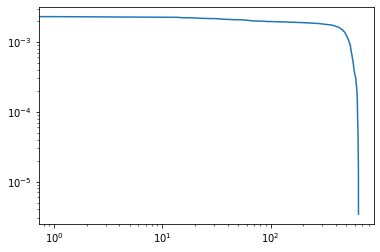

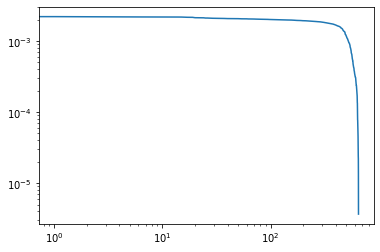

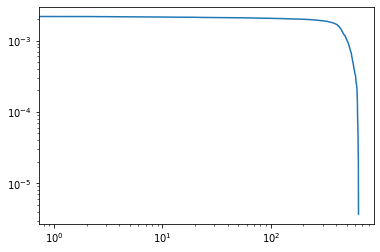

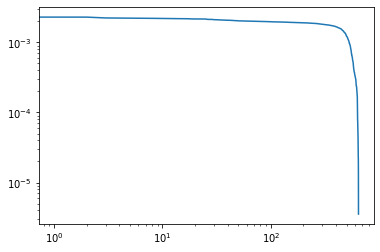

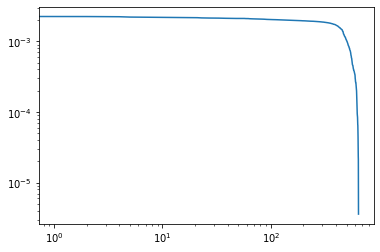

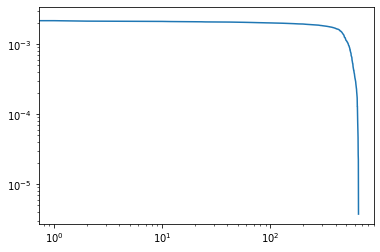

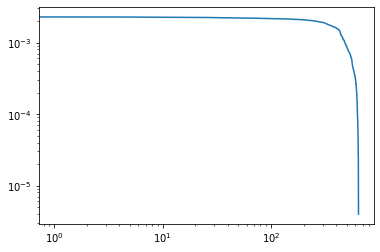

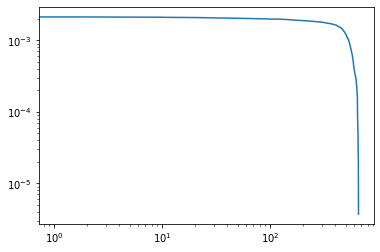

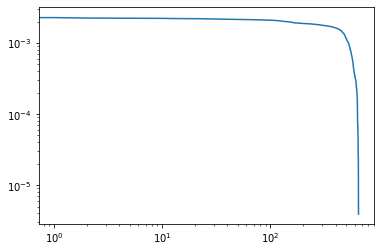

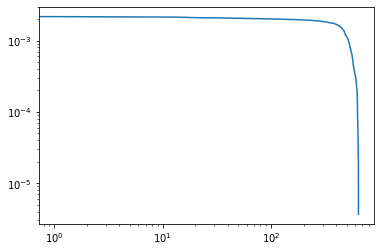

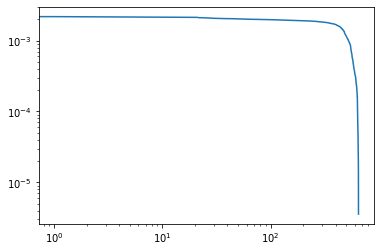

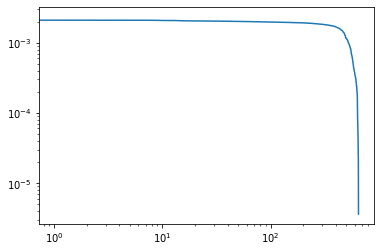

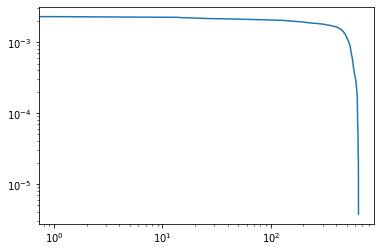

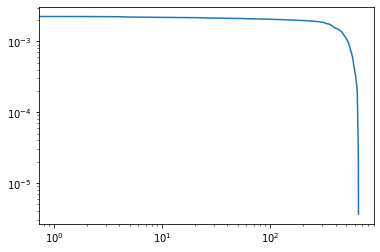

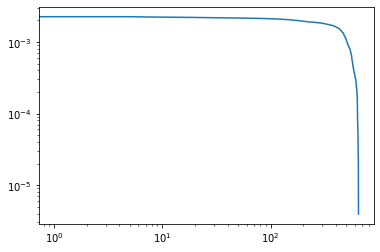

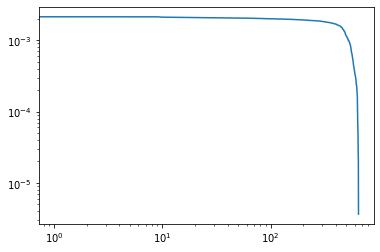

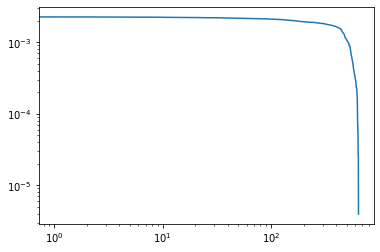

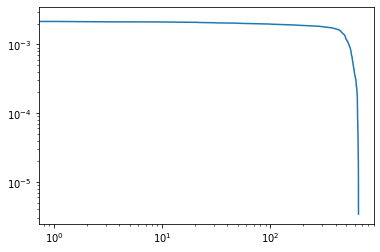

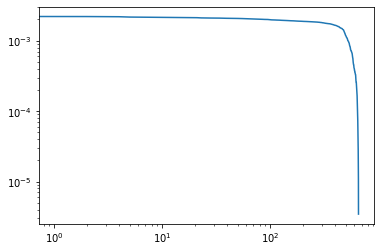

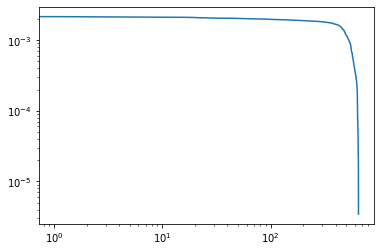

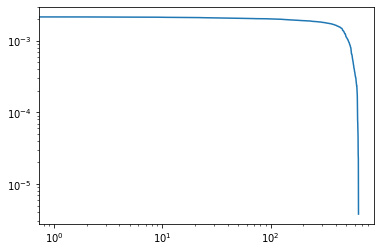

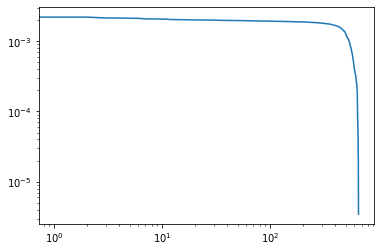

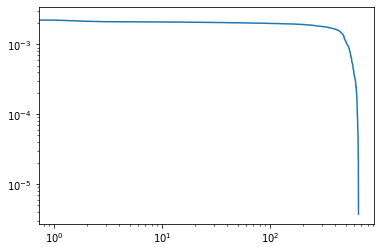

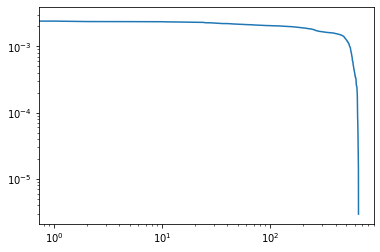

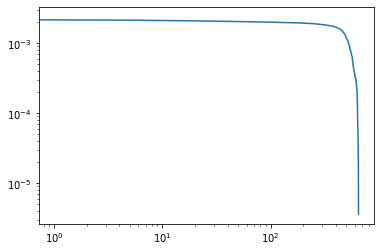

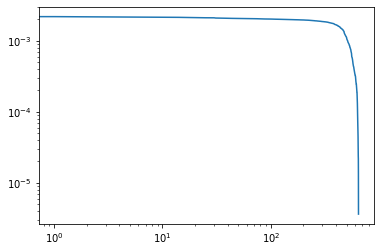

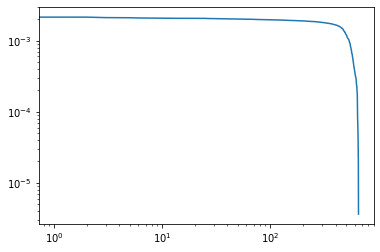

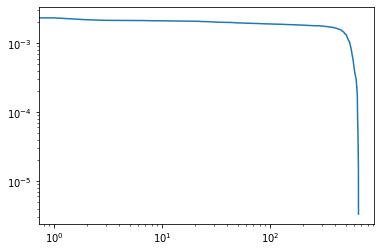

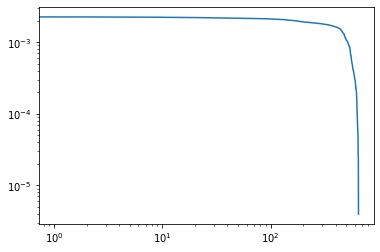

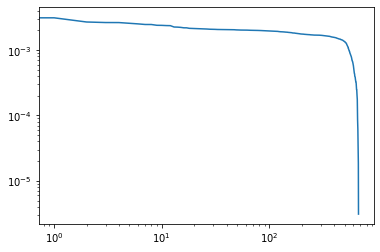

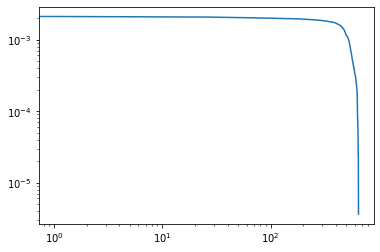

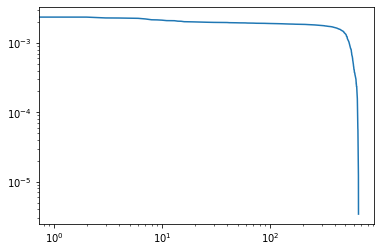

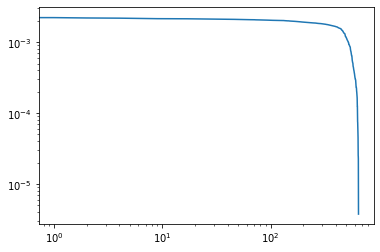

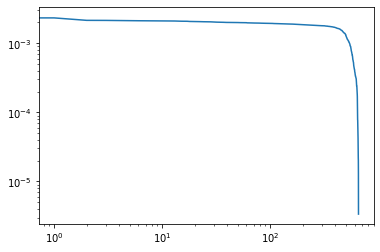

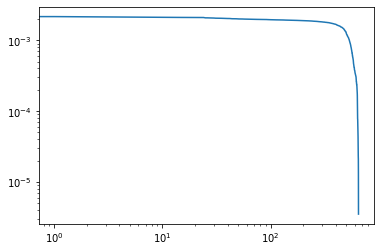

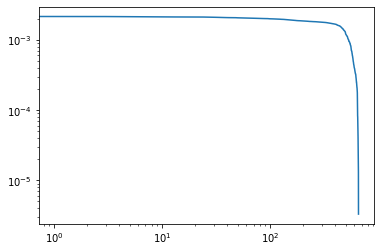

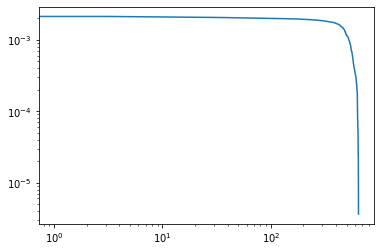

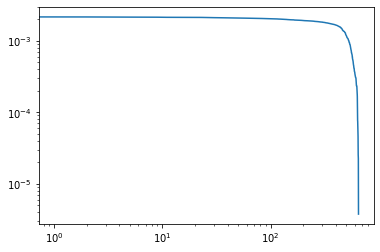

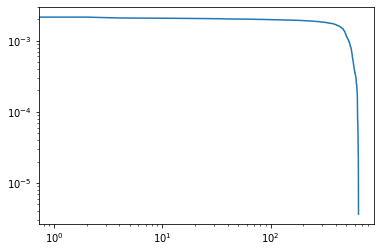

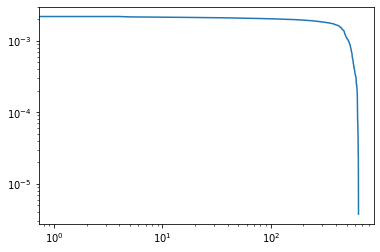

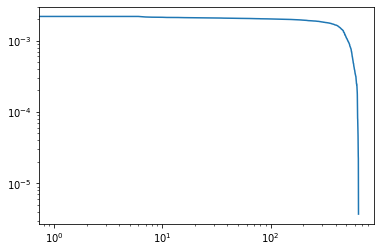

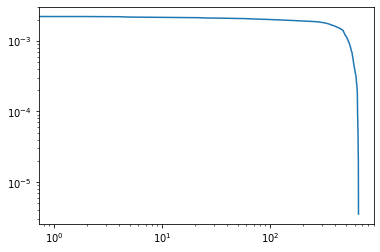

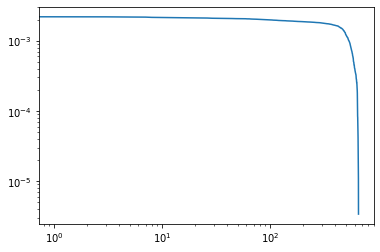

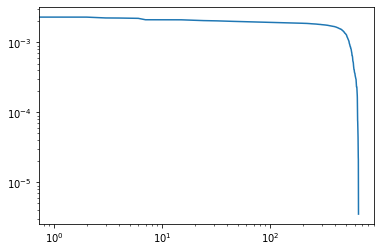

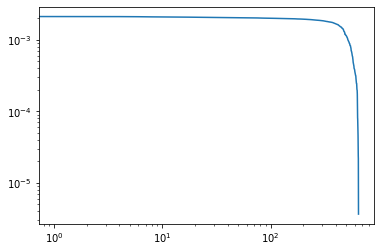

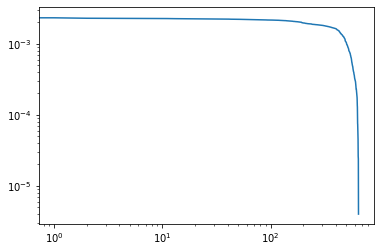

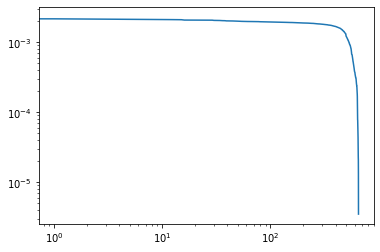

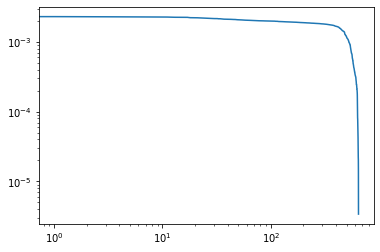

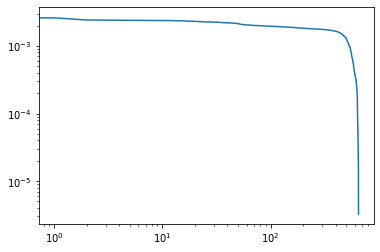

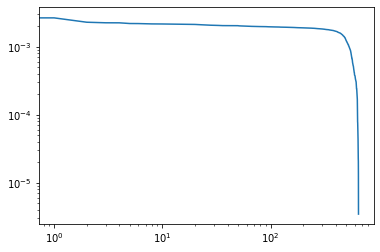

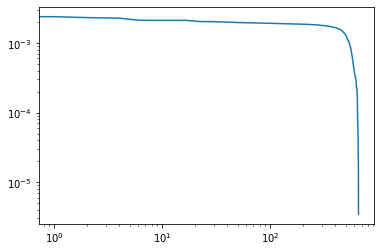

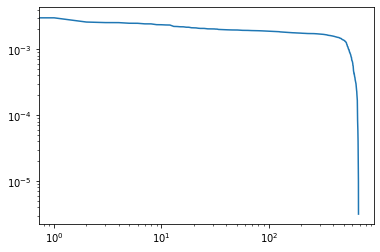

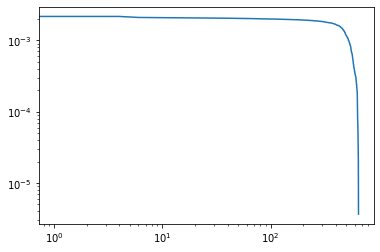

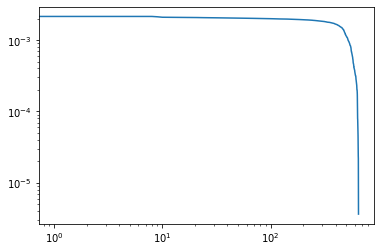

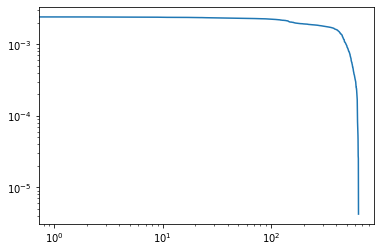

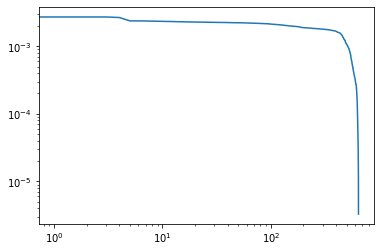

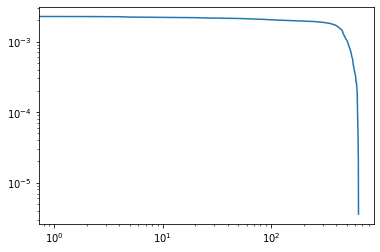

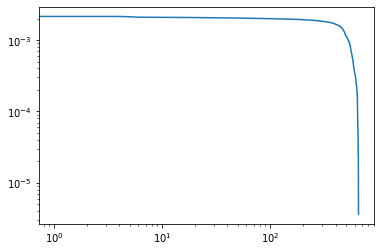

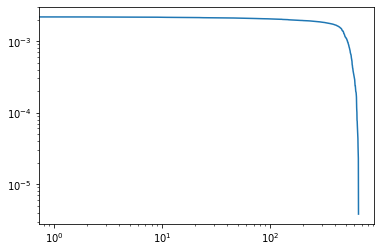

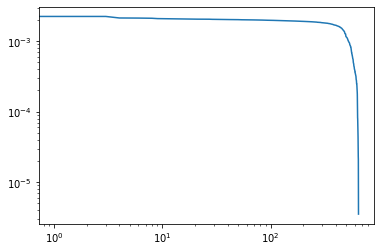

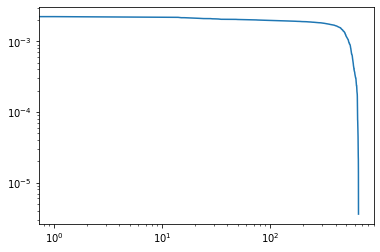

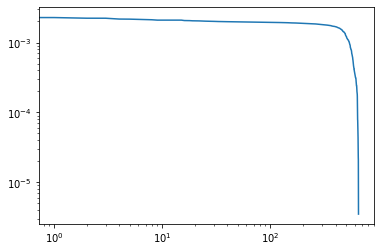

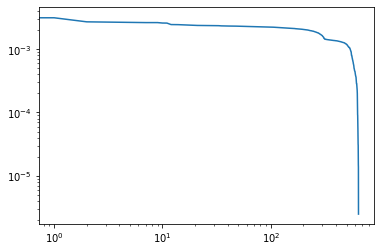

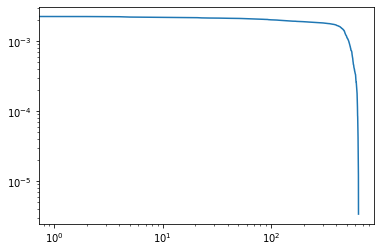

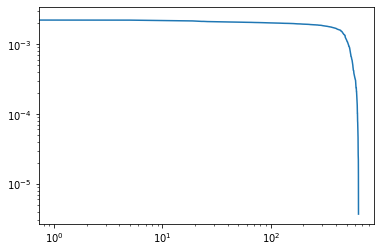

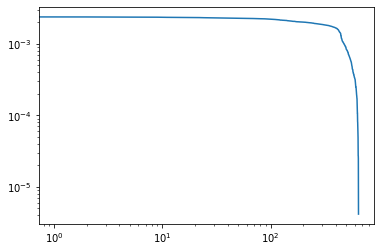

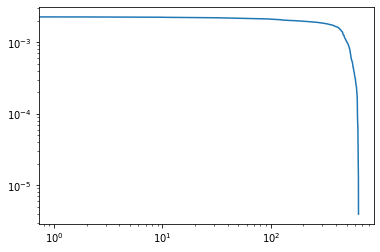

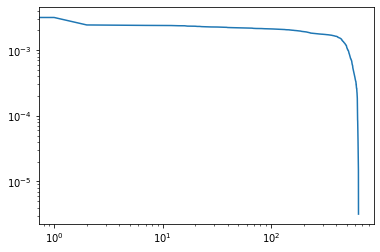

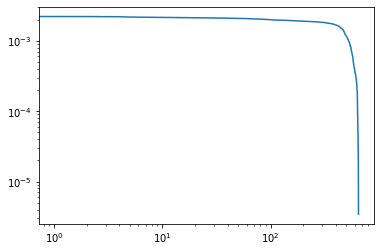

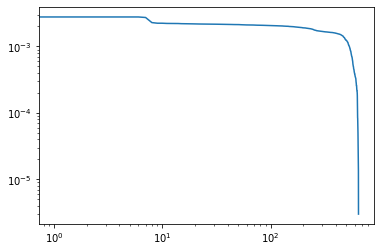

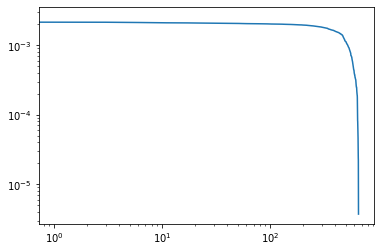

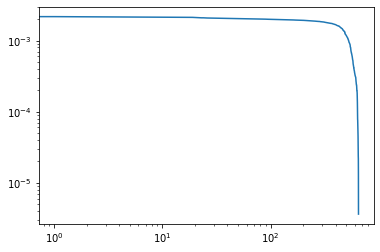

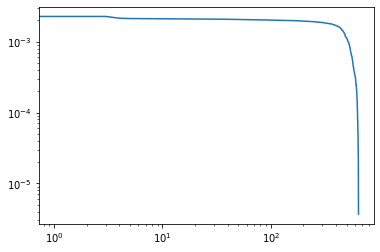

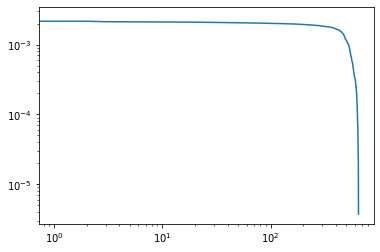

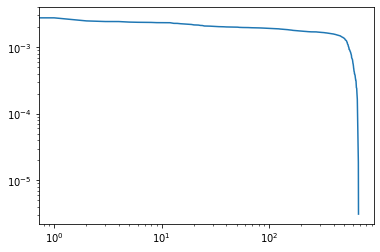

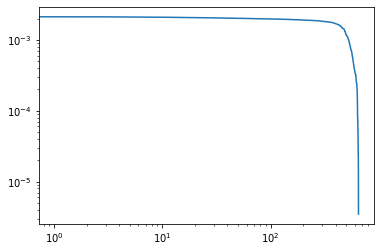

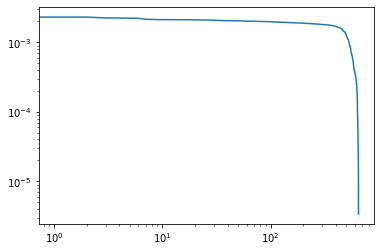

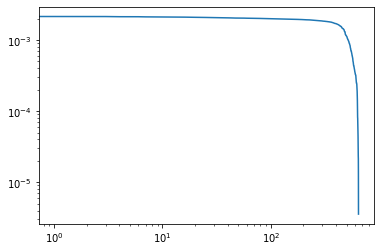

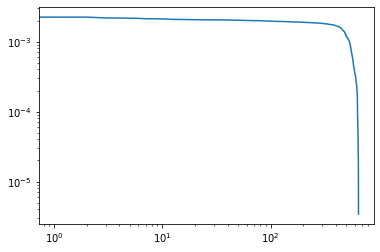

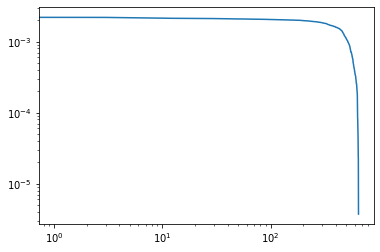

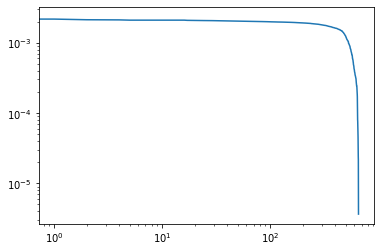

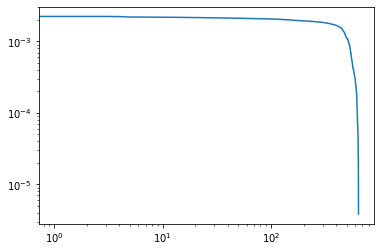

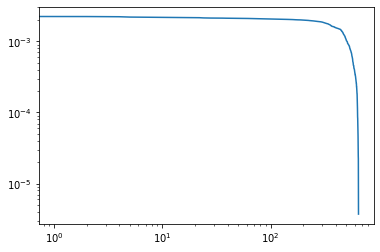

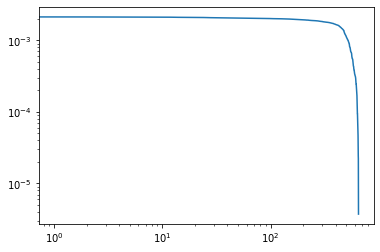

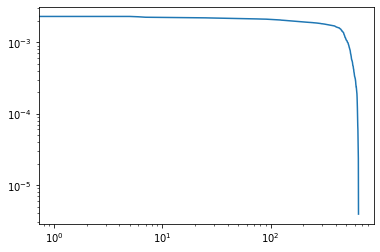

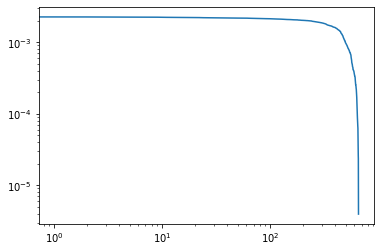

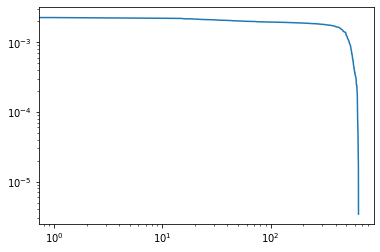

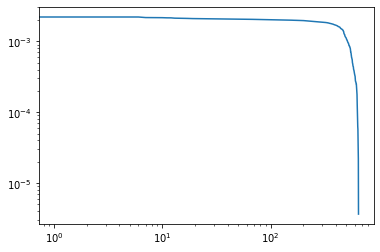

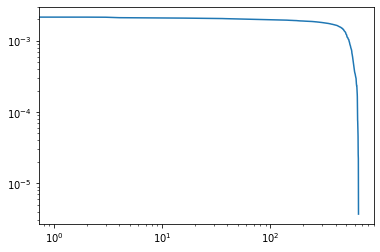

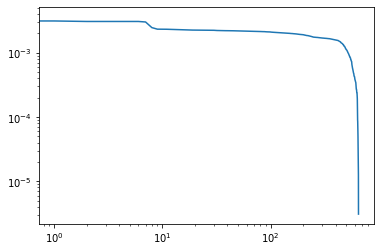

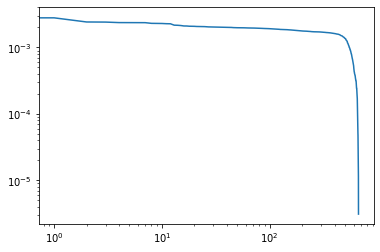

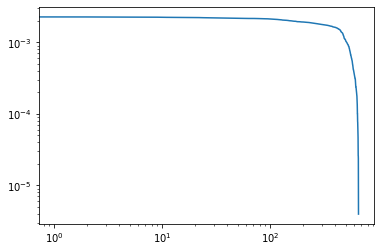

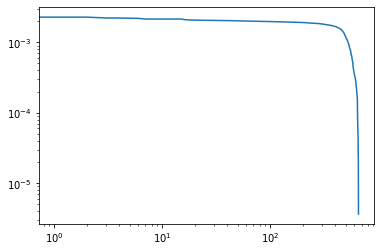

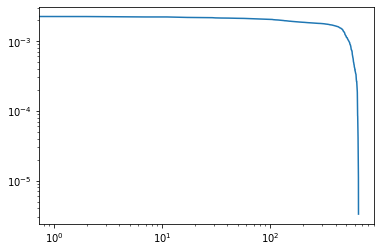

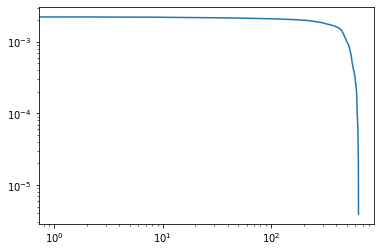

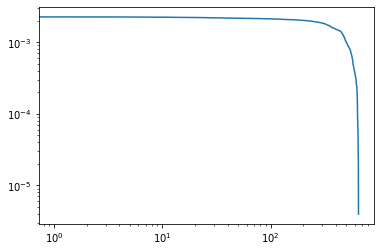

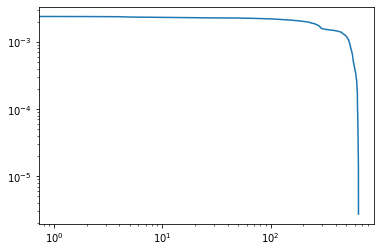

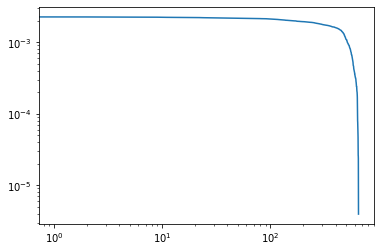

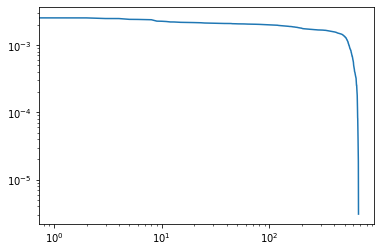

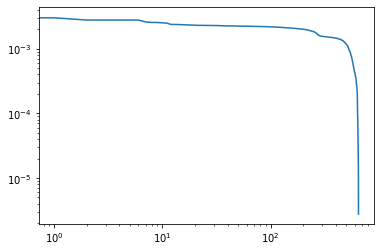

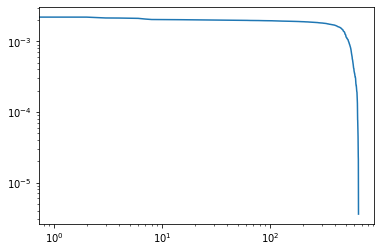

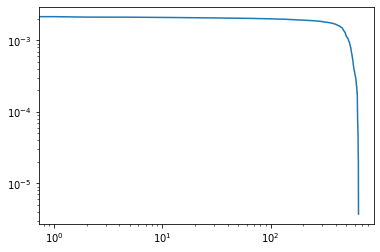

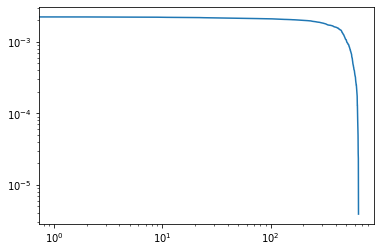

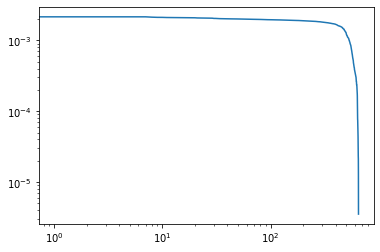

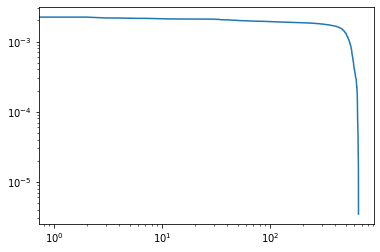

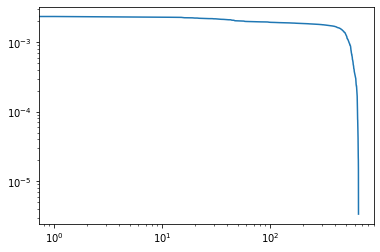

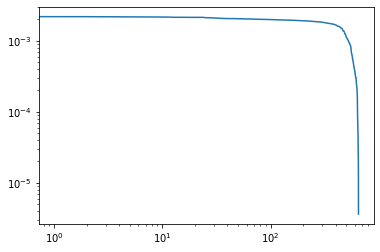

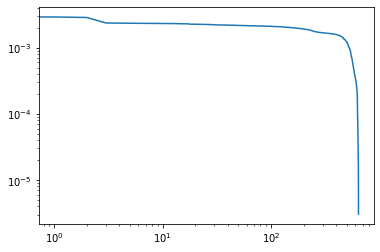

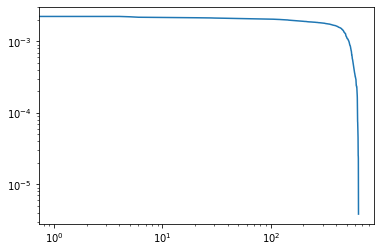

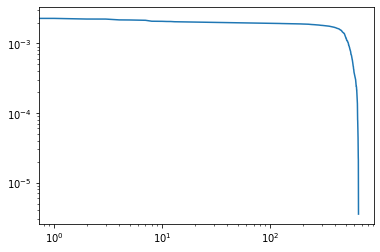

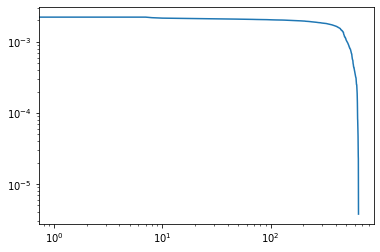

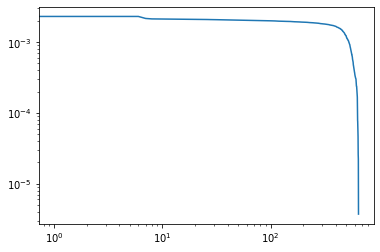

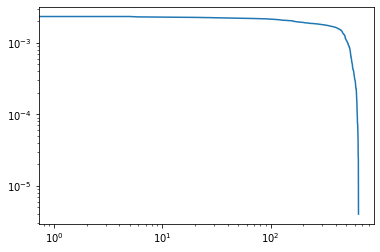

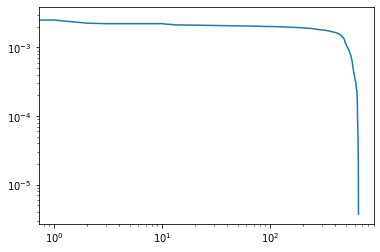

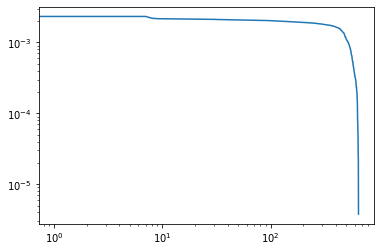

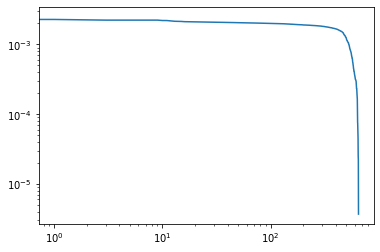

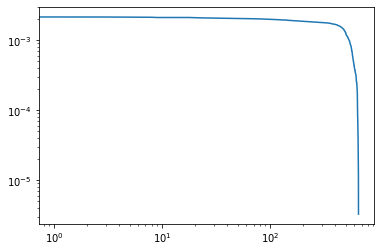

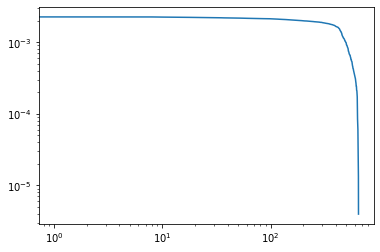

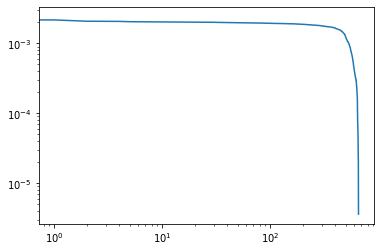

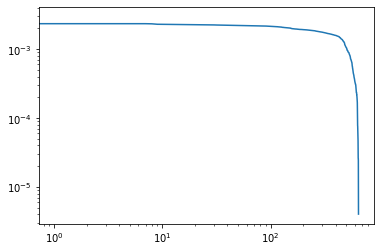

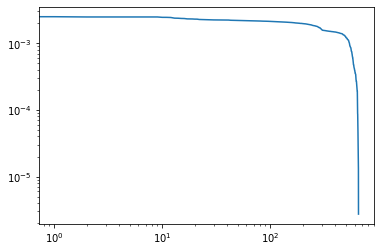

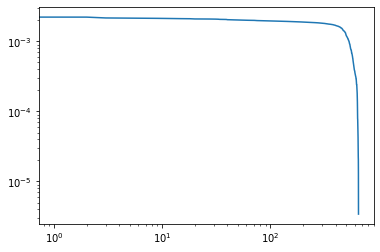

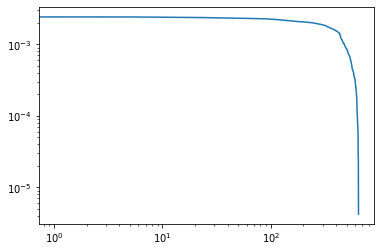

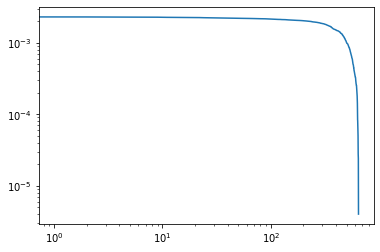

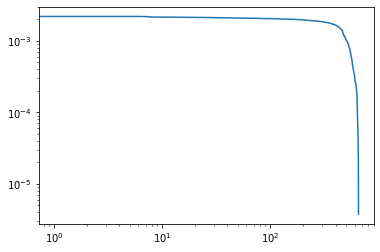

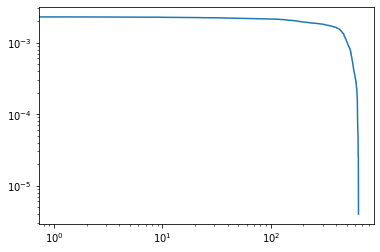

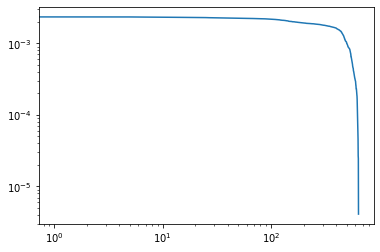

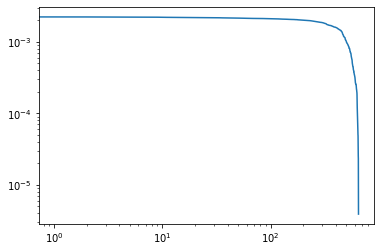

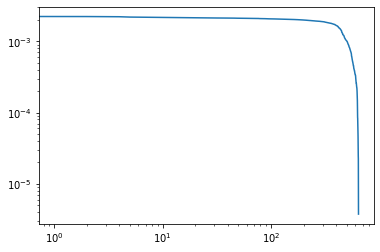

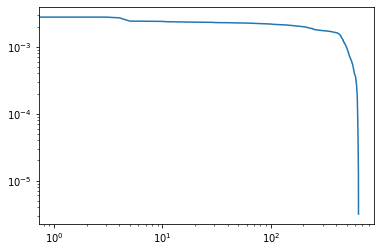

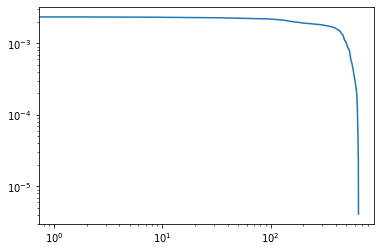

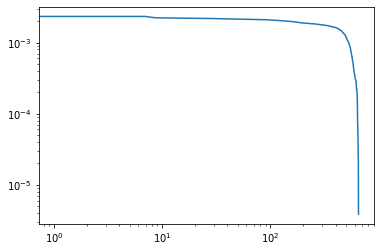

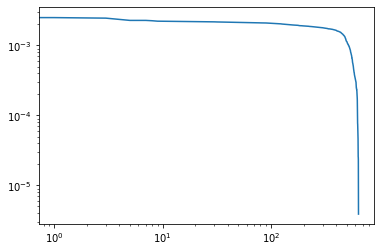

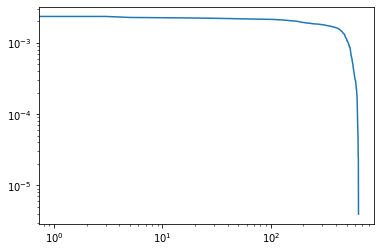

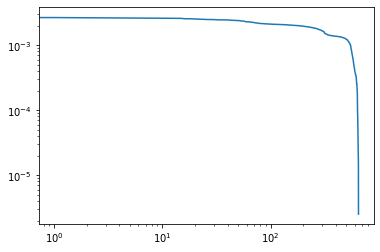

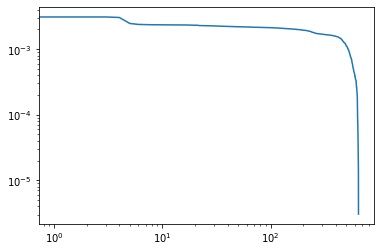

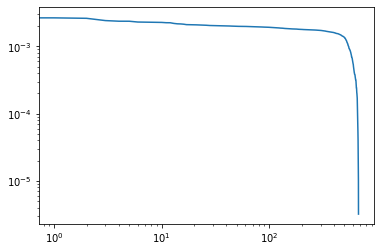

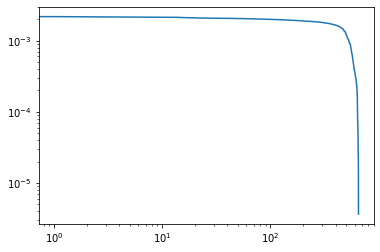

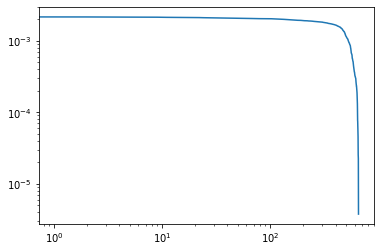

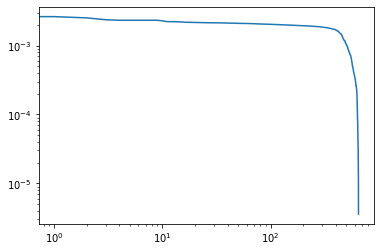

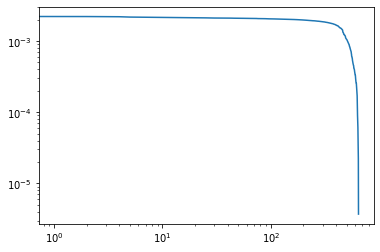

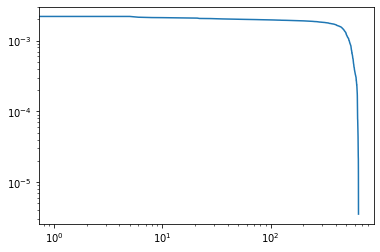

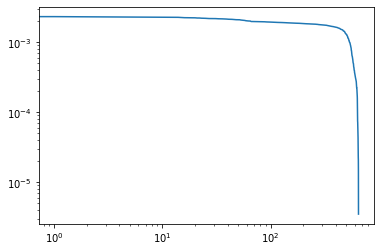

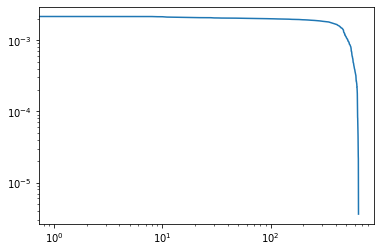

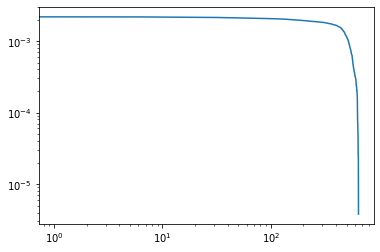

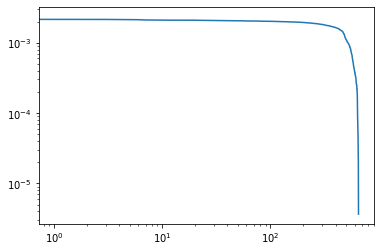

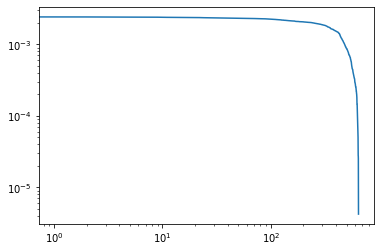

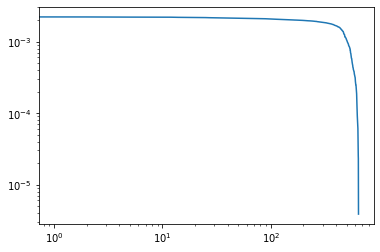

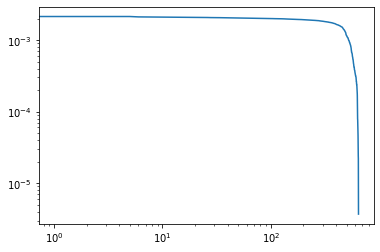

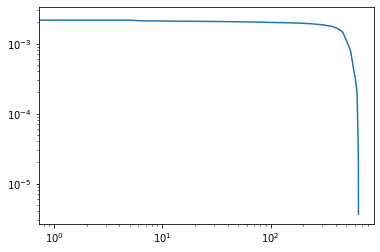

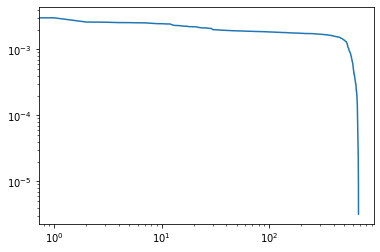

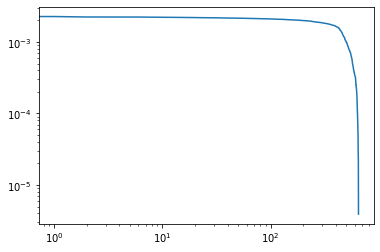

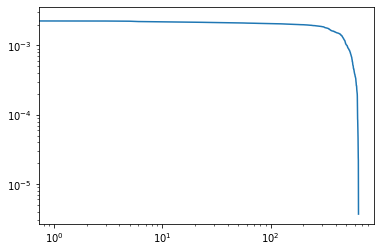

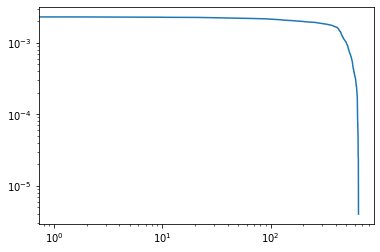

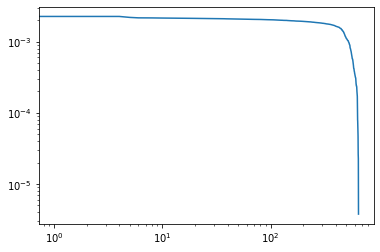

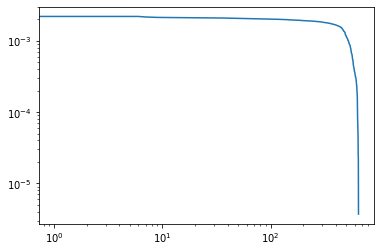

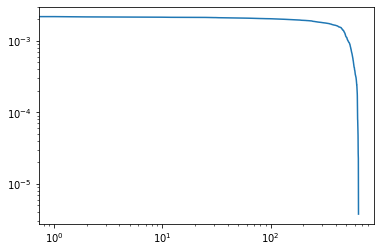

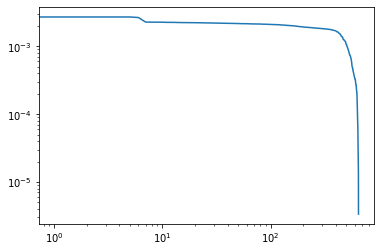

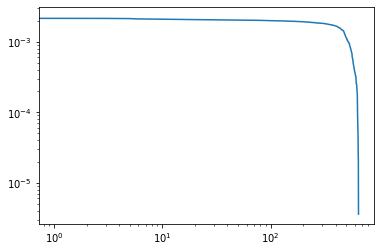

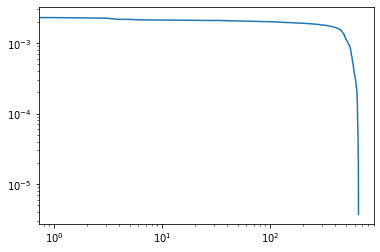

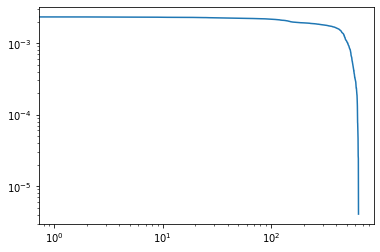

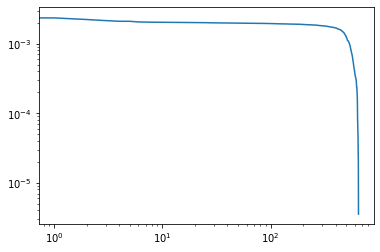

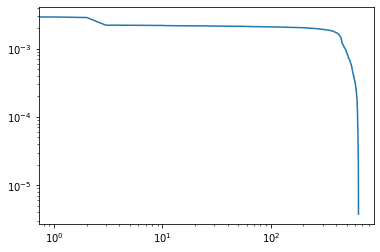

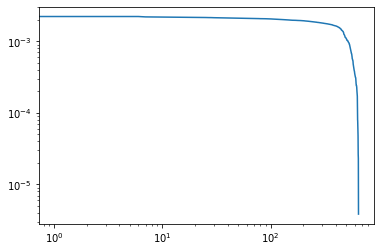

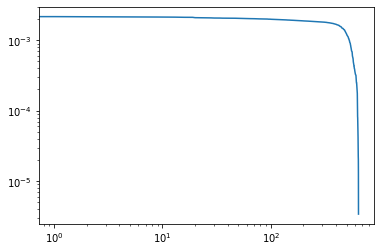

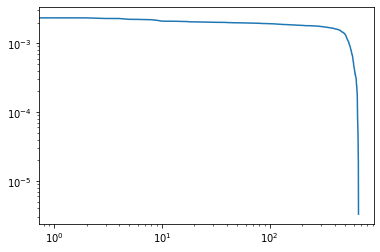

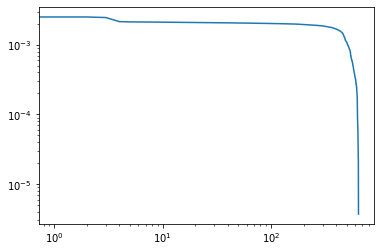

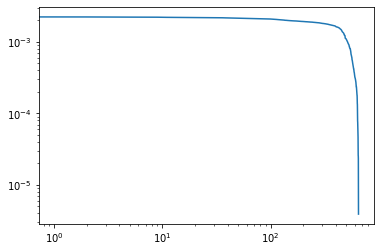

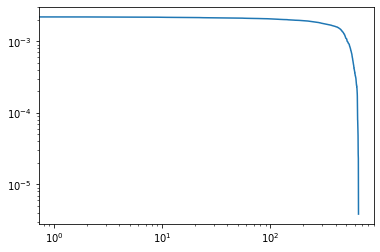

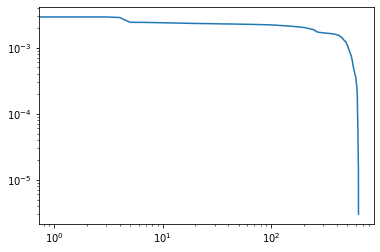

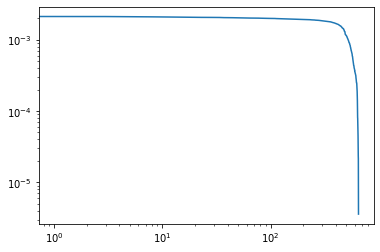

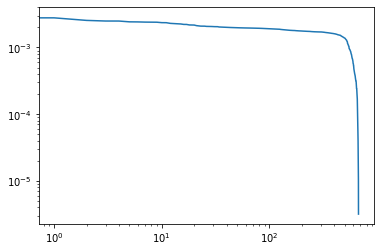

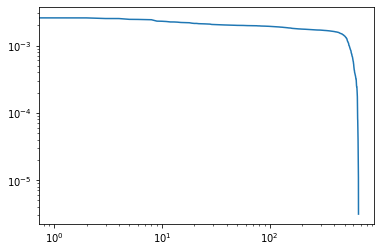

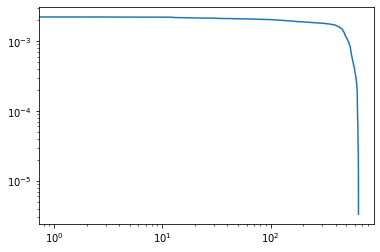

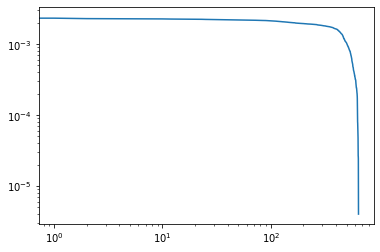

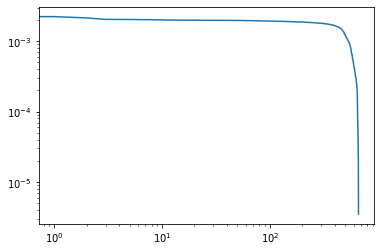

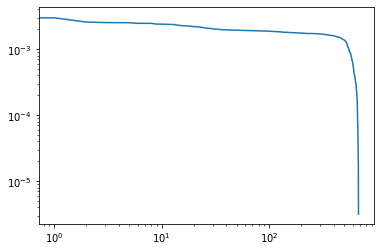

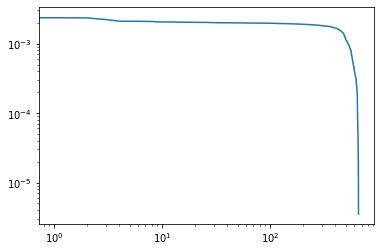

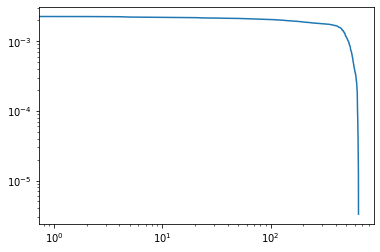

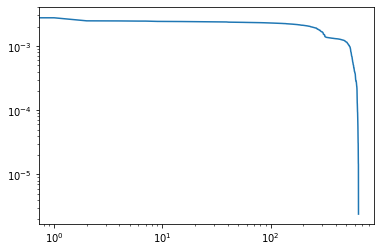

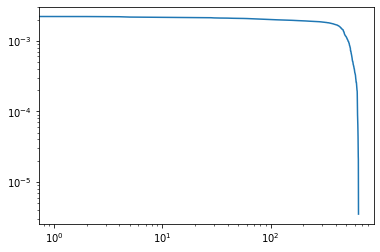

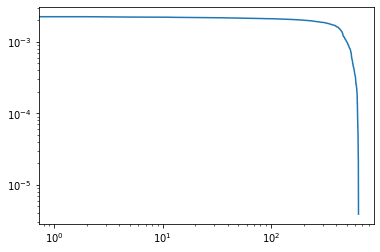

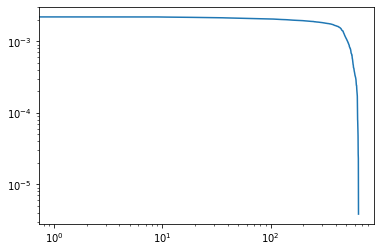

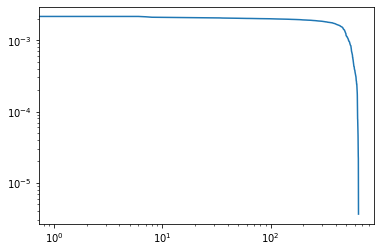

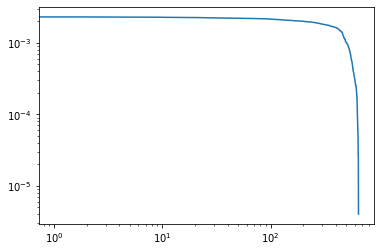

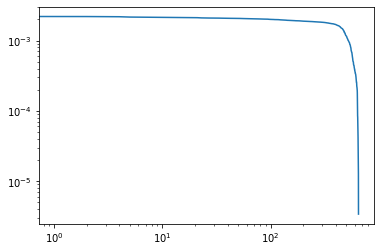

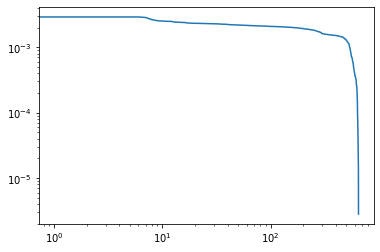

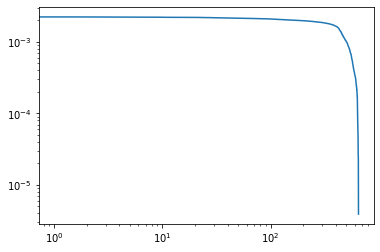

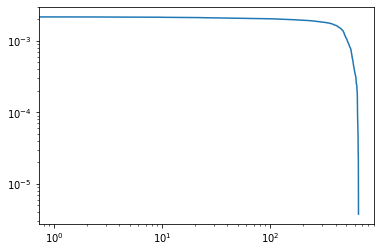

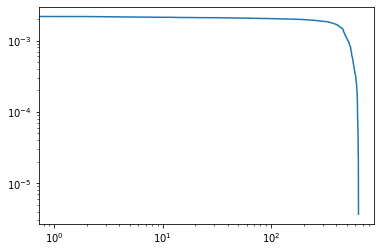

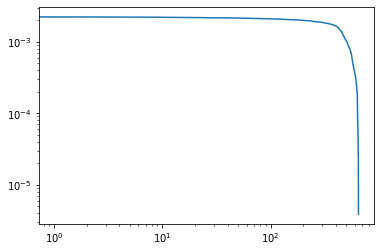

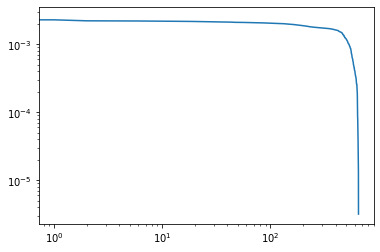

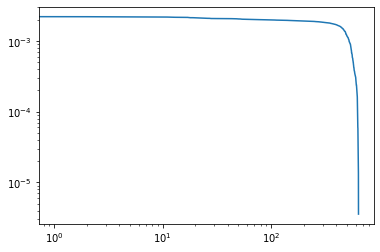

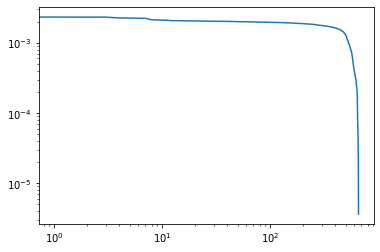

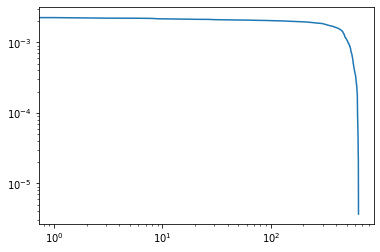

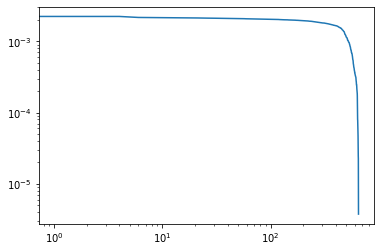

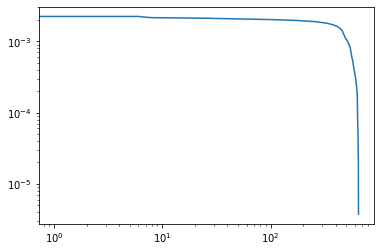

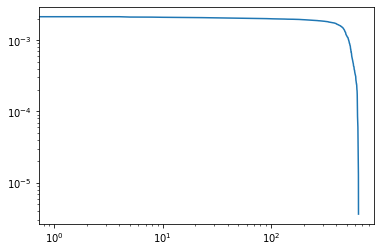

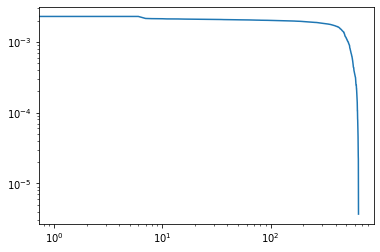

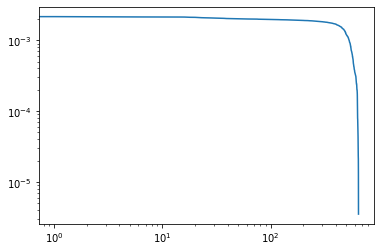

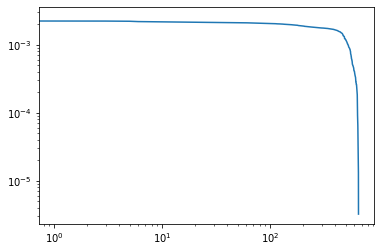

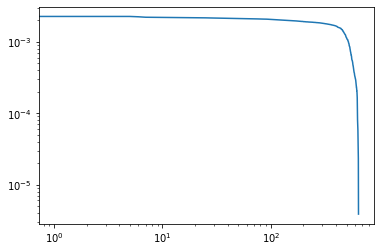

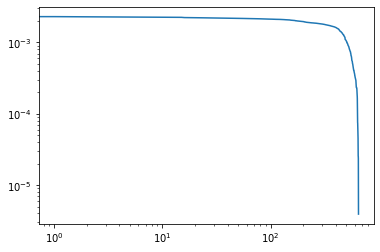

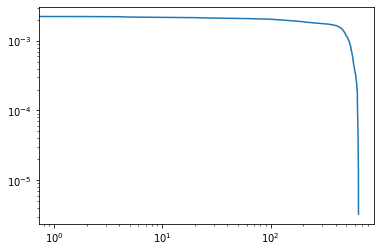

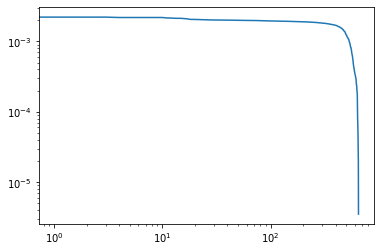

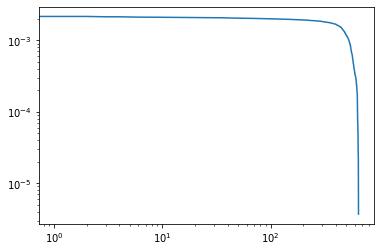

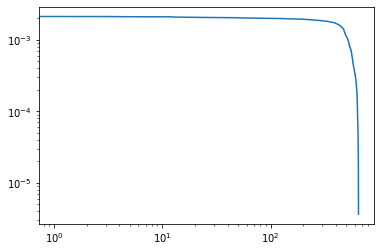

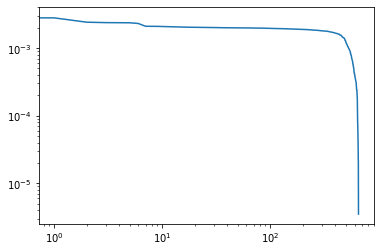

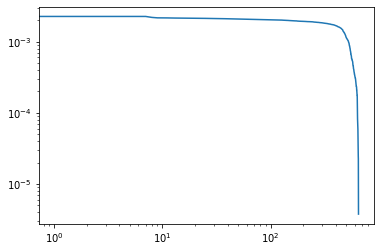

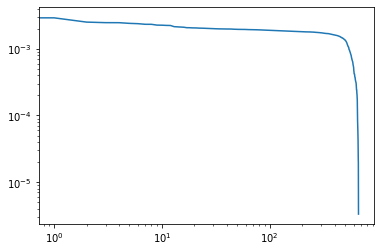

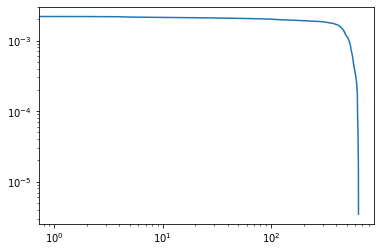

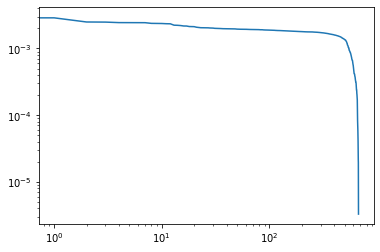

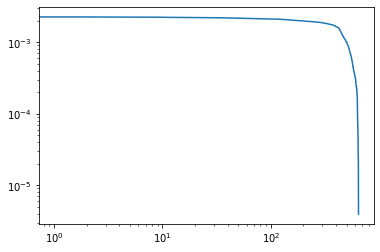

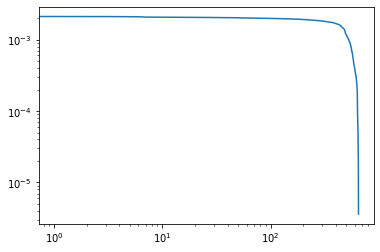

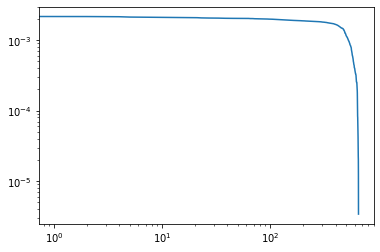

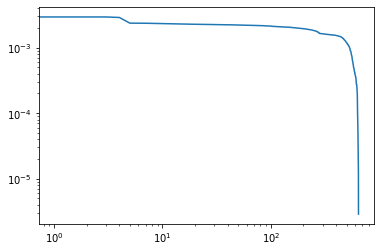

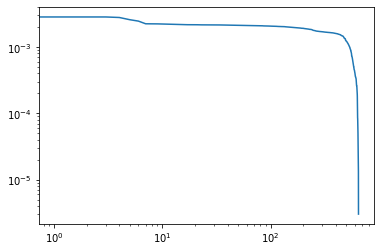

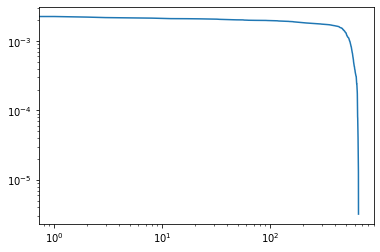

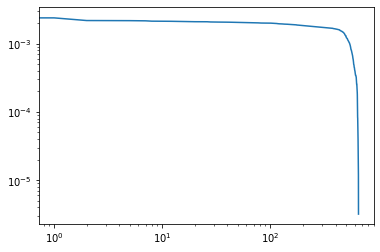

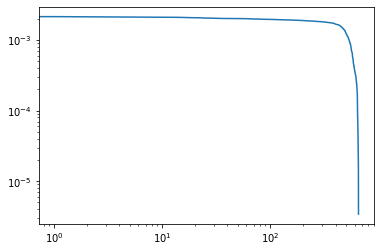

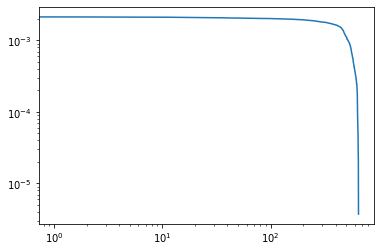

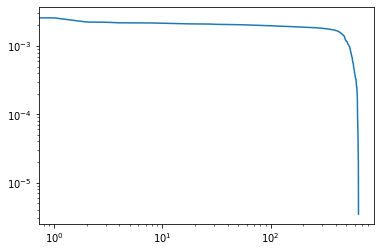

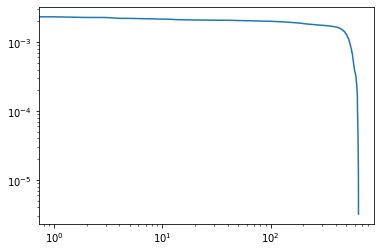

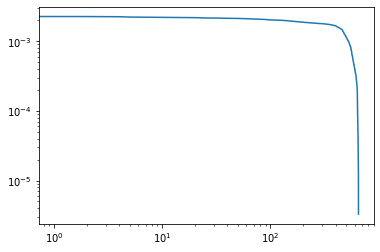

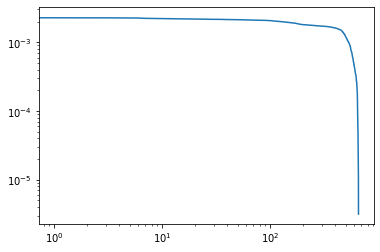

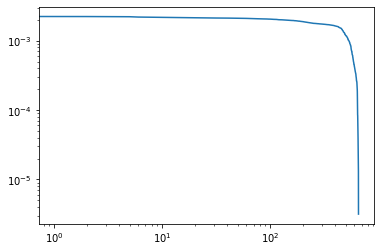

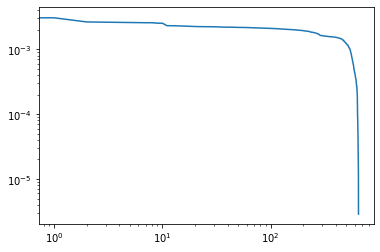

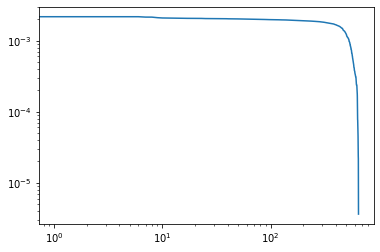

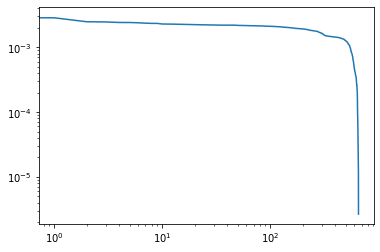

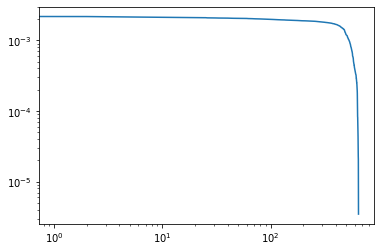

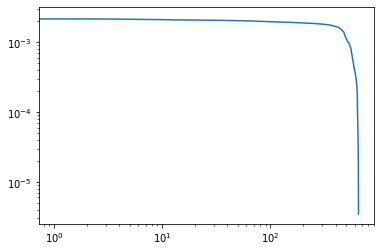

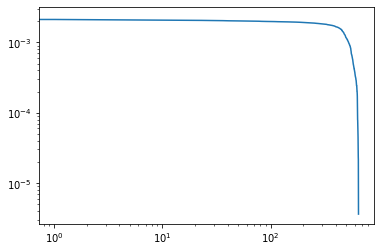

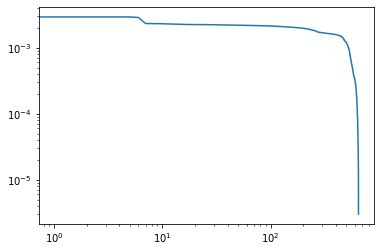

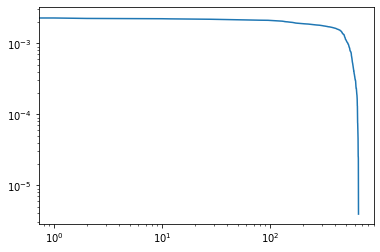

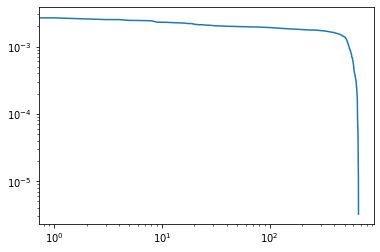

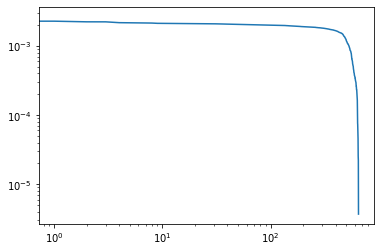

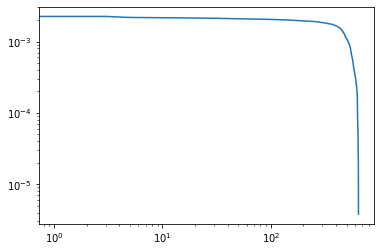

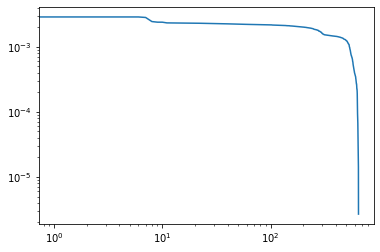

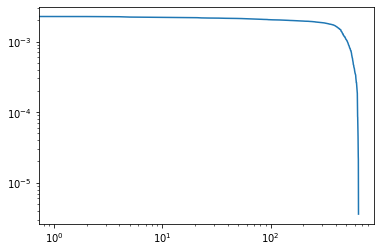

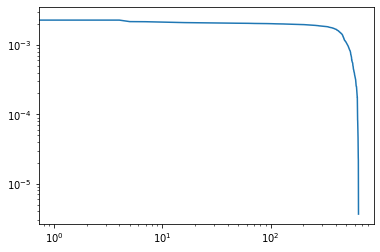

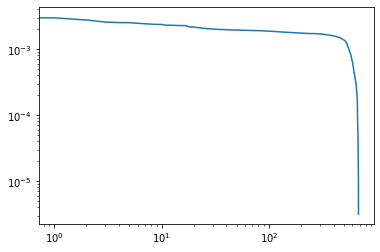

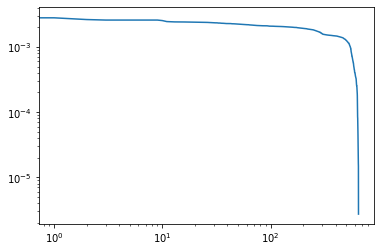

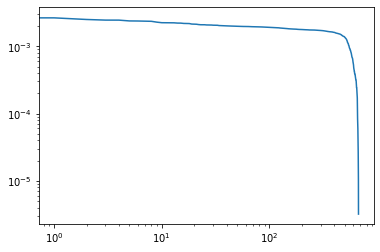

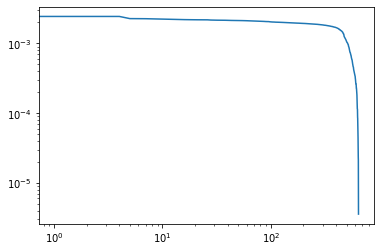

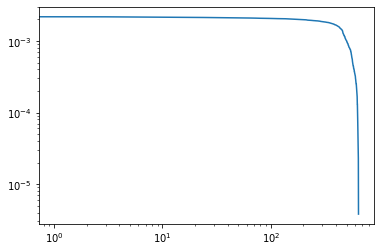

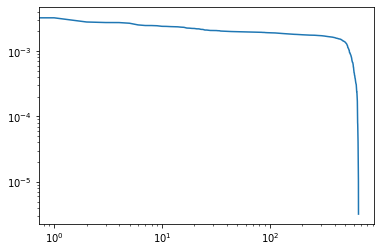

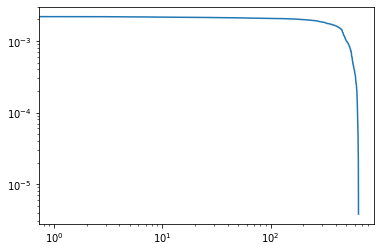

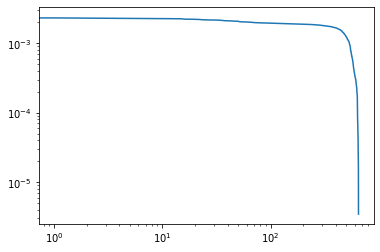

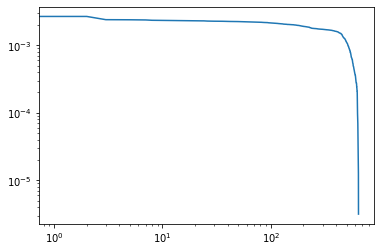

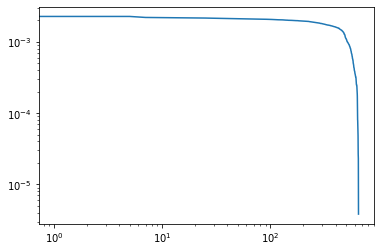

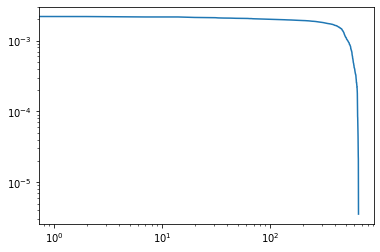

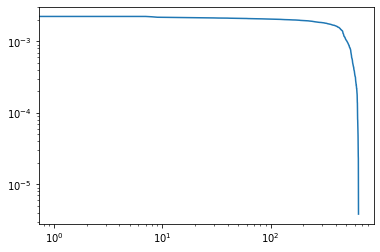

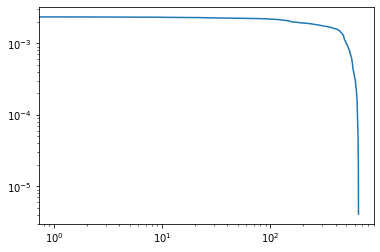

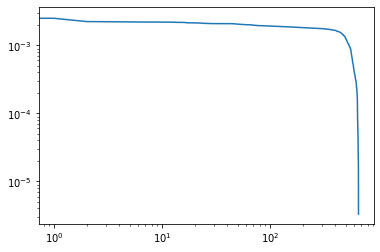

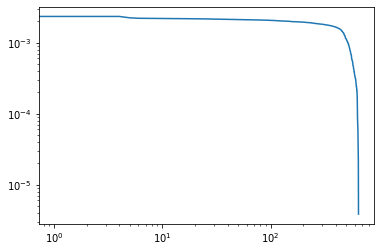

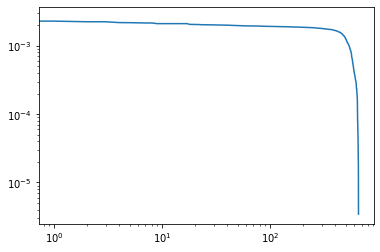

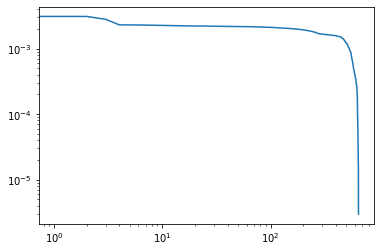

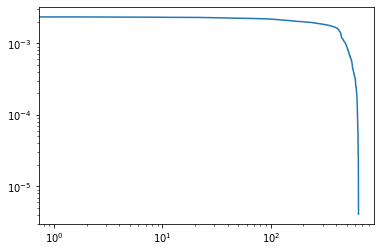

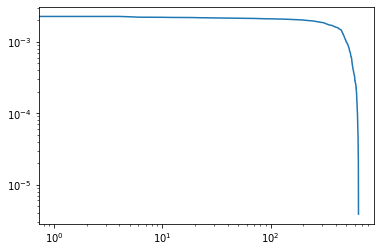

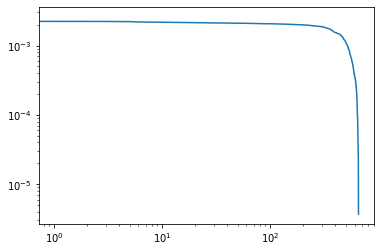

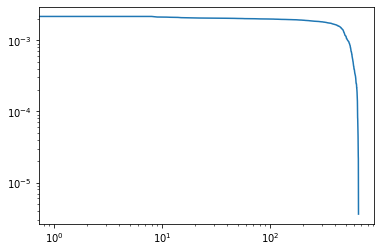

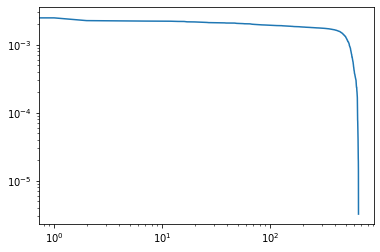

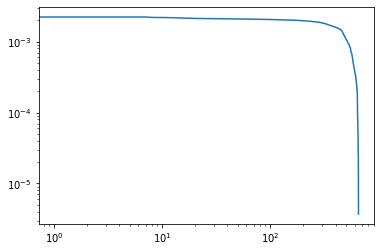

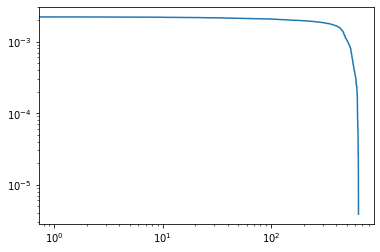

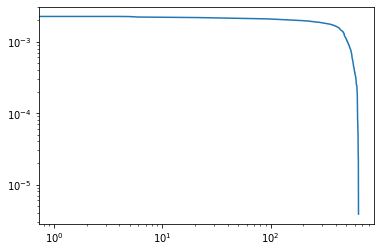

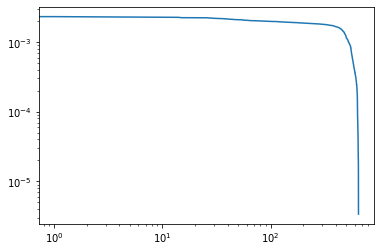

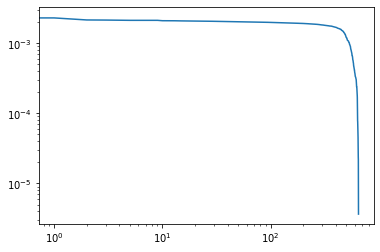

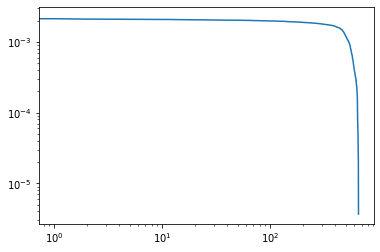

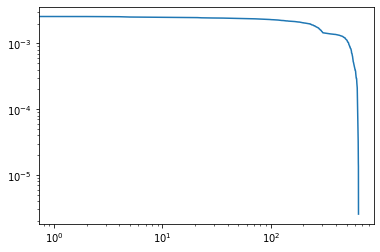

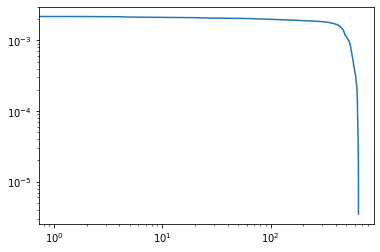

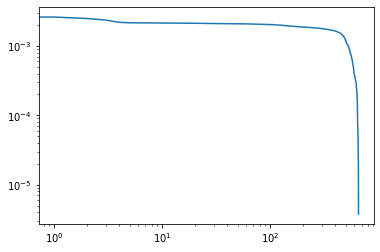

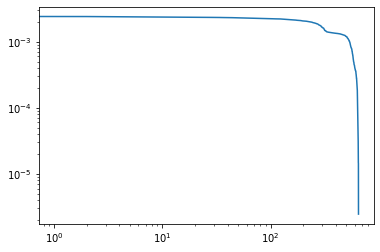

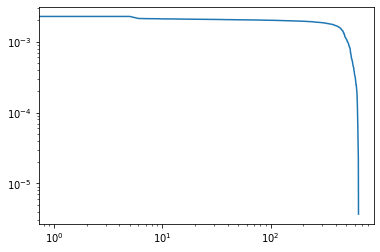

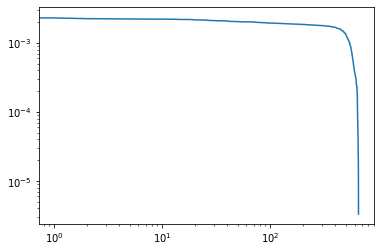

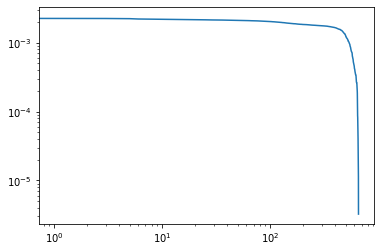

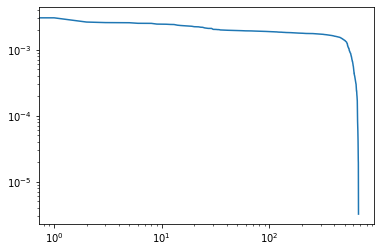

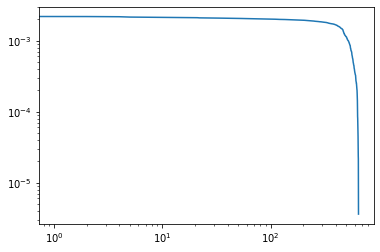

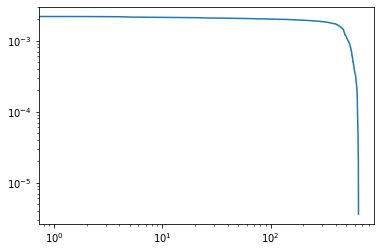

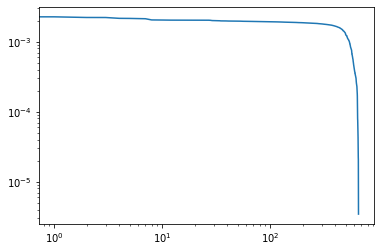

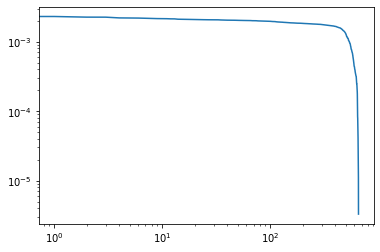

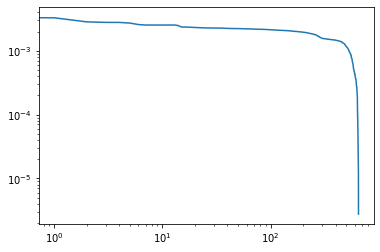

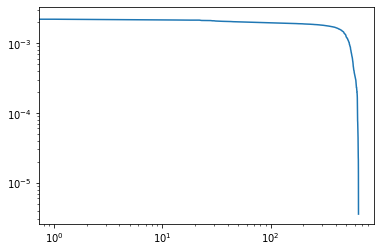

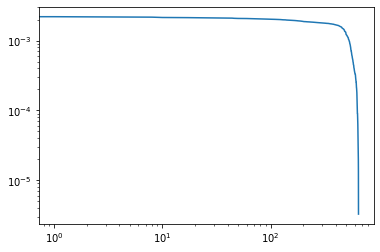

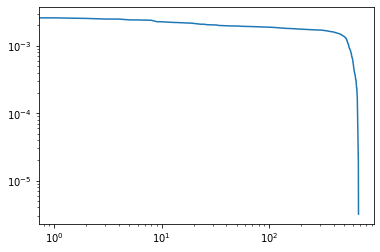

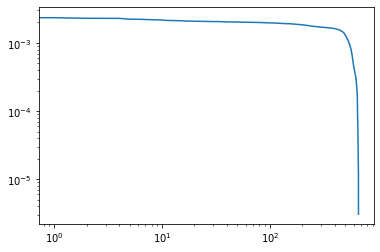

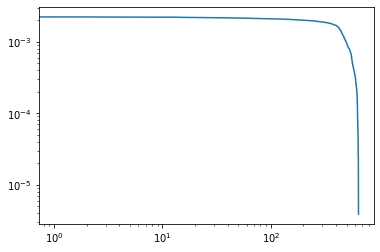

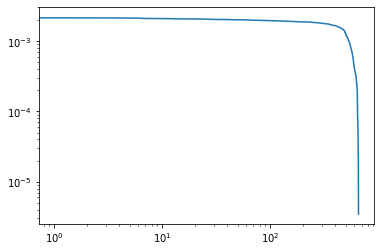

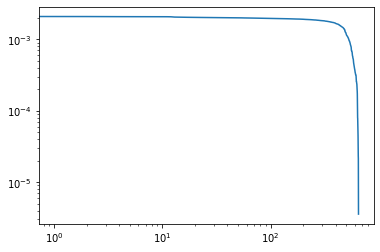

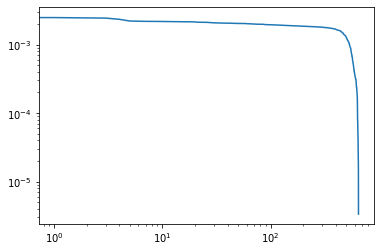

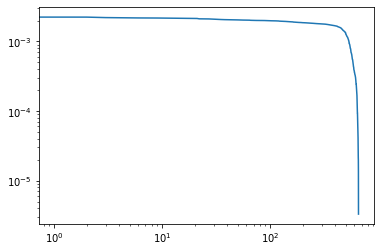

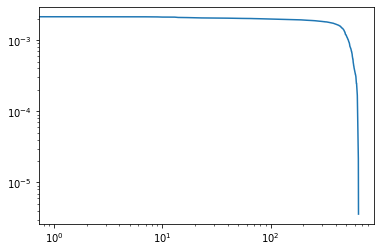

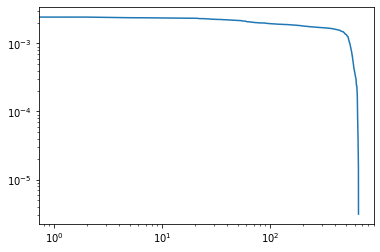

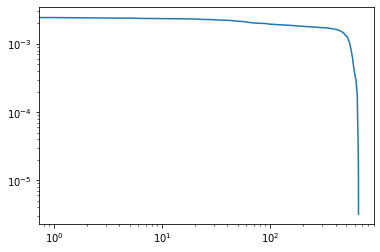

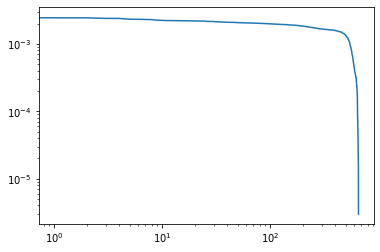

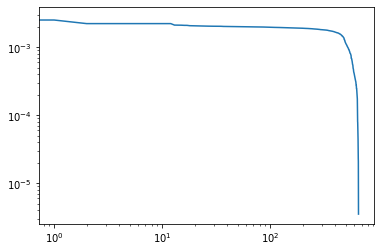

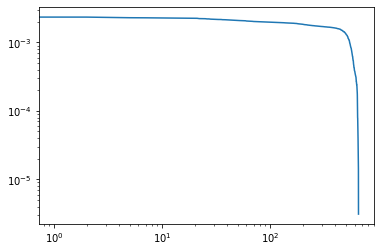

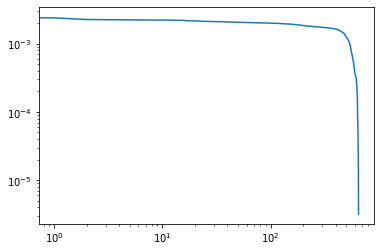

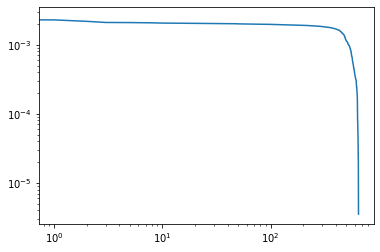

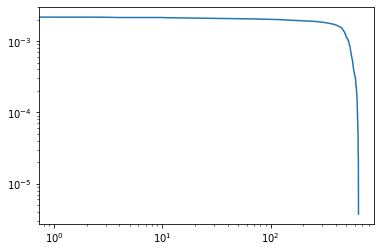

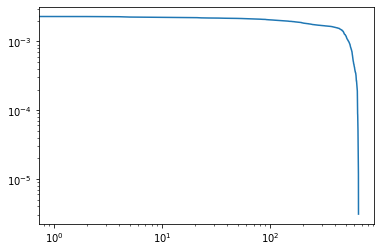

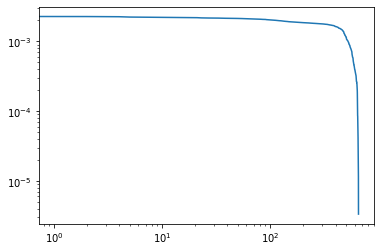

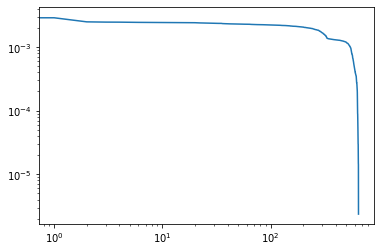

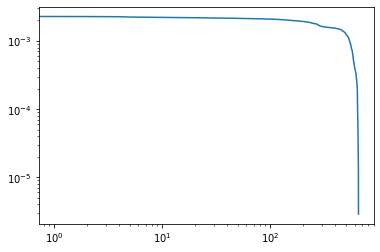

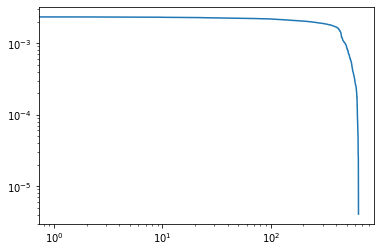

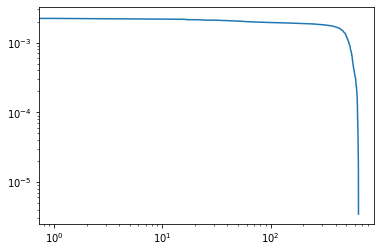

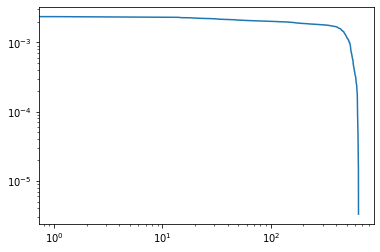

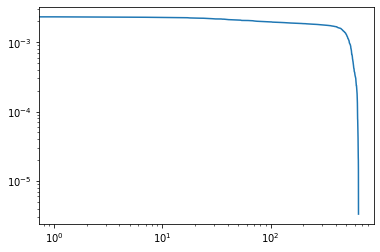

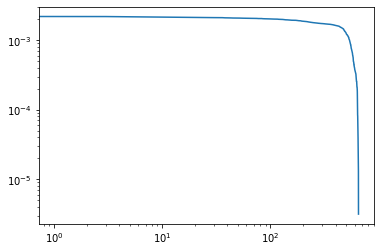

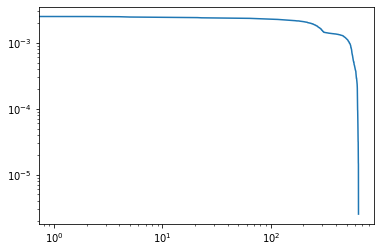

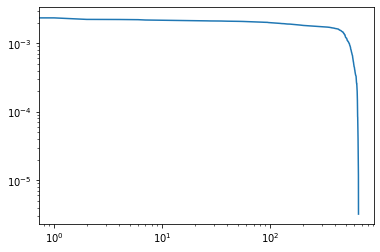

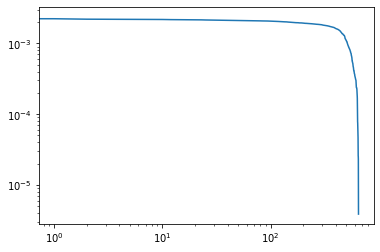

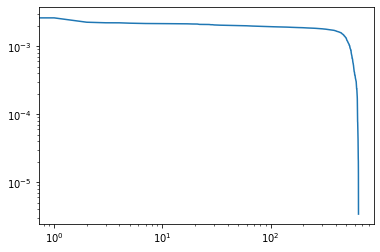

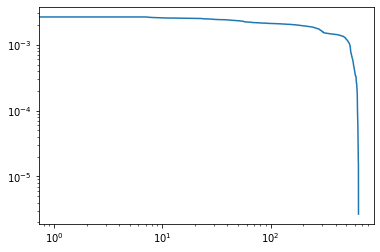

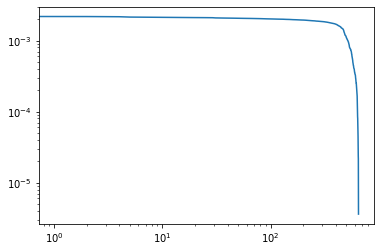

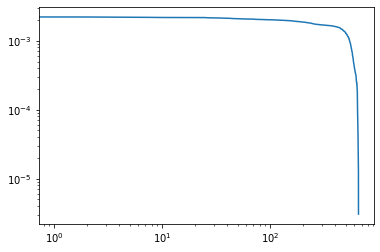

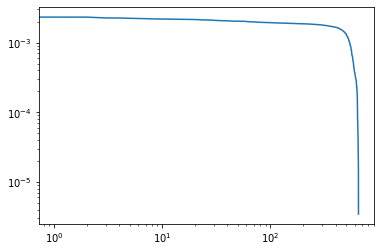

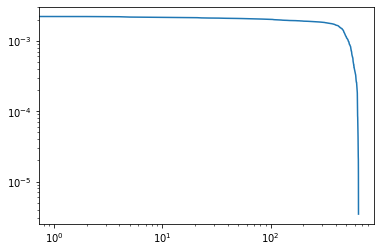

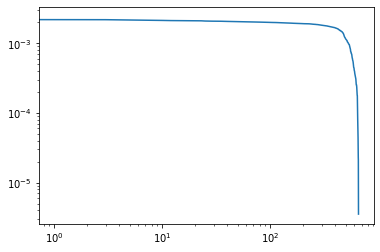

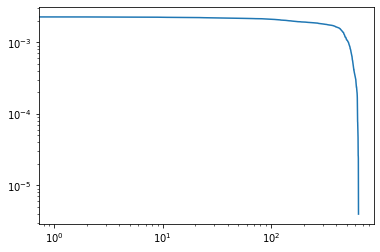

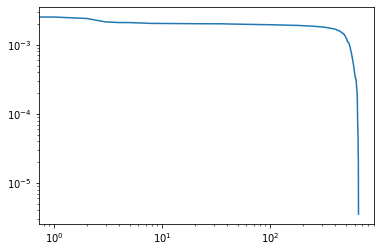

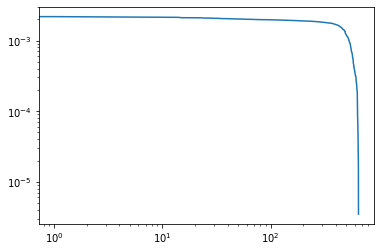

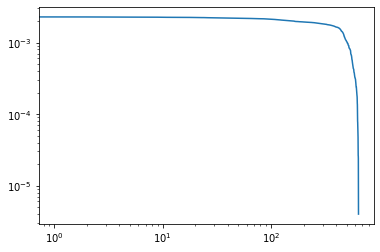

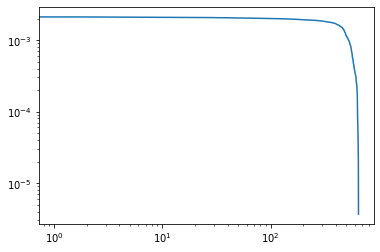

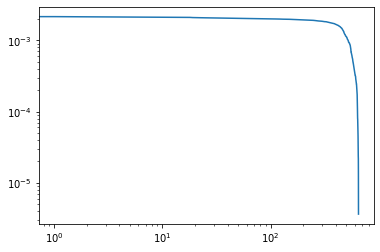

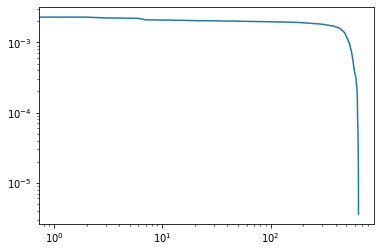

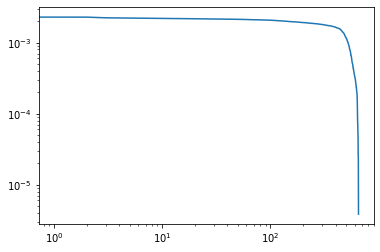

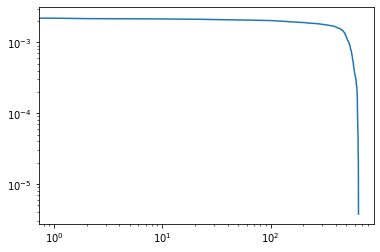

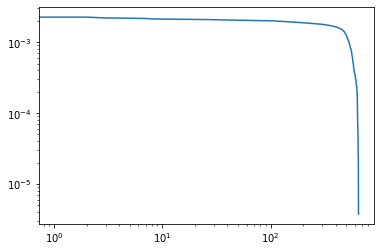

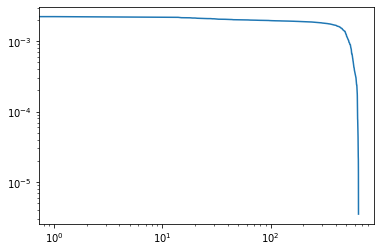

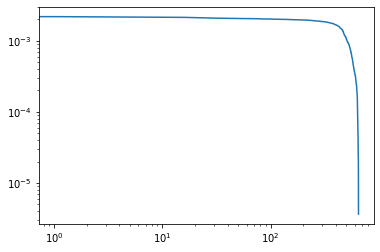

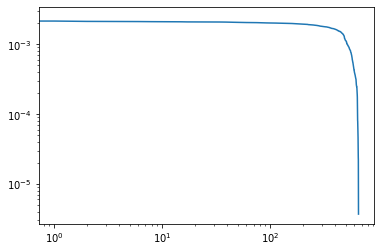

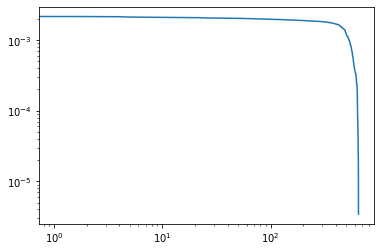

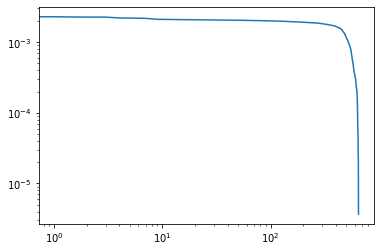

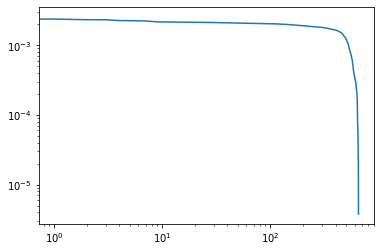

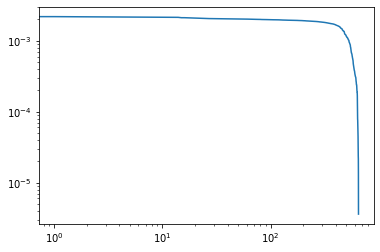

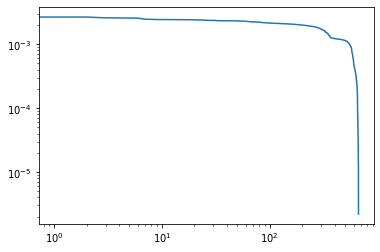

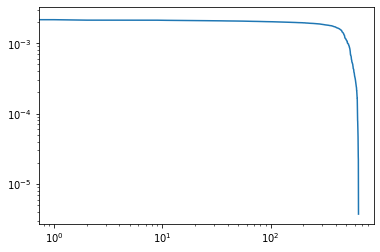

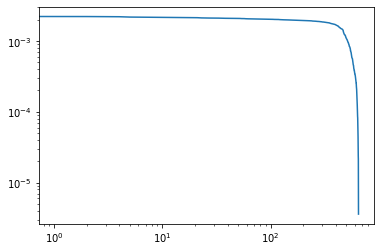

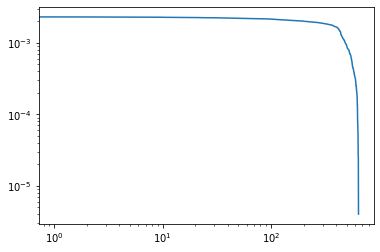

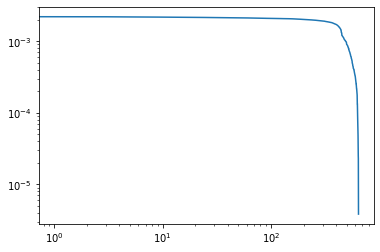

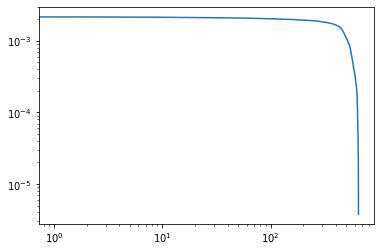

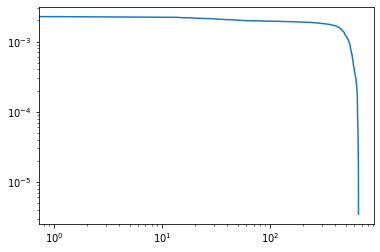

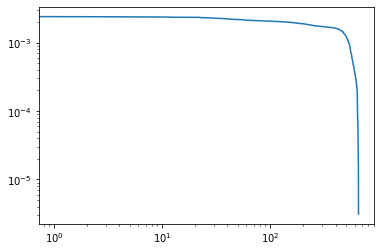

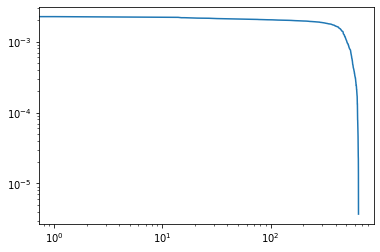

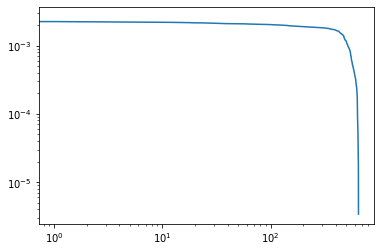

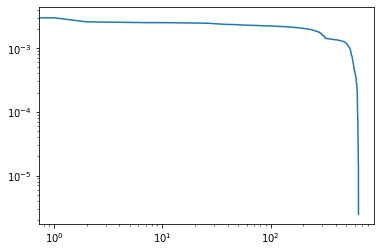

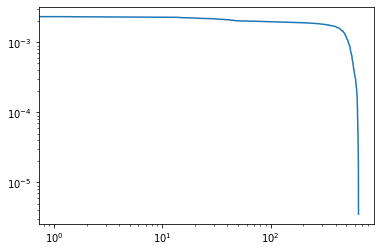

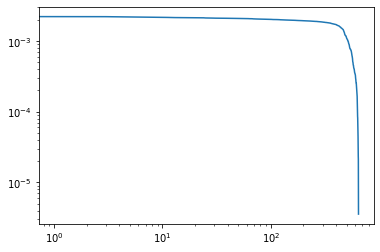

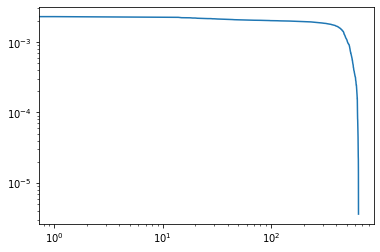

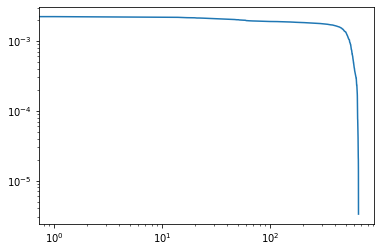

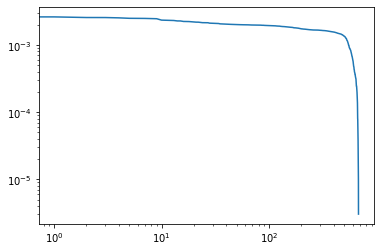

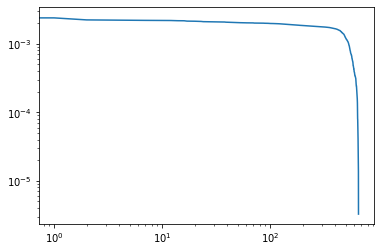

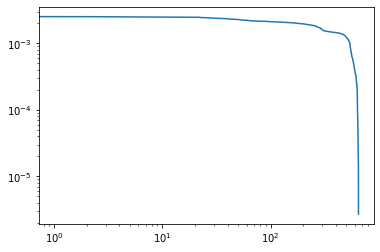

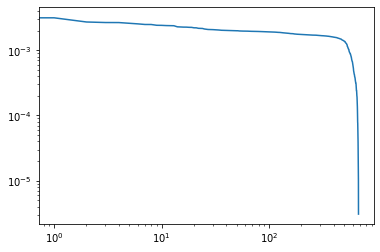

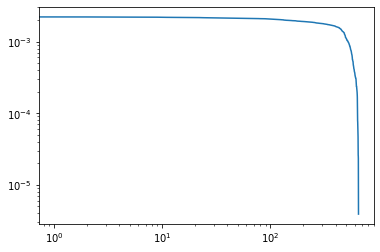

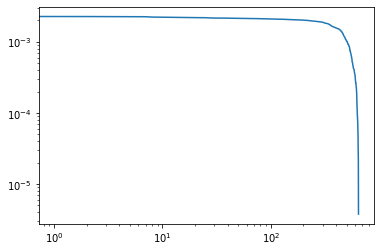

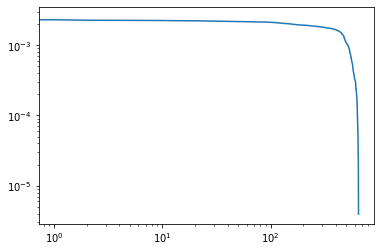

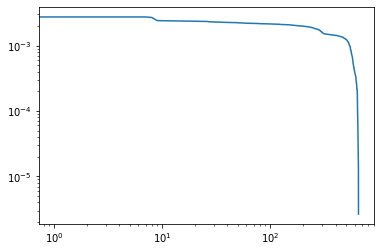

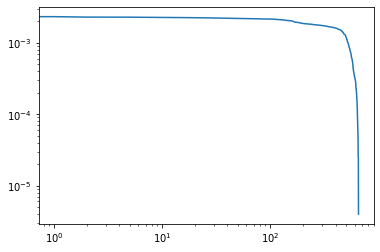

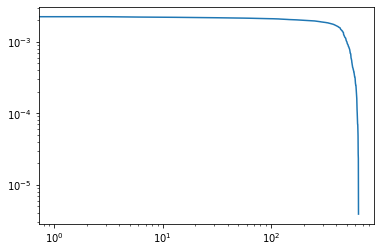

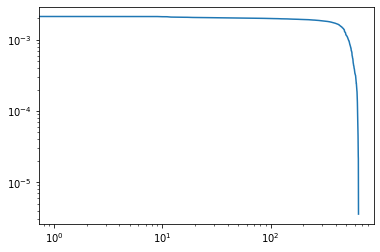

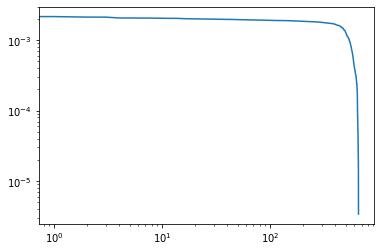

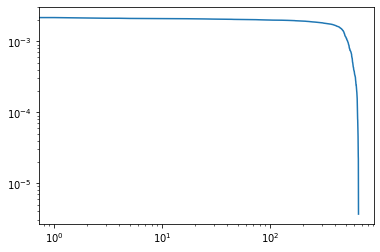

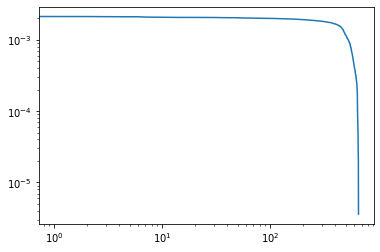

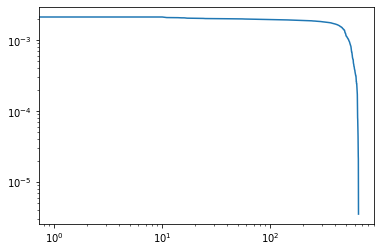

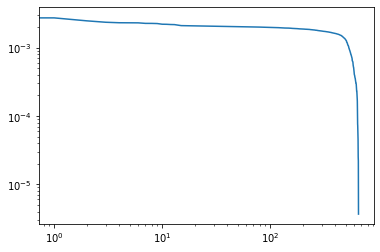

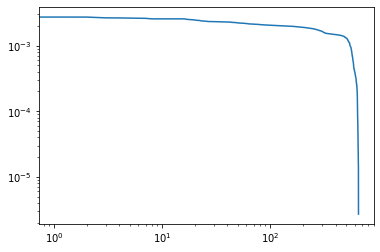

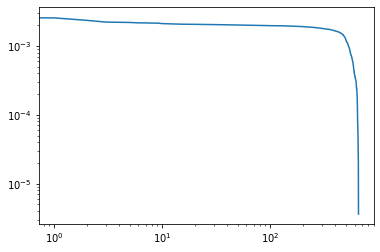

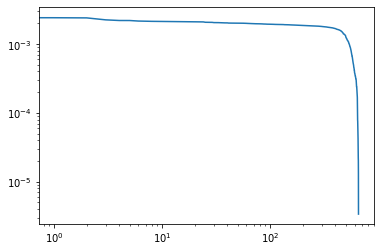

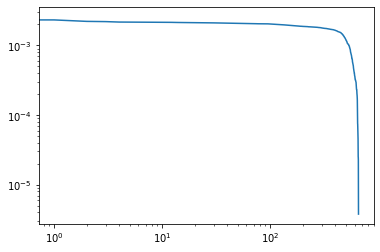

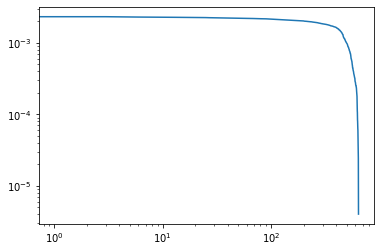

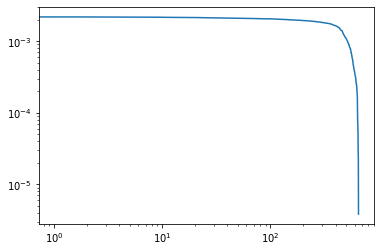

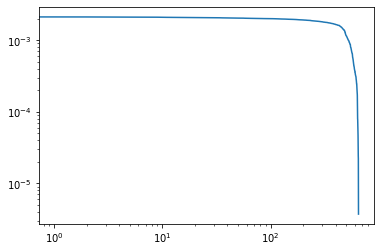

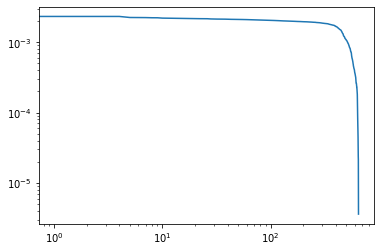

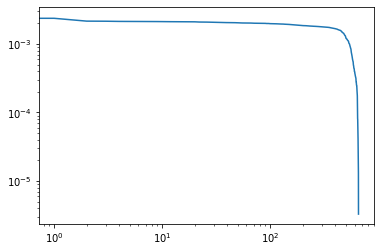

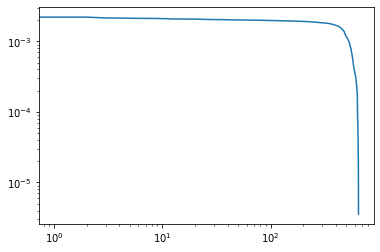

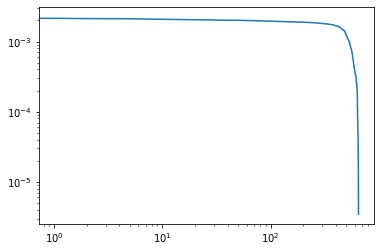

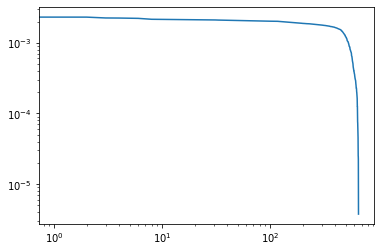

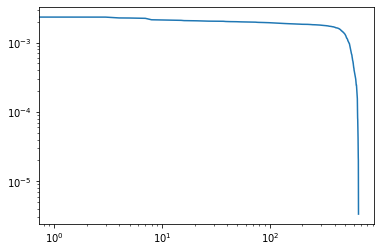

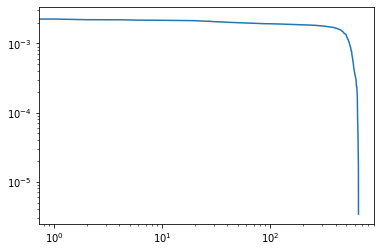

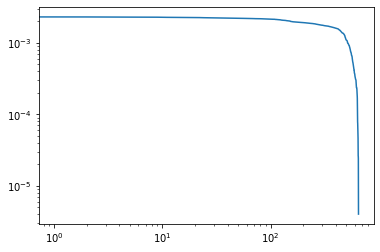

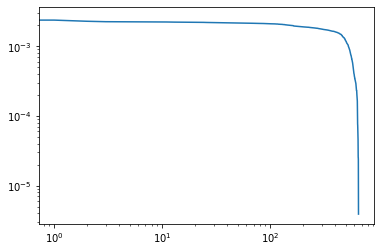

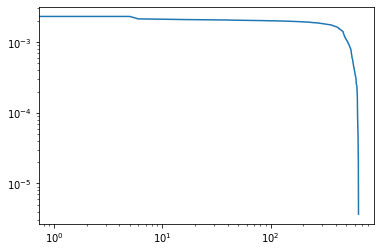

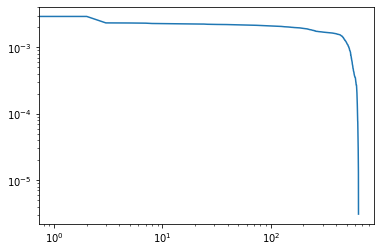

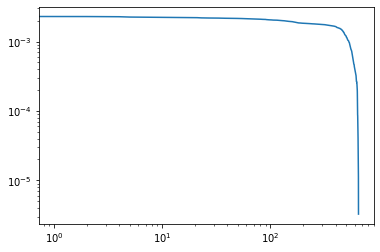

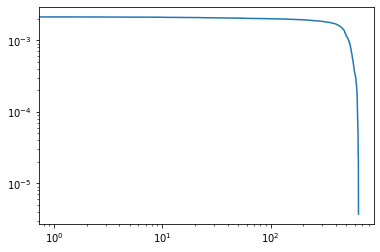

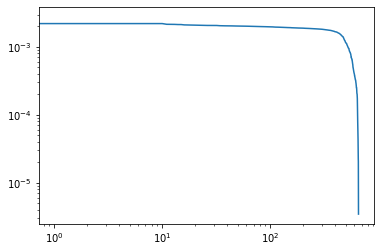

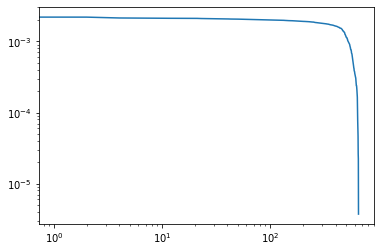

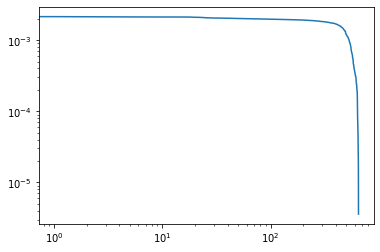

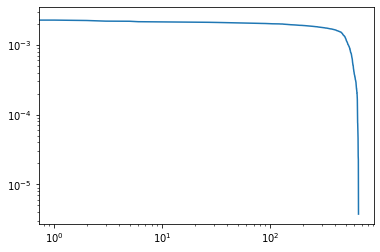

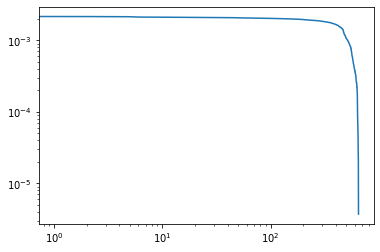

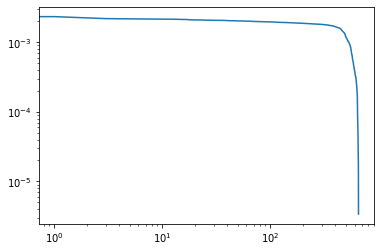

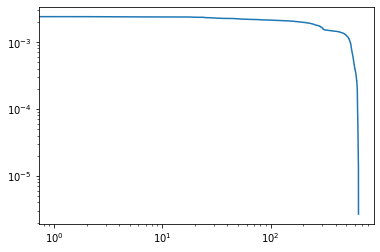

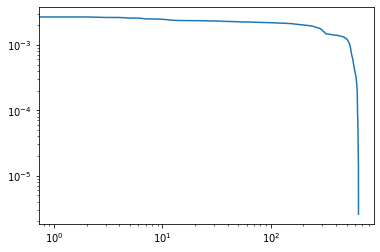

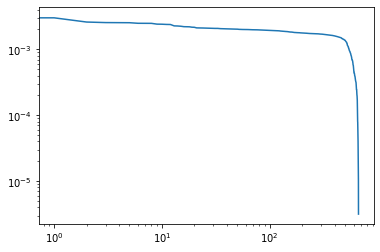

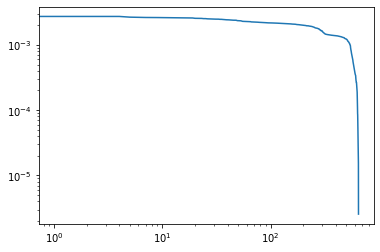

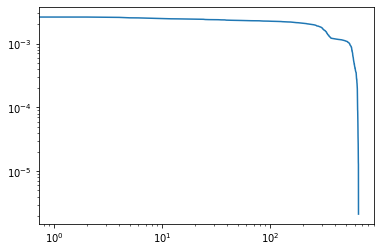

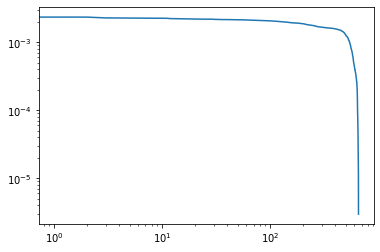

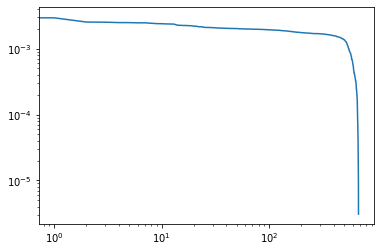

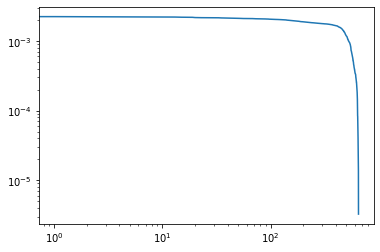

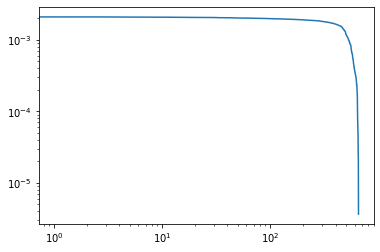

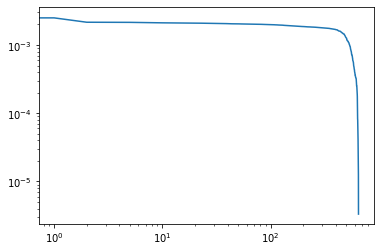

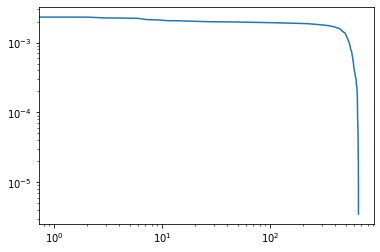

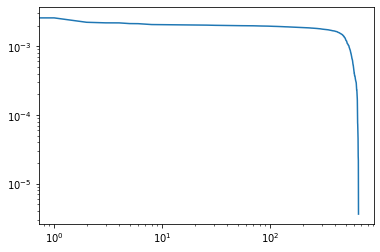

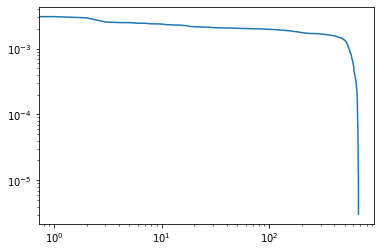

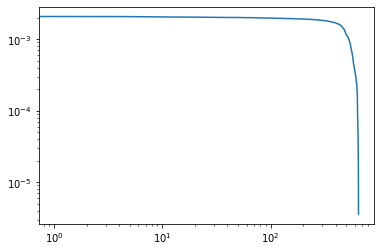

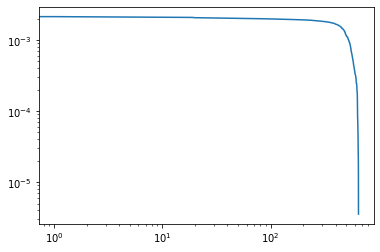

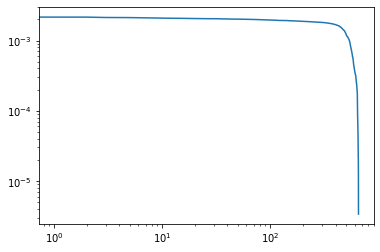

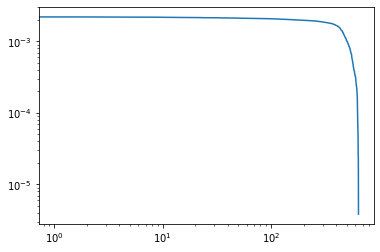

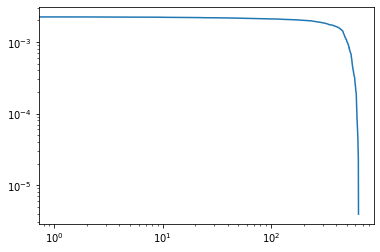

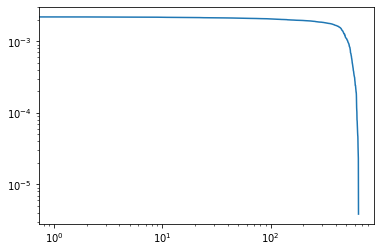

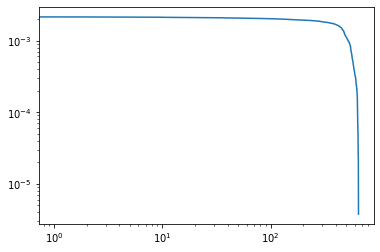

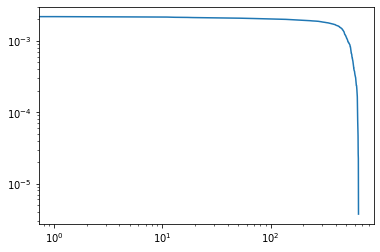

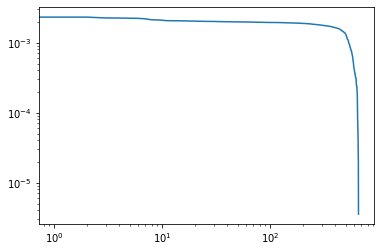

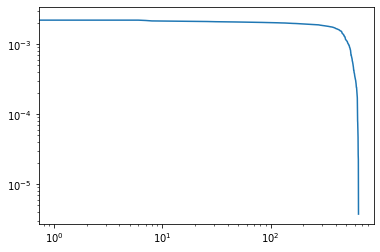

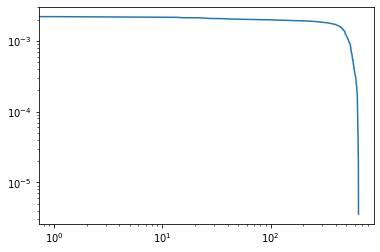

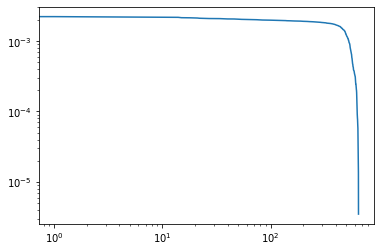

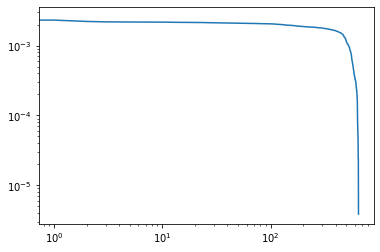

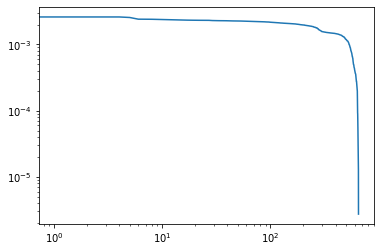

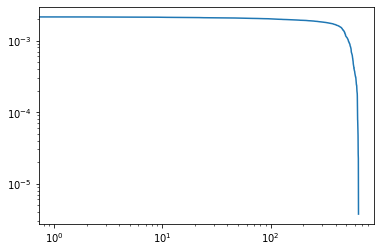

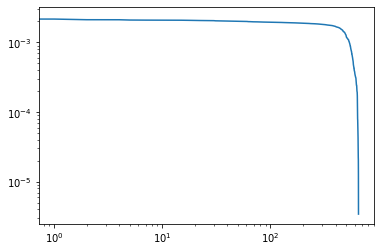

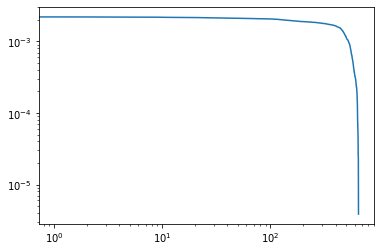

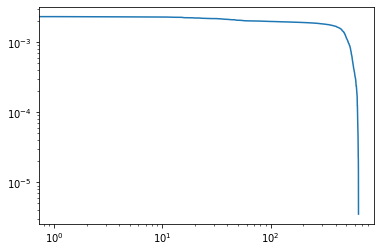

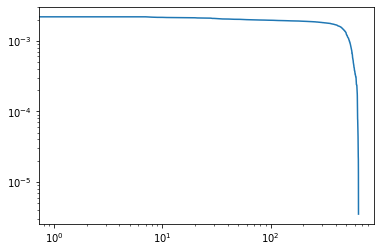

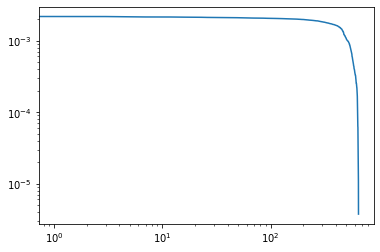

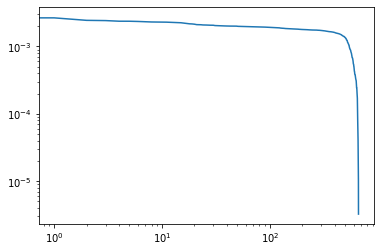

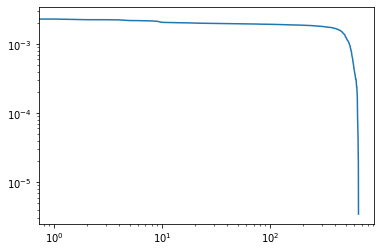

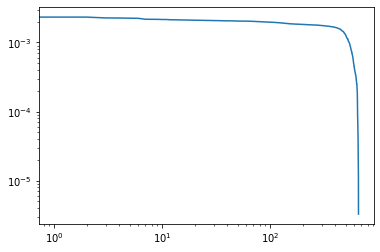

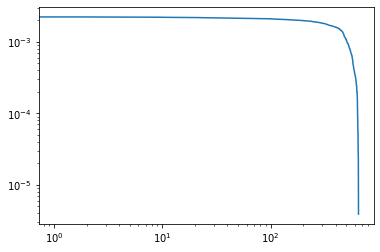

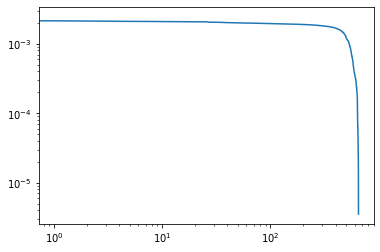

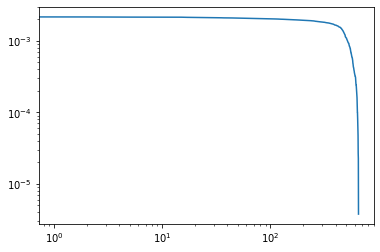

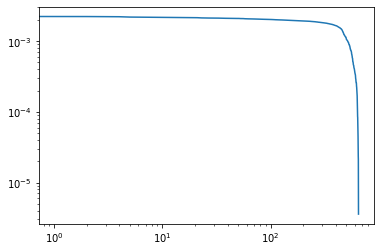

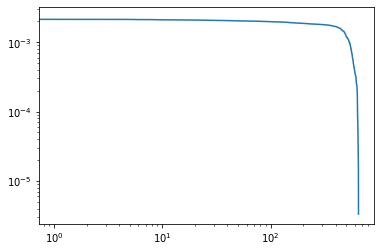

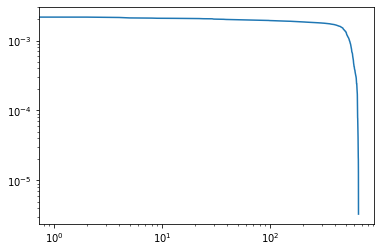

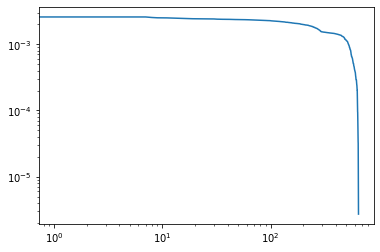

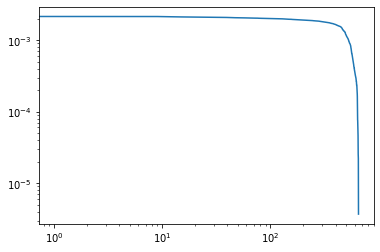

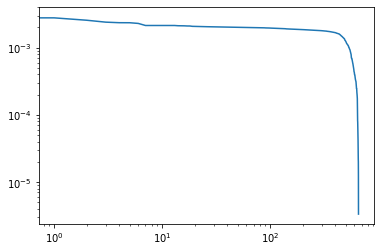

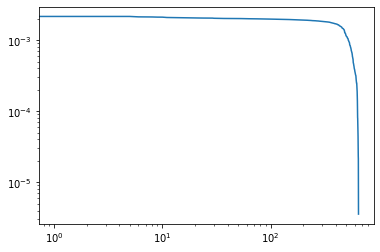

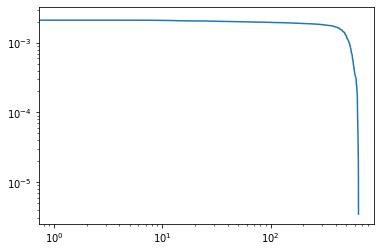

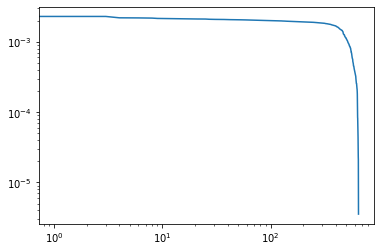

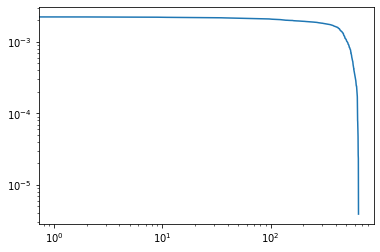

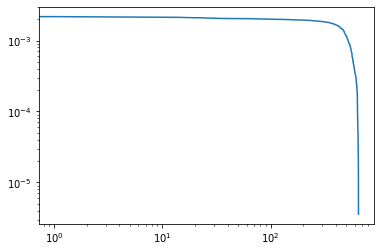

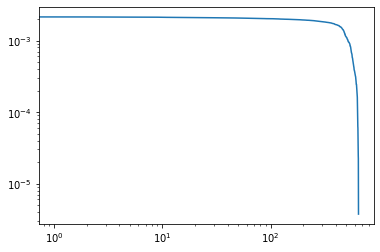

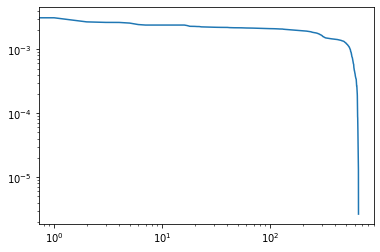

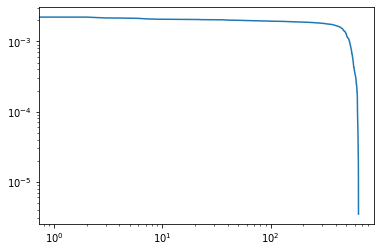

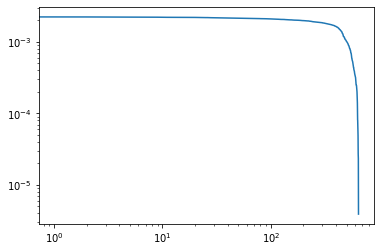

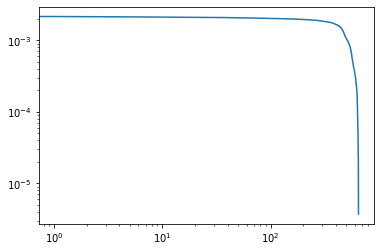

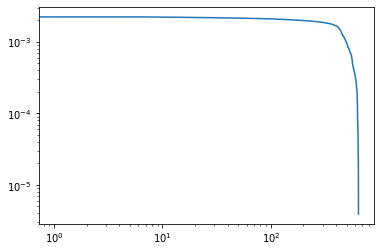

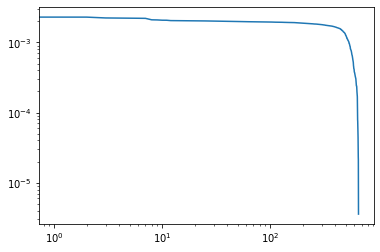

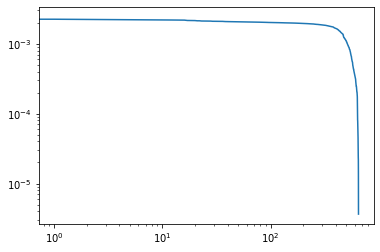

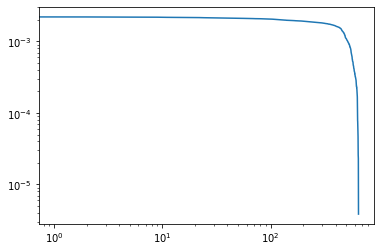

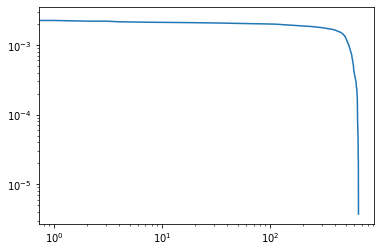

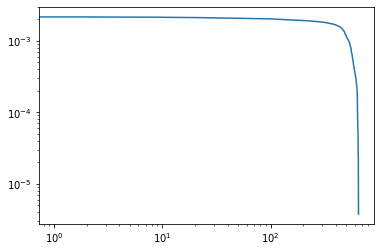

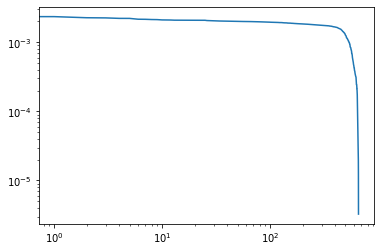

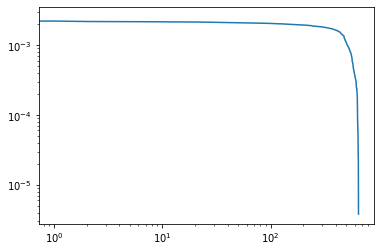

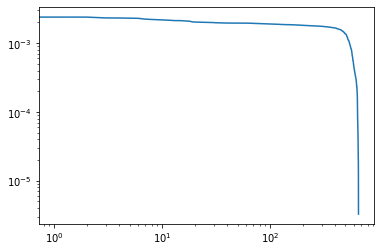

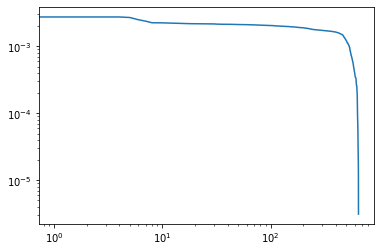

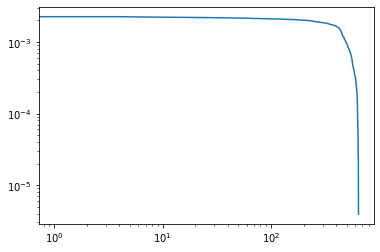

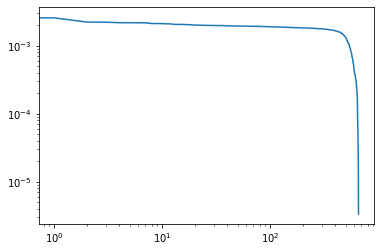

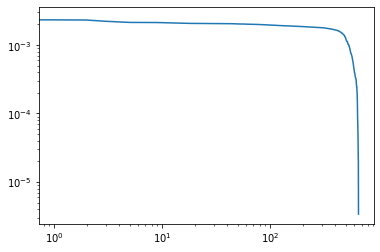

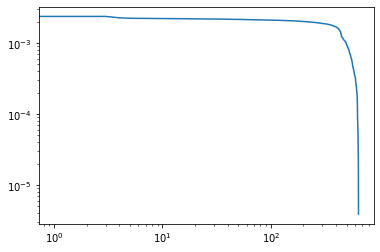

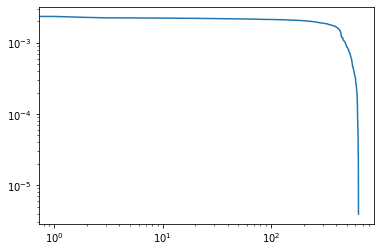

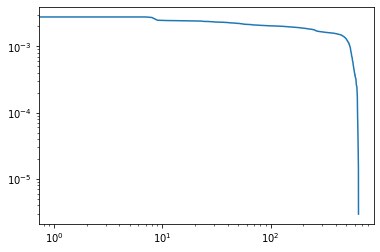

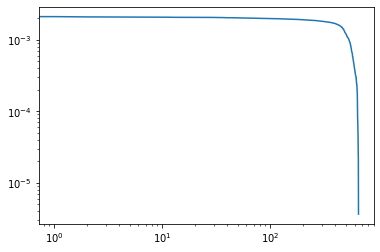

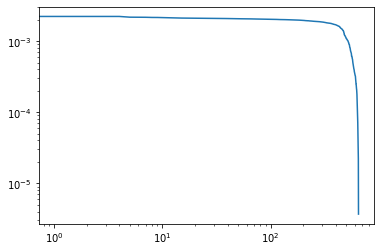

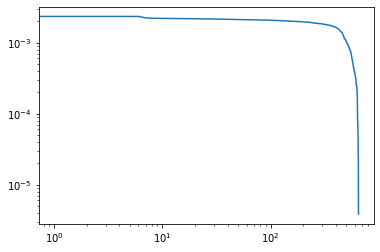

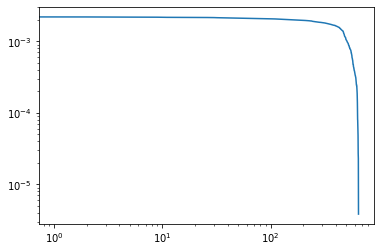

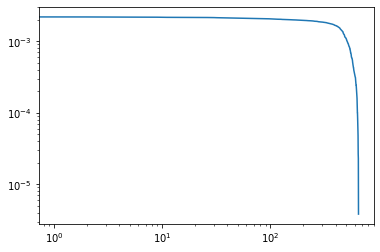

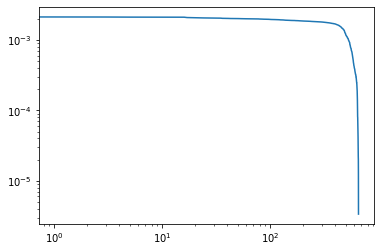

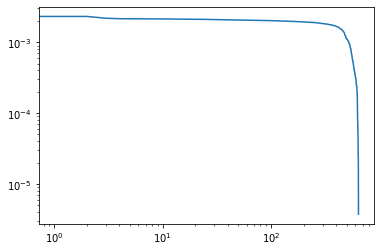

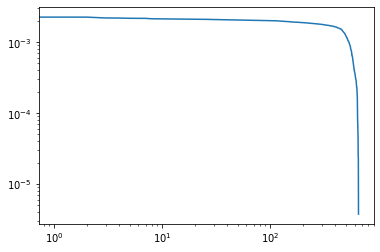

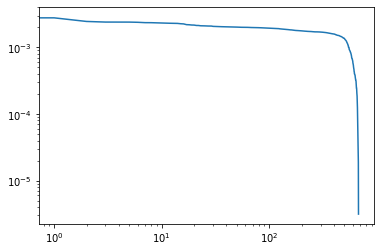

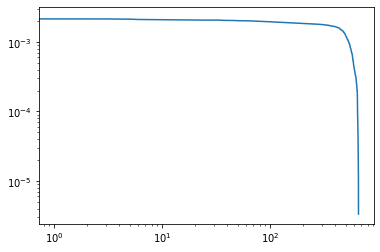

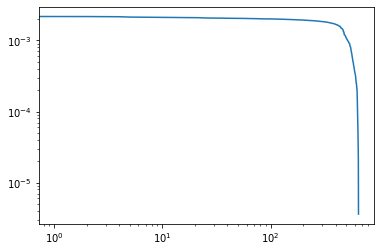

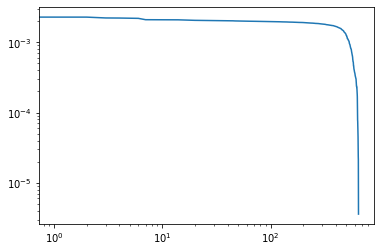

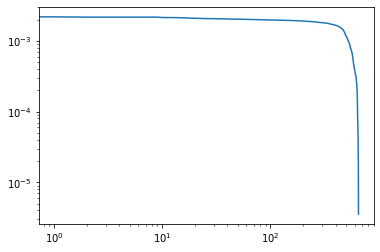

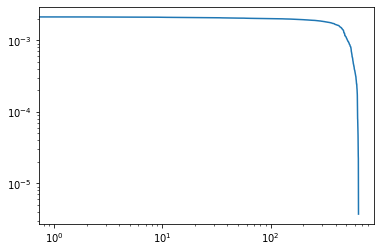

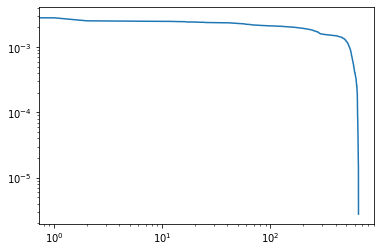

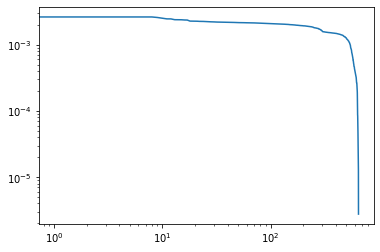

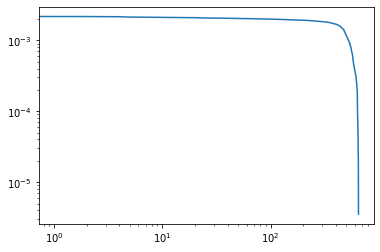

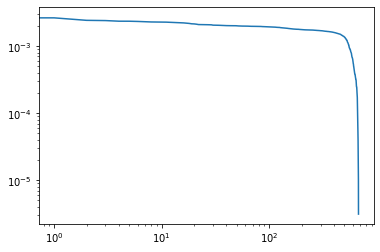

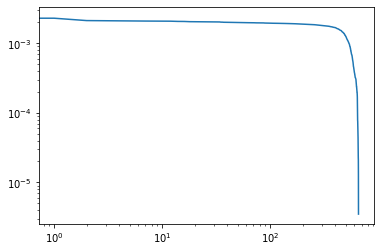

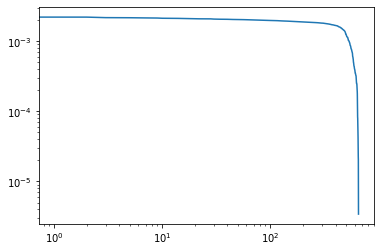

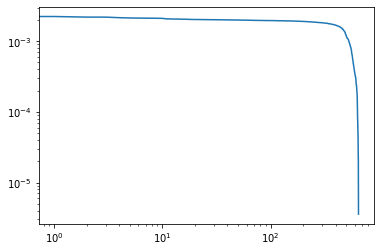

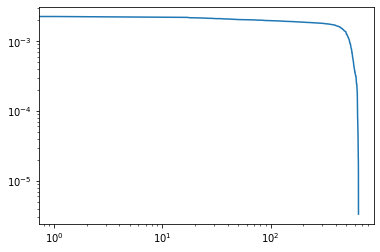

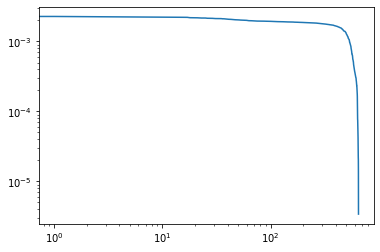

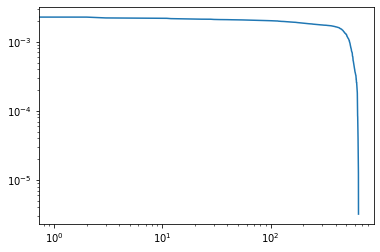

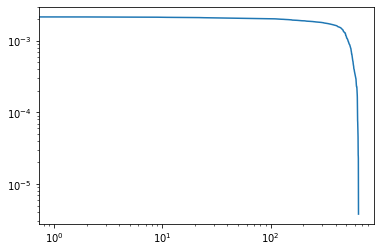

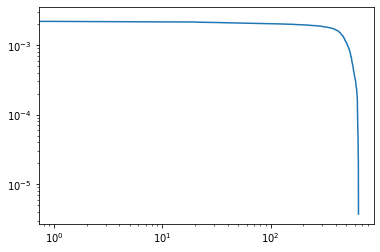

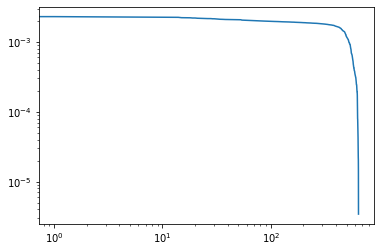

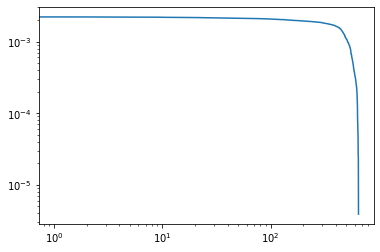

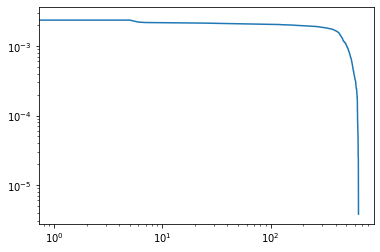

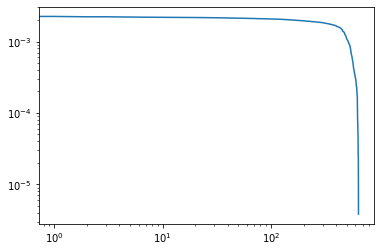

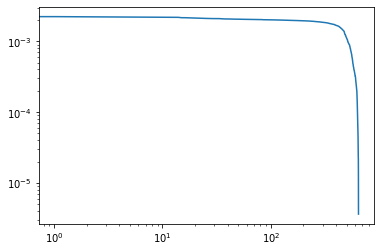

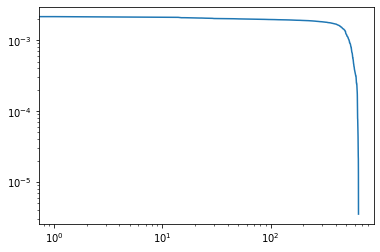

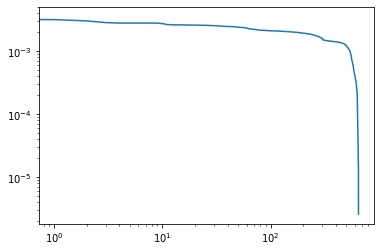

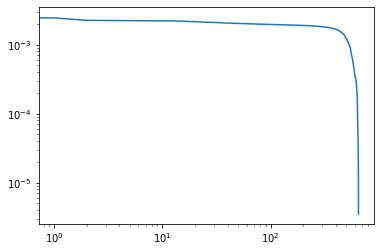

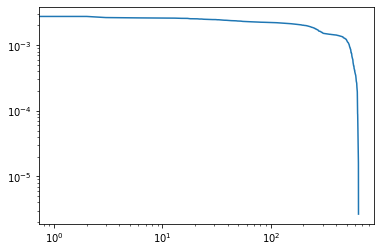

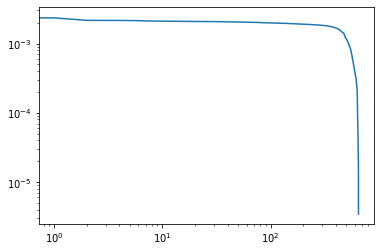

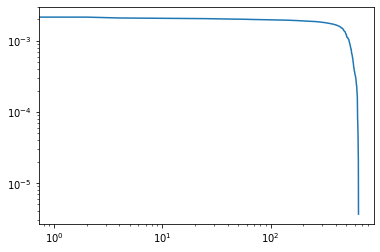

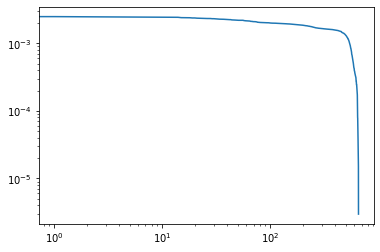

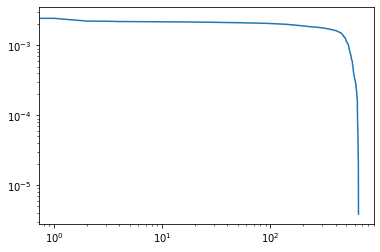

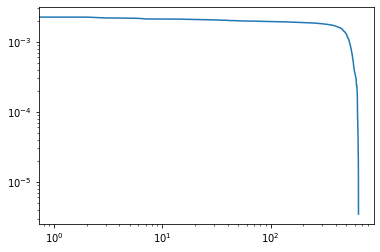

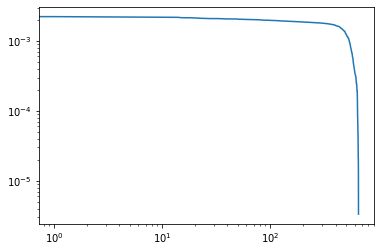

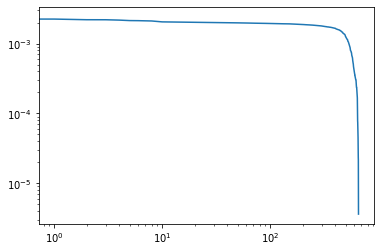

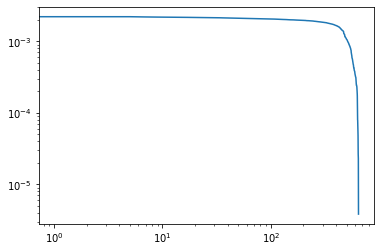

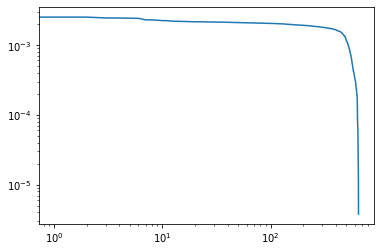

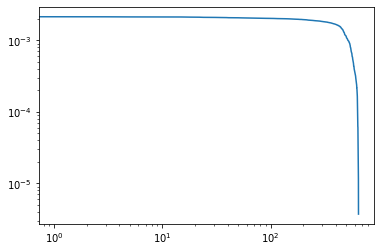

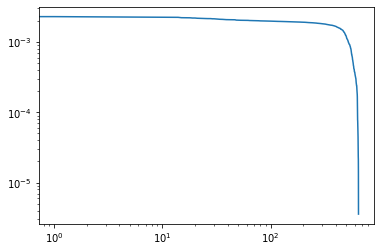

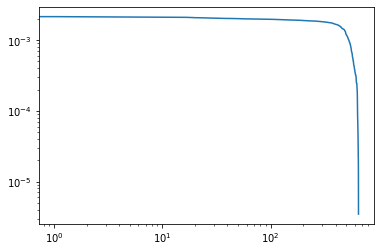

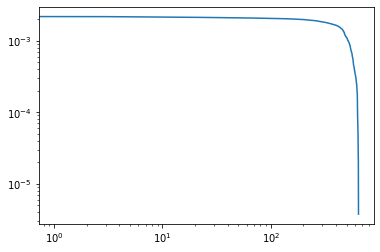

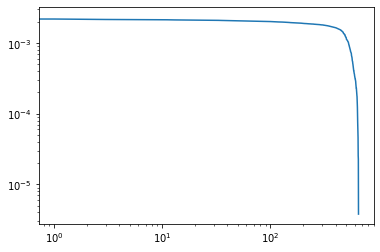

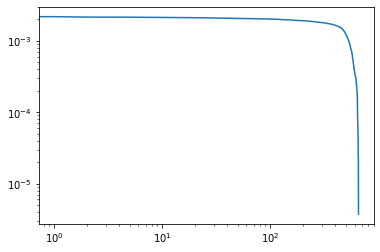

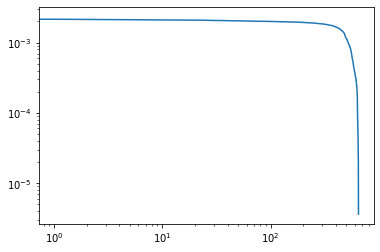

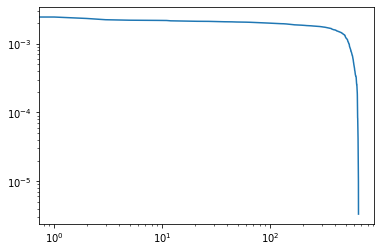

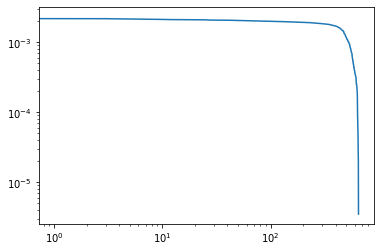

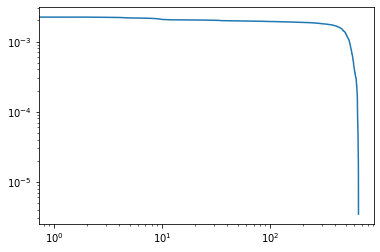

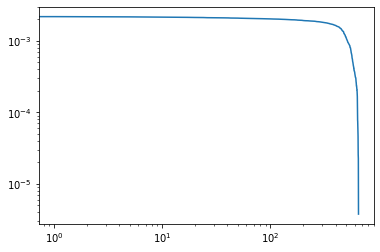

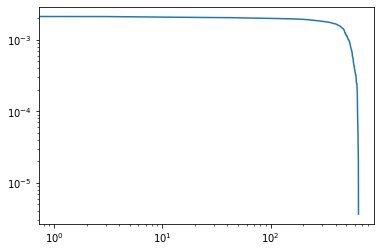

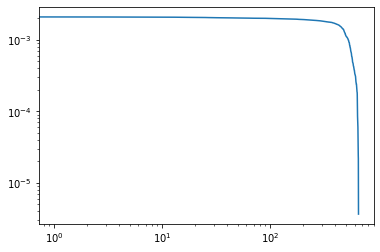

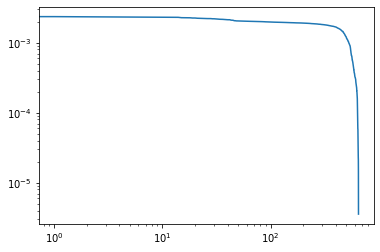

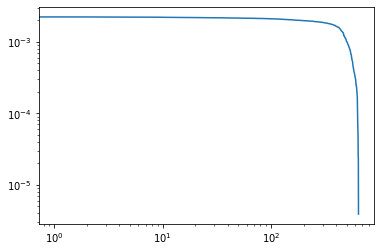

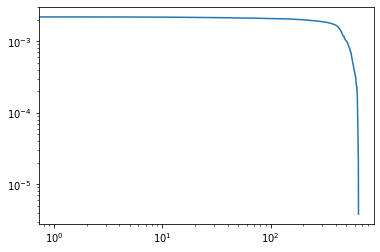

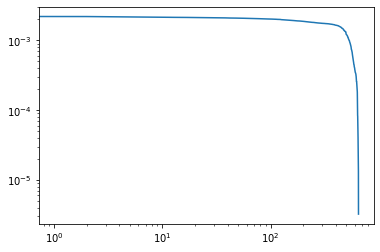

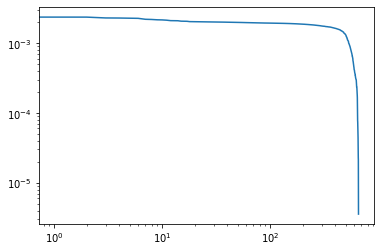

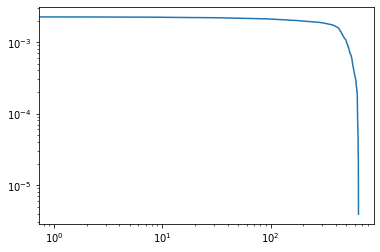

In [270]:
for doc in df_Pgs.columns:
    #doc = df_Pgs.columns[0]
    cdf = df_Pgs[doc]
    s_values = cdf[cdf>1e-95].sort_values(ascending=False)
    plt.plot(s_values)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

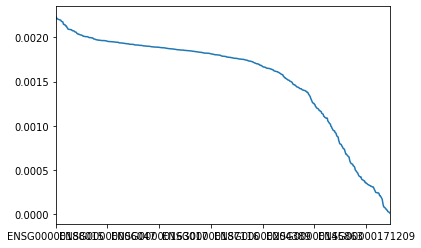

In [269]:
s_values.plot()